In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Load BASELINE datasets
df_baseline_iowait = pd.read_csv("baseline/cpu_iowait.csv")
df_baseline_irq = pd.read_csv("baseline/cpu_irq.csv")
df_baseline_system_msec = pd.read_csv("baseline/cpu_system_msec.csv")
df_baseline_user_msec = pd.read_csv("baseline/cpu_user_msec.csv")
df_baseline_util_per = pd.read_csv("baseline/cpu_util_per.csv")

# Load CPU STRESS datasets
df_cpustress_iowait = pd.read_csv("cpu stress/cpu_iowait.csv")
df_cpustress_irq = pd.read_csv("cpu stress/cpu_irq.csv")
df_cpustress_system_msec = pd.read_csv("cpu stress/cpu_system_msec.csv")
df_cpustress_user_msec = pd.read_csv("cpu stress/cpu_user_msec.csv")
df_cpustress_util_per = pd.read_csv("cpu stress/cpu_util_per.csv")

# Load IO pressure datasets
df_IO_iowait = pd.read_csv("IO pressure/cpu_iowait.csv")
df_IO_irq = pd.read_csv("IO pressure/cpu_irq.csv")
df_IO_system_msec = pd.read_csv("IO pressure/cpu_system_msec.csv")
df_IO_user_msec = pd.read_csv("IO pressure/cpu_user_msec.csv")
df_IO_util_per = pd.read_csv("IO pressure/cpu_util_per.csv")

# Load MEM STRESS datasets
df_memstress_iowait = pd.read_csv("mem stress/cpu_iowait.csv")
df_memstress_irq = pd.read_csv("mem stress/cpu_irq.csv")
df_memstress_system_msec = pd.read_csv("mem stress/cpu_system_msec.csv")
df_memstress_user_msec = pd.read_csv("mem stress/cpu_user_msec.csv")
df_memstress_util_per = pd.read_csv("mem stress/cpu_util_per.csv")

# Load NET LOSS datasets
df_netloss_iowait = pd.read_csv("netloss/cpu_iowait.csv")
df_netloss_irq = pd.read_csv("netloss/cpu_irq.csv")
df_netloss_system_msec = pd.read_csv("netloss/cpu_system_msec.csv")
df_netloss_user_msec = pd.read_csv("netloss/cpu_user_msec.csv")
df_netloss_util_per = pd.read_csv("netloss/cpu_util_per.csv")


# Add source labels - BASELINE
df_baseline_iowait["source"] = "BASELINE"
df_baseline_irq["source"] = "BASELINE"
df_baseline_system_msec["source"] = "BASELINE"
df_baseline_user_msec["source"] = "BASELINE"
df_baseline_util_per["source"] = "BASELINE"

# Add source labels - CPU STRESS
df_cpustress_iowait["source"] = "CPU_STRESS"
df_cpustress_irq["source"] = "CPU_STRESS"
df_cpustress_system_msec["source"] = "CPU_STRESS"
df_cpustress_user_msec["source"] = "CPU_STRESS"
df_cpustress_util_per["source"] = "CPU_STRESS"

# Add source labels - DELAY
df_IO_iowait["source"] = "IO"
df_IO_irq["source"] = "IO"
df_IO_system_msec["source"] = "IO"
df_IO_user_msec["source"] = "IO"
df_IO_util_per["source"] = "IO"

# Add source labels - MEM STRESS
df_memstress_iowait["source"] = "MEM_STRESS"
df_memstress_irq["source"] = "MEM_STRESS"
df_memstress_system_msec["source"] = "MEM_STRESS"
df_memstress_user_msec["source"] = "MEM_STRESS"
df_memstress_util_per["source"] = "MEM_STRESS"

# Add source labels - NET LOSS
df_netloss_iowait["source"] = "NET_LOSS"
df_netloss_irq["source"] = "NET_LOSS"
df_netloss_system_msec["source"] = "NET_LOSS"
df_netloss_user_msec["source"] = "NET_LOSS"
df_netloss_util_per["source"] = "NET_LOSS"


# Convert to datetime - BASELINE
df_baseline_iowait["Time"] = pd.to_datetime(df_baseline_iowait["Time"])
df_baseline_irq["Time"] = pd.to_datetime(df_baseline_irq["Time"])
df_baseline_system_msec["Time"] = pd.to_datetime(df_baseline_system_msec["Time"])
df_baseline_user_msec["Time"] = pd.to_datetime(df_baseline_user_msec["Time"])
df_baseline_util_per["Time"] = pd.to_datetime(df_baseline_util_per["Time"])

# Convert to datetime - CPU STRESS
df_cpustress_iowait["Time"] = pd.to_datetime(df_cpustress_iowait["Time"])
df_cpustress_irq["Time"] = pd.to_datetime(df_cpustress_irq["Time"])
df_cpustress_system_msec["Time"] = pd.to_datetime(df_cpustress_system_msec["Time"])
df_cpustress_user_msec["Time"] = pd.to_datetime(df_cpustress_user_msec["Time"])
df_cpustress_util_per["Time"] = pd.to_datetime(df_cpustress_util_per["Time"])

# Convert to datetime - DELAY
df_IO_iowait["Time"] = pd.to_datetime(df_IO_iowait["Time"])
df_IO_irq["Time"] = pd.to_datetime(df_IO_irq["Time"])
df_IO_system_msec["Time"] = pd.to_datetime(df_IO_system_msec["Time"])
df_IO_user_msec["Time"] = pd.to_datetime(df_IO_user_msec["Time"])
df_IO_util_per["Time"] = pd.to_datetime(df_IO_util_per["Time"])

# Convert to datetime - MEM STRESS
df_memstress_iowait["Time"] = pd.to_datetime(df_memstress_iowait["Time"])
df_memstress_irq["Time"] = pd.to_datetime(df_memstress_irq["Time"])
df_memstress_system_msec["Time"] = pd.to_datetime(df_memstress_system_msec["Time"])
df_memstress_user_msec["Time"] = pd.to_datetime(df_memstress_user_msec["Time"])
df_memstress_util_per["Time"] = pd.to_datetime(df_memstress_util_per["Time"])

# Convert to datetime - NET LOSS
df_netloss_iowait["Time"] = pd.to_datetime(df_netloss_iowait["Time"])
df_netloss_irq["Time"] = pd.to_datetime(df_netloss_irq["Time"])
df_netloss_system_msec["Time"] = pd.to_datetime(df_netloss_system_msec["Time"])
df_netloss_user_msec["Time"] = pd.to_datetime(df_netloss_user_msec["Time"])
df_netloss_util_per["Time"] = pd.to_datetime(df_netloss_util_per["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_iowait["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cpustress_iowait["Time"].min()
df_cpustress_iowait["Time"] += cpustress_offset
df_cpustress_irq["Time"] += cpustress_offset
df_cpustress_system_msec["Time"] += cpustress_offset
df_cpustress_user_msec["Time"] += cpustress_offset
df_cpustress_util_per["Time"] += cpustress_offset

# Synchronize IO datasets
delay_offset = time_offset - df_IO_iowait["Time"].min()
df_IO_iowait["Time"] += delay_offset
df_IO_irq["Time"] += delay_offset
df_IO_system_msec["Time"] += delay_offset
df_IO_user_msec["Time"] += delay_offset
df_IO_util_per["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_memstress_iowait["Time"].min()
df_memstress_iowait["Time"] += memstress_offset
df_memstress_irq["Time"] += memstress_offset
df_memstress_system_msec["Time"] += memstress_offset
df_memstress_user_msec["Time"] += memstress_offset
df_memstress_util_per["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_netloss_iowait["Time"].min()
df_netloss_iowait["Time"] += netloss_offset
df_netloss_irq["Time"] += netloss_offset
df_netloss_system_msec["Time"] += netloss_offset
df_netloss_user_msec["Time"] += netloss_offset
df_netloss_util_per["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_iowait, df_baseline_irq, df_baseline_system_msec, df_baseline_user_msec, df_baseline_util_per,
    # CPU Stress
    df_cpustress_iowait, df_cpustress_irq, df_cpustress_system_msec, df_cpustress_user_msec, df_cpustress_util_per,
    # IO
    df_IO_iowait, df_IO_irq, df_IO_system_msec, df_IO_user_msec, df_IO_util_per,
    # Memory Stress
    df_memstress_iowait, df_memstress_irq, df_memstress_system_msec, df_memstress_user_msec, df_memstress_util_per,
    # Network Loss
    df_netloss_iowait, df_netloss_irq, df_netloss_system_msec, df_netloss_user_msec, df_netloss_util_per
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'IOWait': {
        'baseline': df_baseline_iowait,
        'cpu_stress': df_cpustress_iowait,
        'delay': df_IO_iowait,
        'mem_stress': df_memstress_iowait,
        'net_loss': df_netloss_iowait,
    },
    'IRQ': {
        'baseline': df_baseline_irq,
        'cpu_stress': df_cpustress_irq,
        'delay': df_IO_irq,
        'mem_stress': df_memstress_irq,
        'net_loss': df_netloss_irq,
    },
    'System': {
        'baseline': df_baseline_system_msec,
        'cpu_stress': df_cpustress_system_msec,
        'delay': df_IO_system_msec,
        'mem_stress': df_memstress_system_msec,
        'net_loss': df_netloss_system_msec,
    },
    'User': {
        'baseline': df_baseline_user_msec,
        'cpu_stress': df_cpustress_user_msec,
        'delay': df_IO_user_msec,
        'mem_stress': df_memstress_user_msec,
        'net_loss': df_netloss_user_msec,
    },
    'Utilization': {
        'baseline': df_baseline_util_per,
        'cpu_stress': df_cpustress_util_per,
        'delay': df_IO_util_per,
        'mem_stress': df_memstress_util_per,
        'net_loss': df_netloss_util_per,
    }
}

print("✅ All datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} metrics across {len(all_datasets['IOWait'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

✅ All datasets loaded successfully!
📊 Loaded 5 metrics across 5 experiment types

Dataset structure:
  IOWait: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  IRQ: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  System: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  User: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  Utilization: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']


Running TUNA analysis...
Processing IOWait
Training IOWait...
Processing IRQ
Training IRQ...
Processing System
Training System...
Processing User
Training User...
Processing Utilization
Training Utilization...


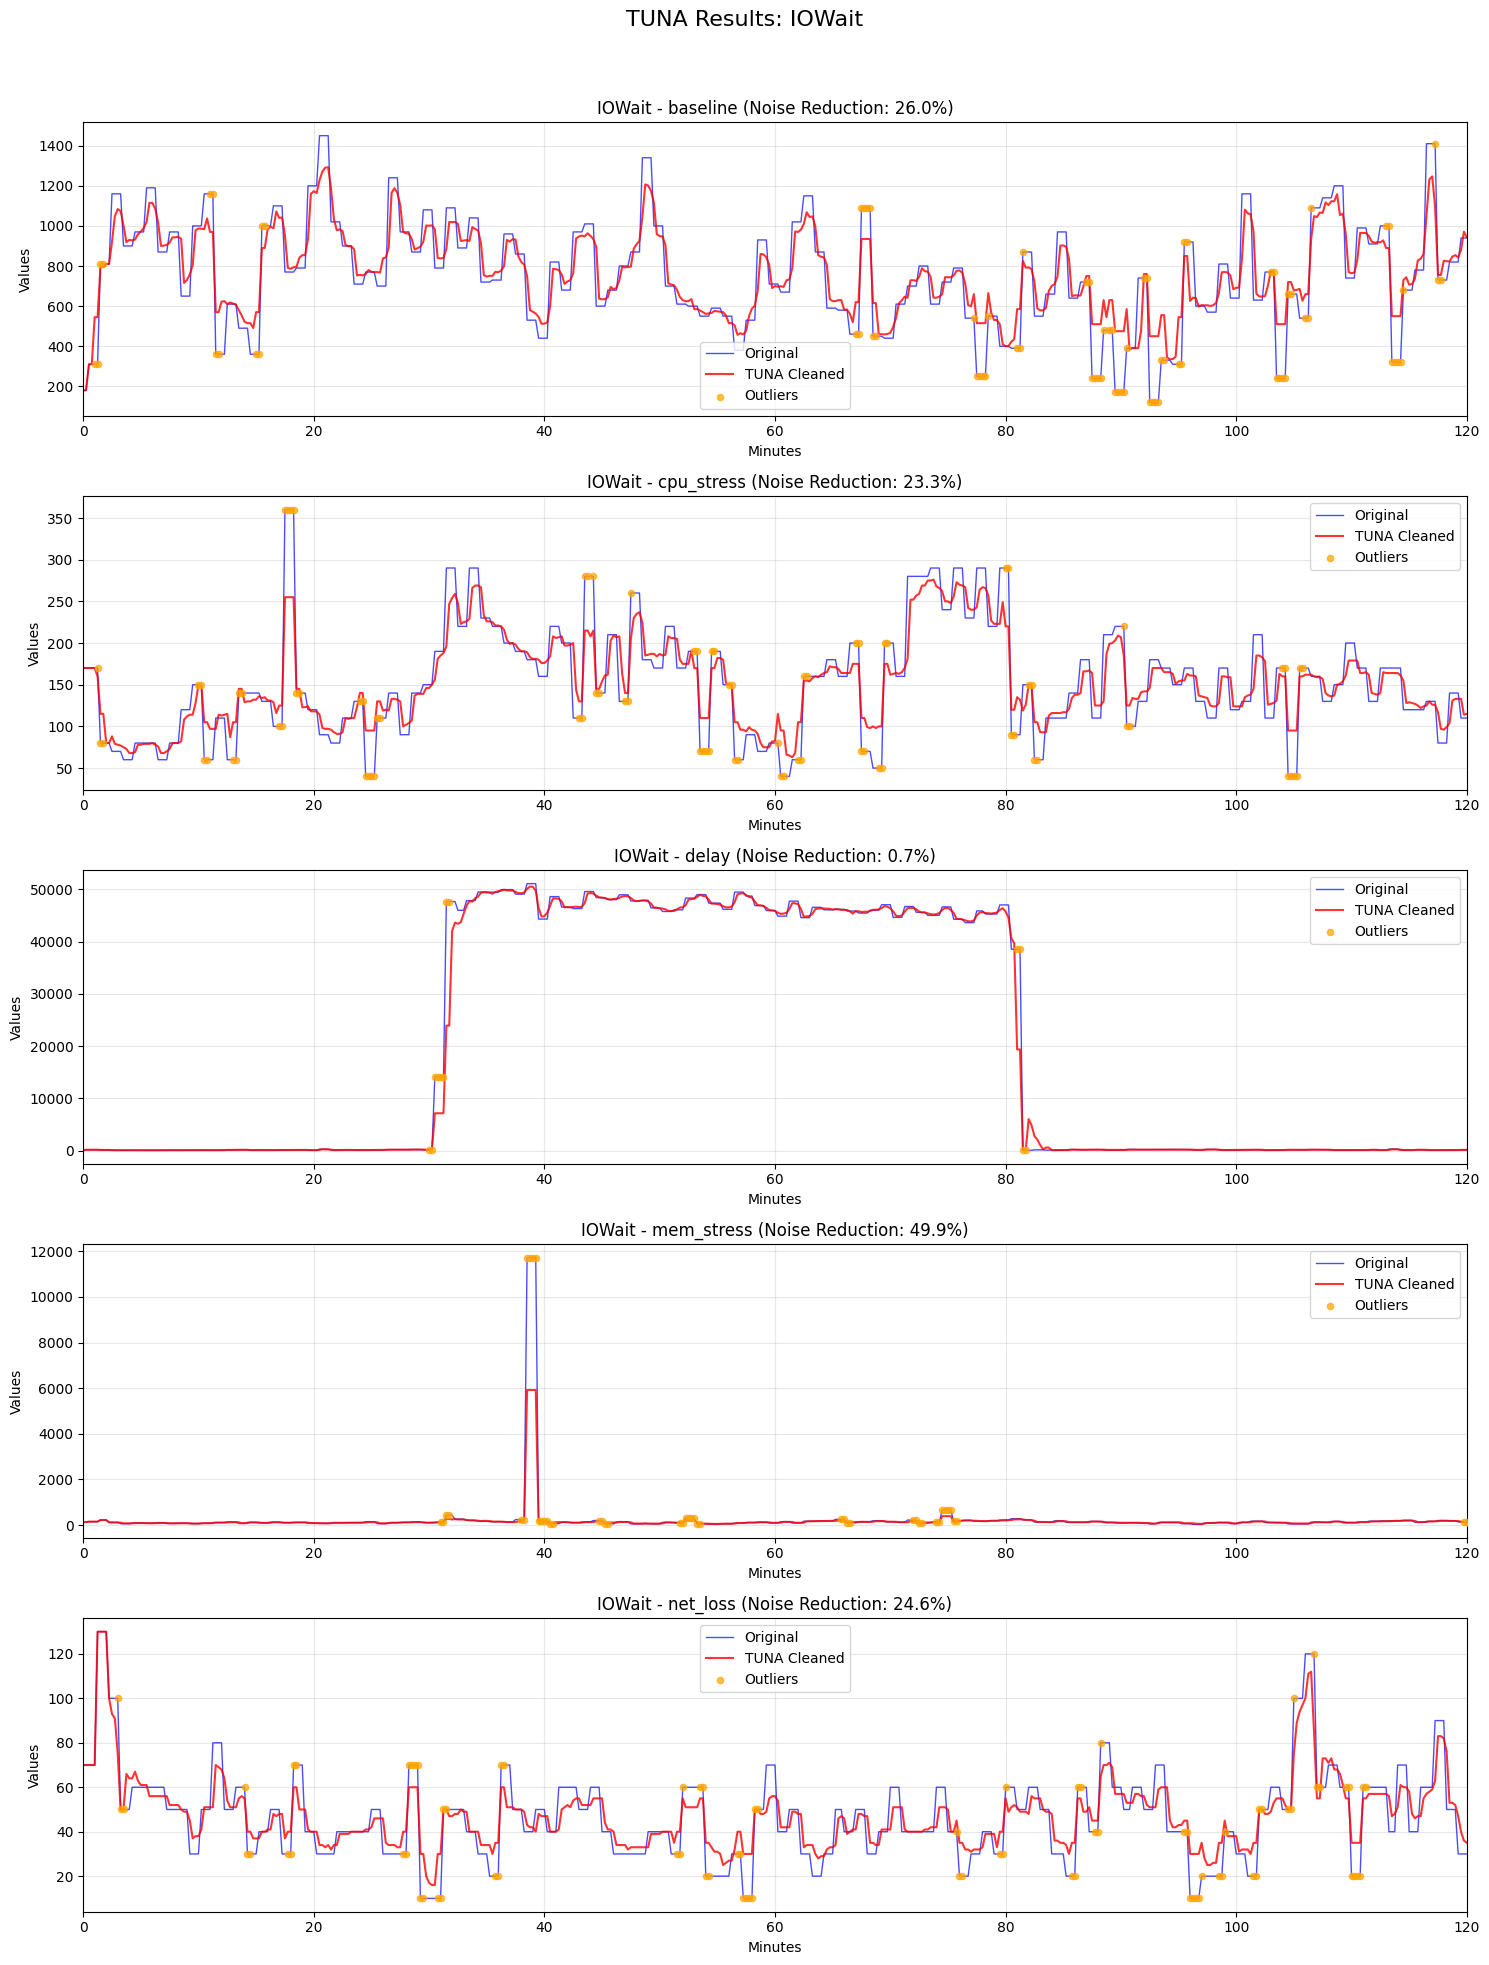

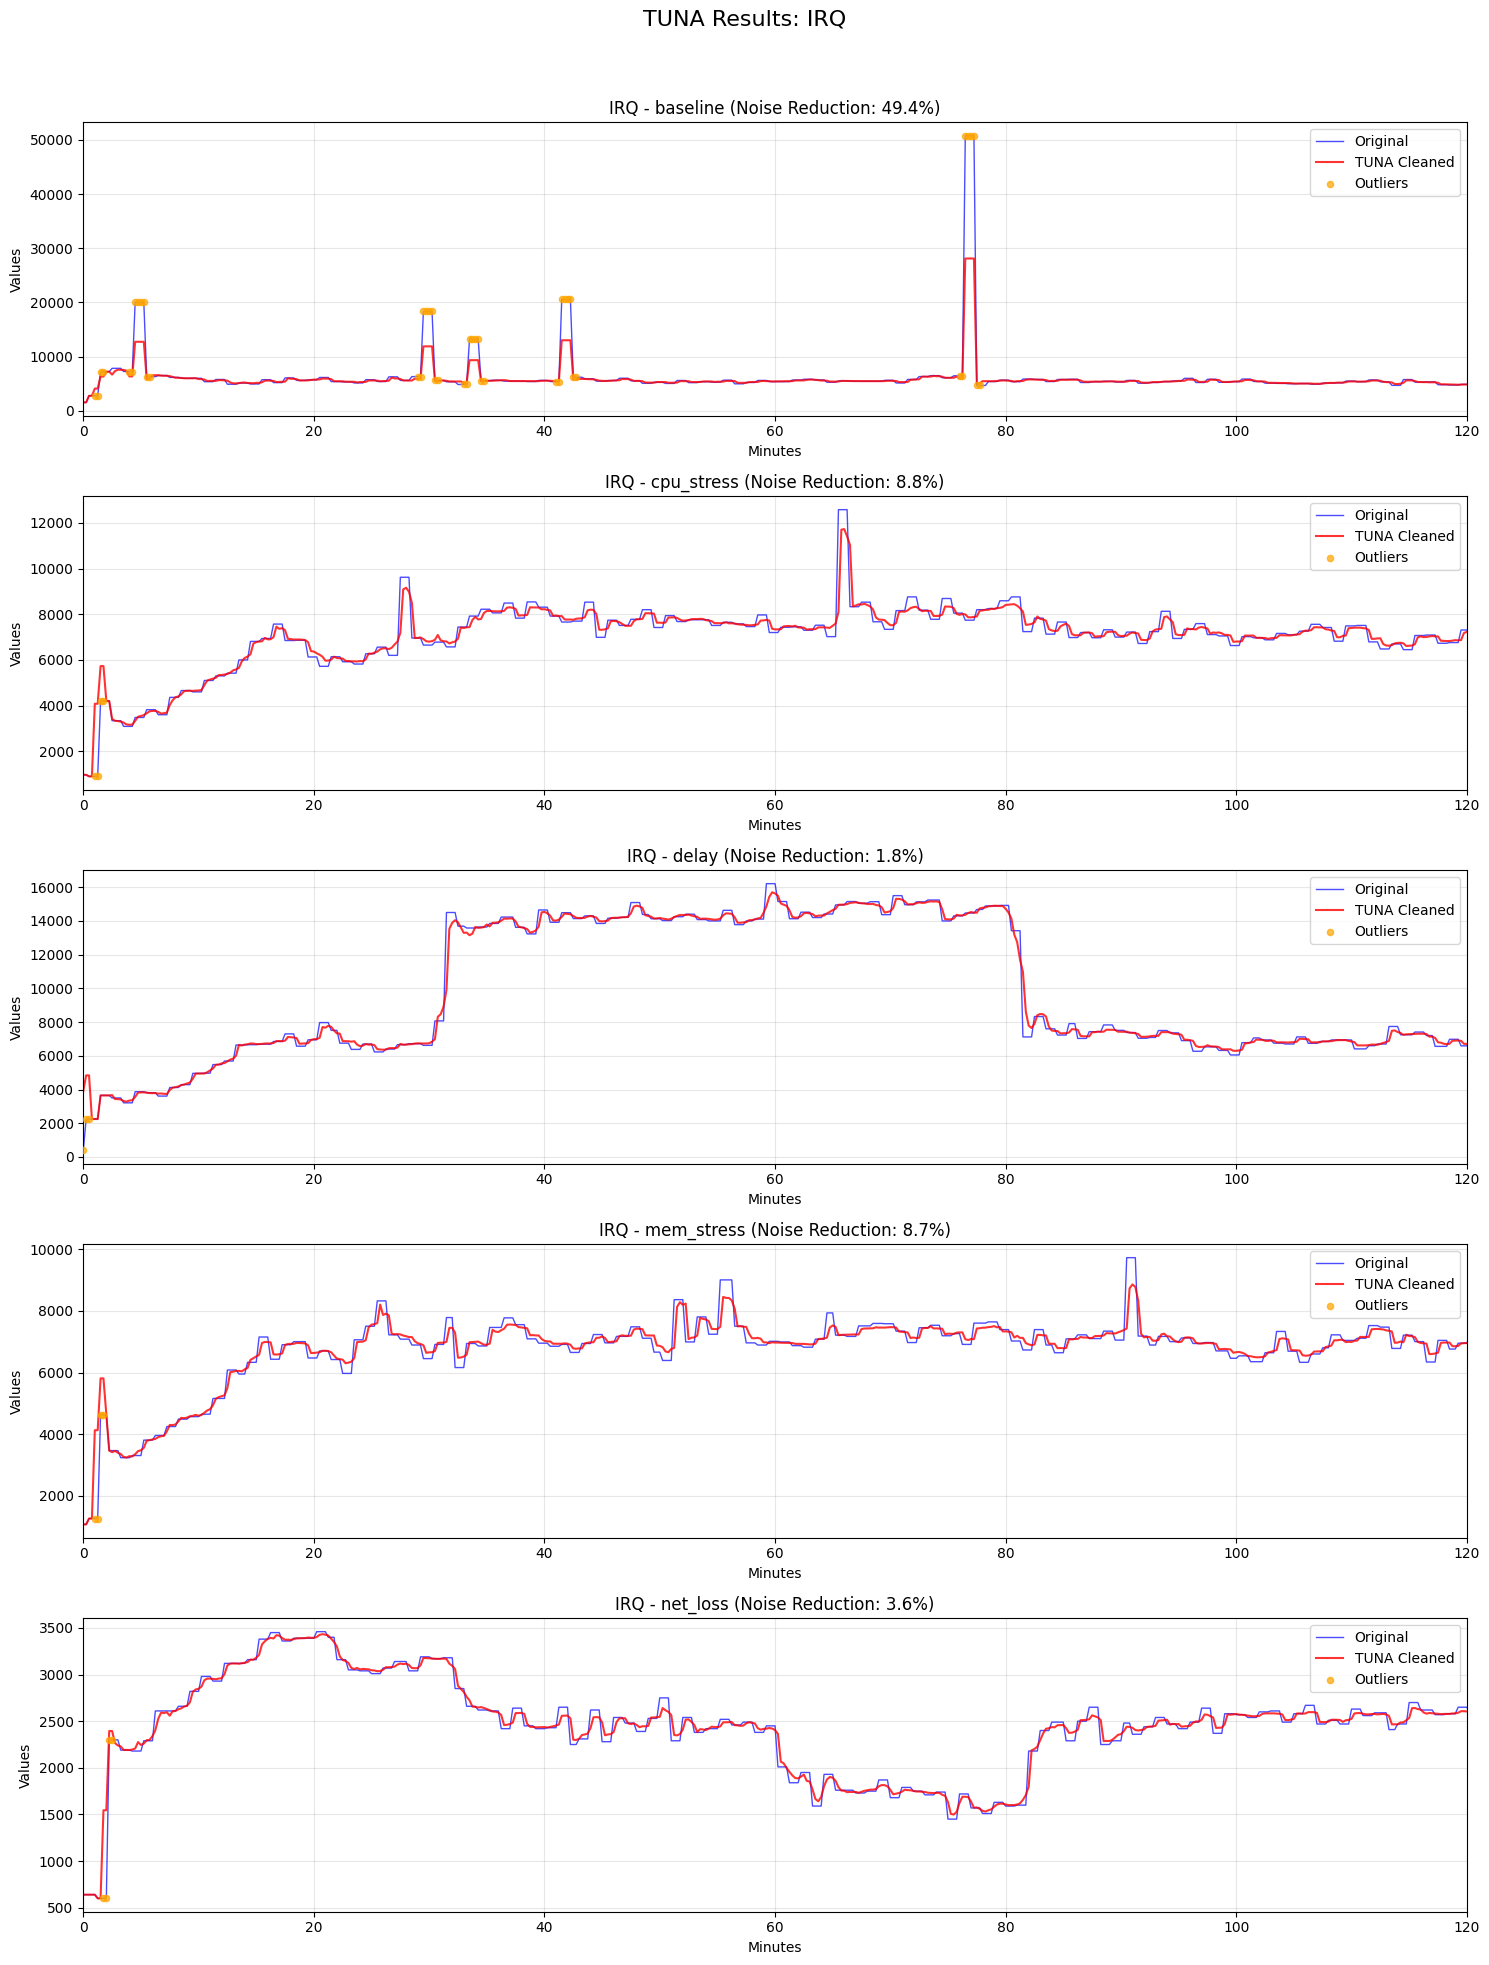

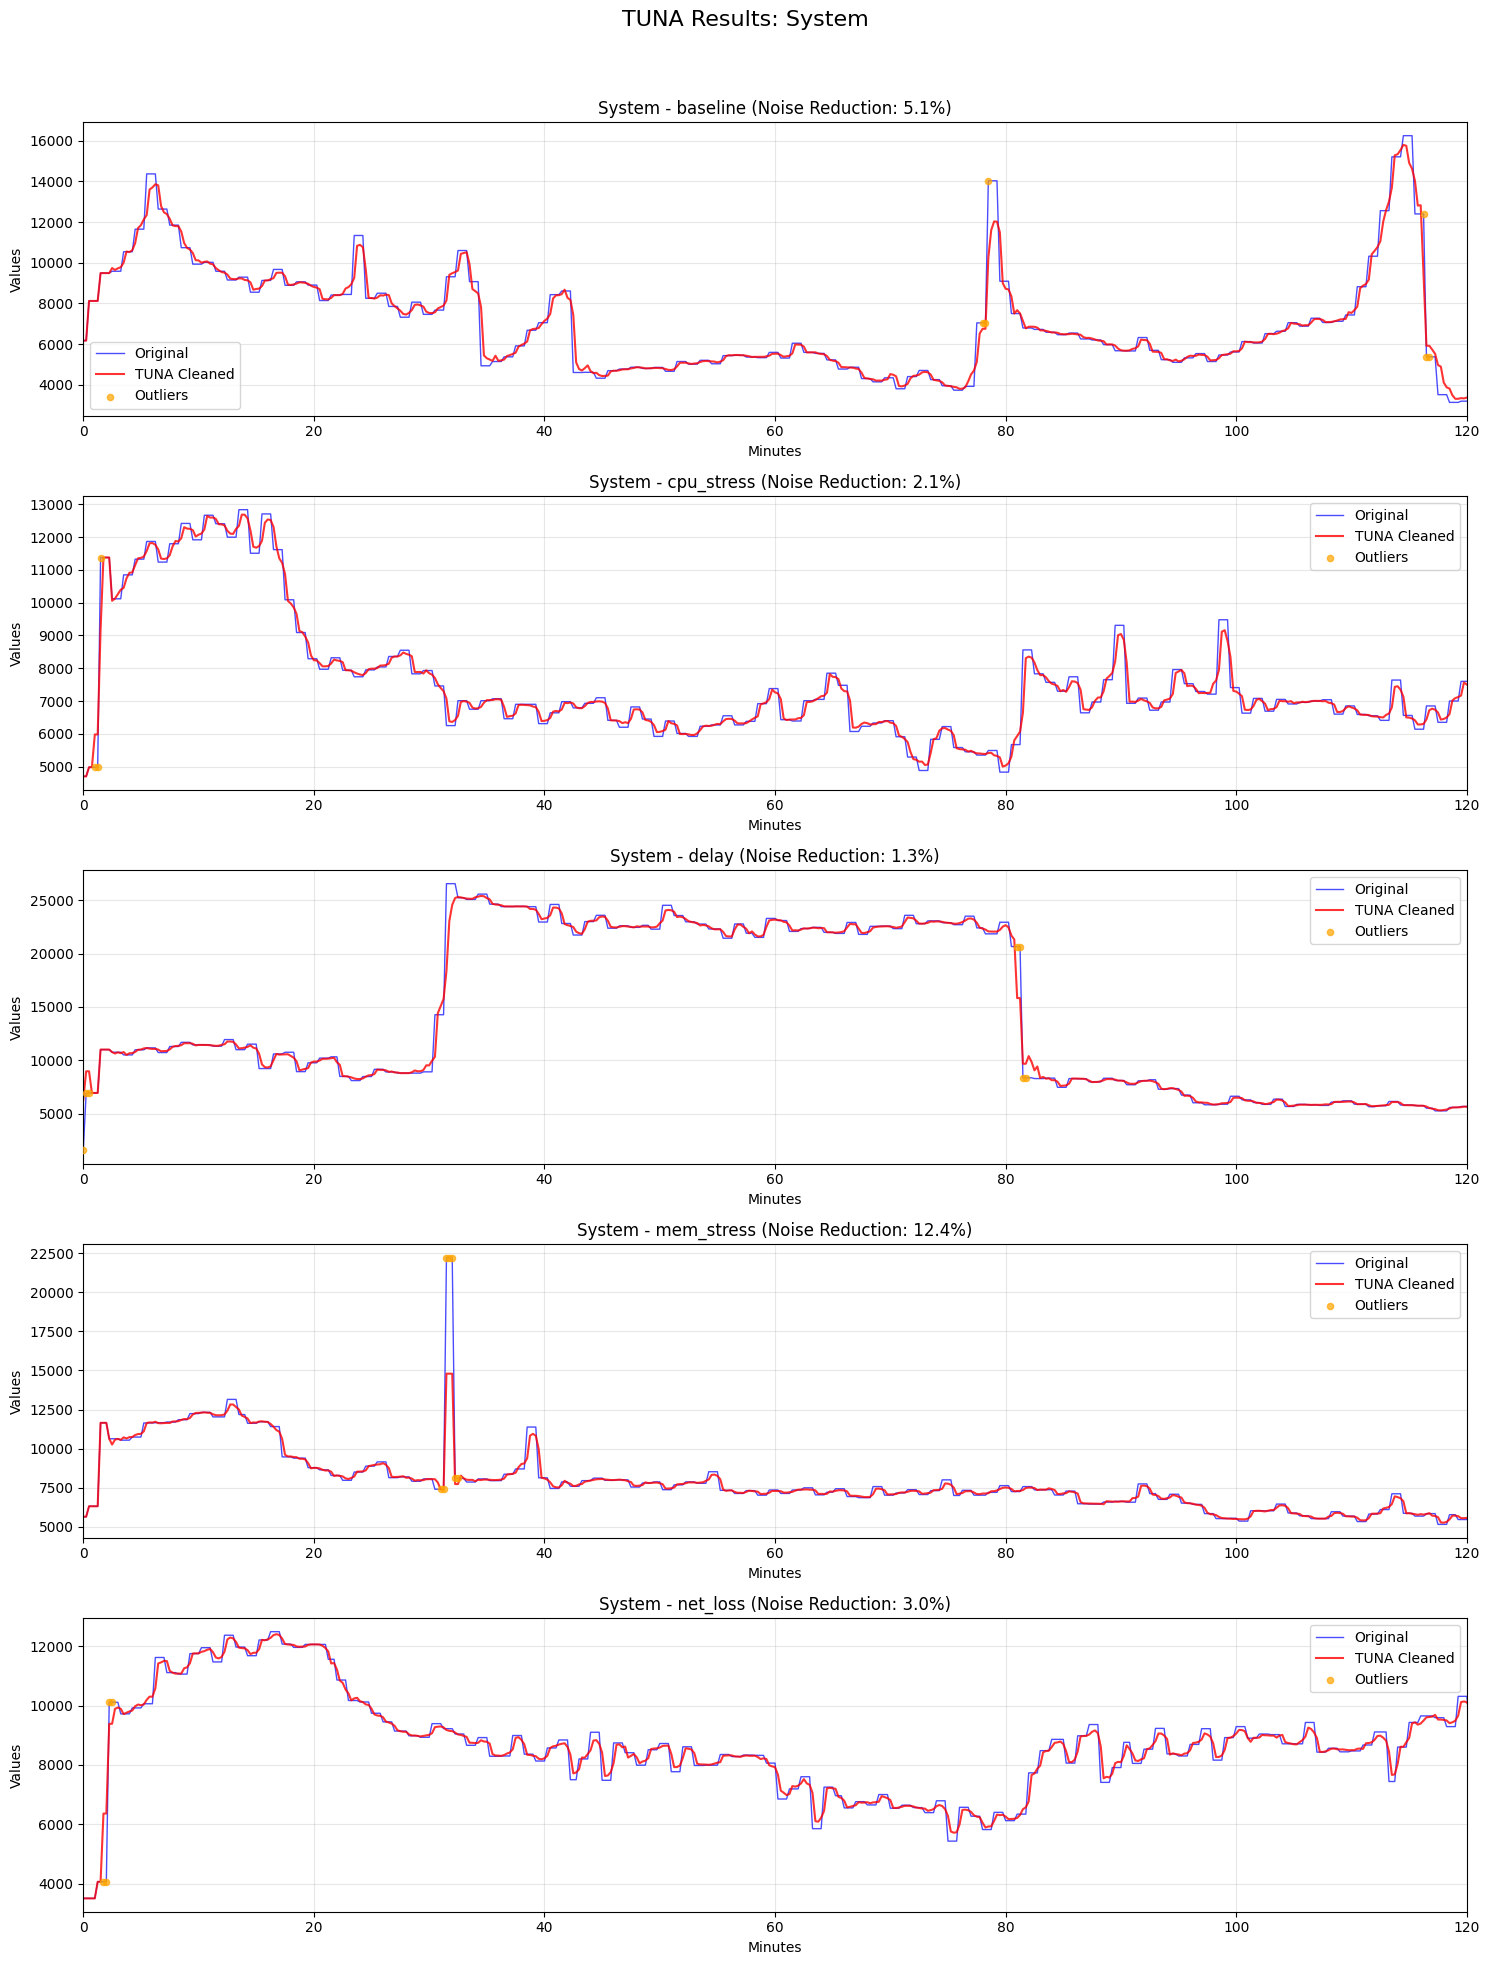

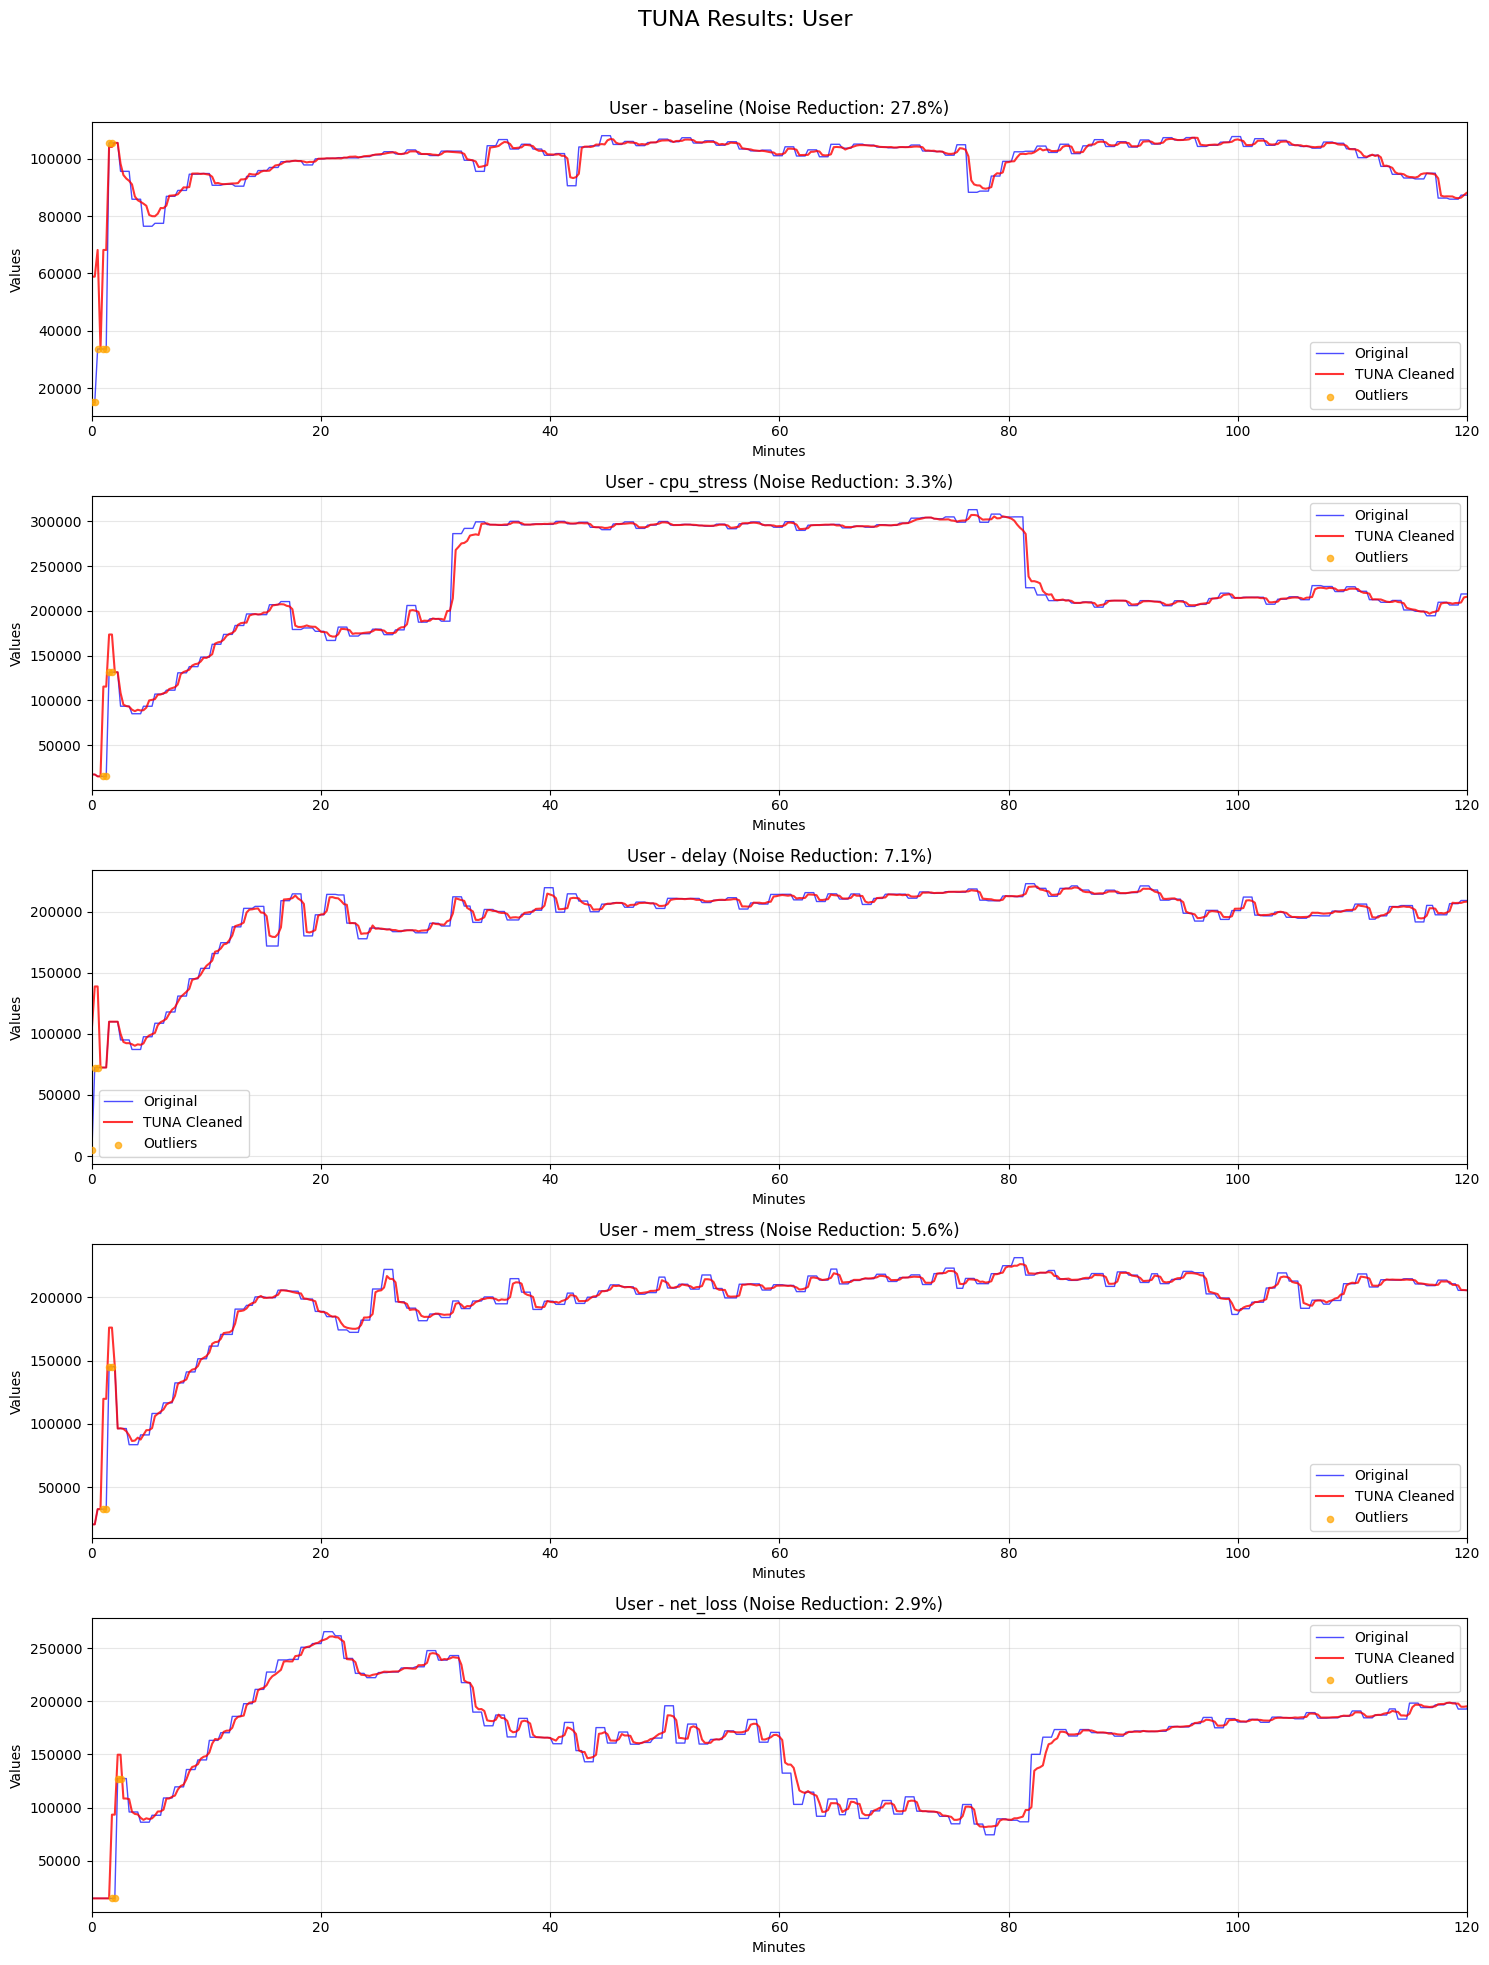

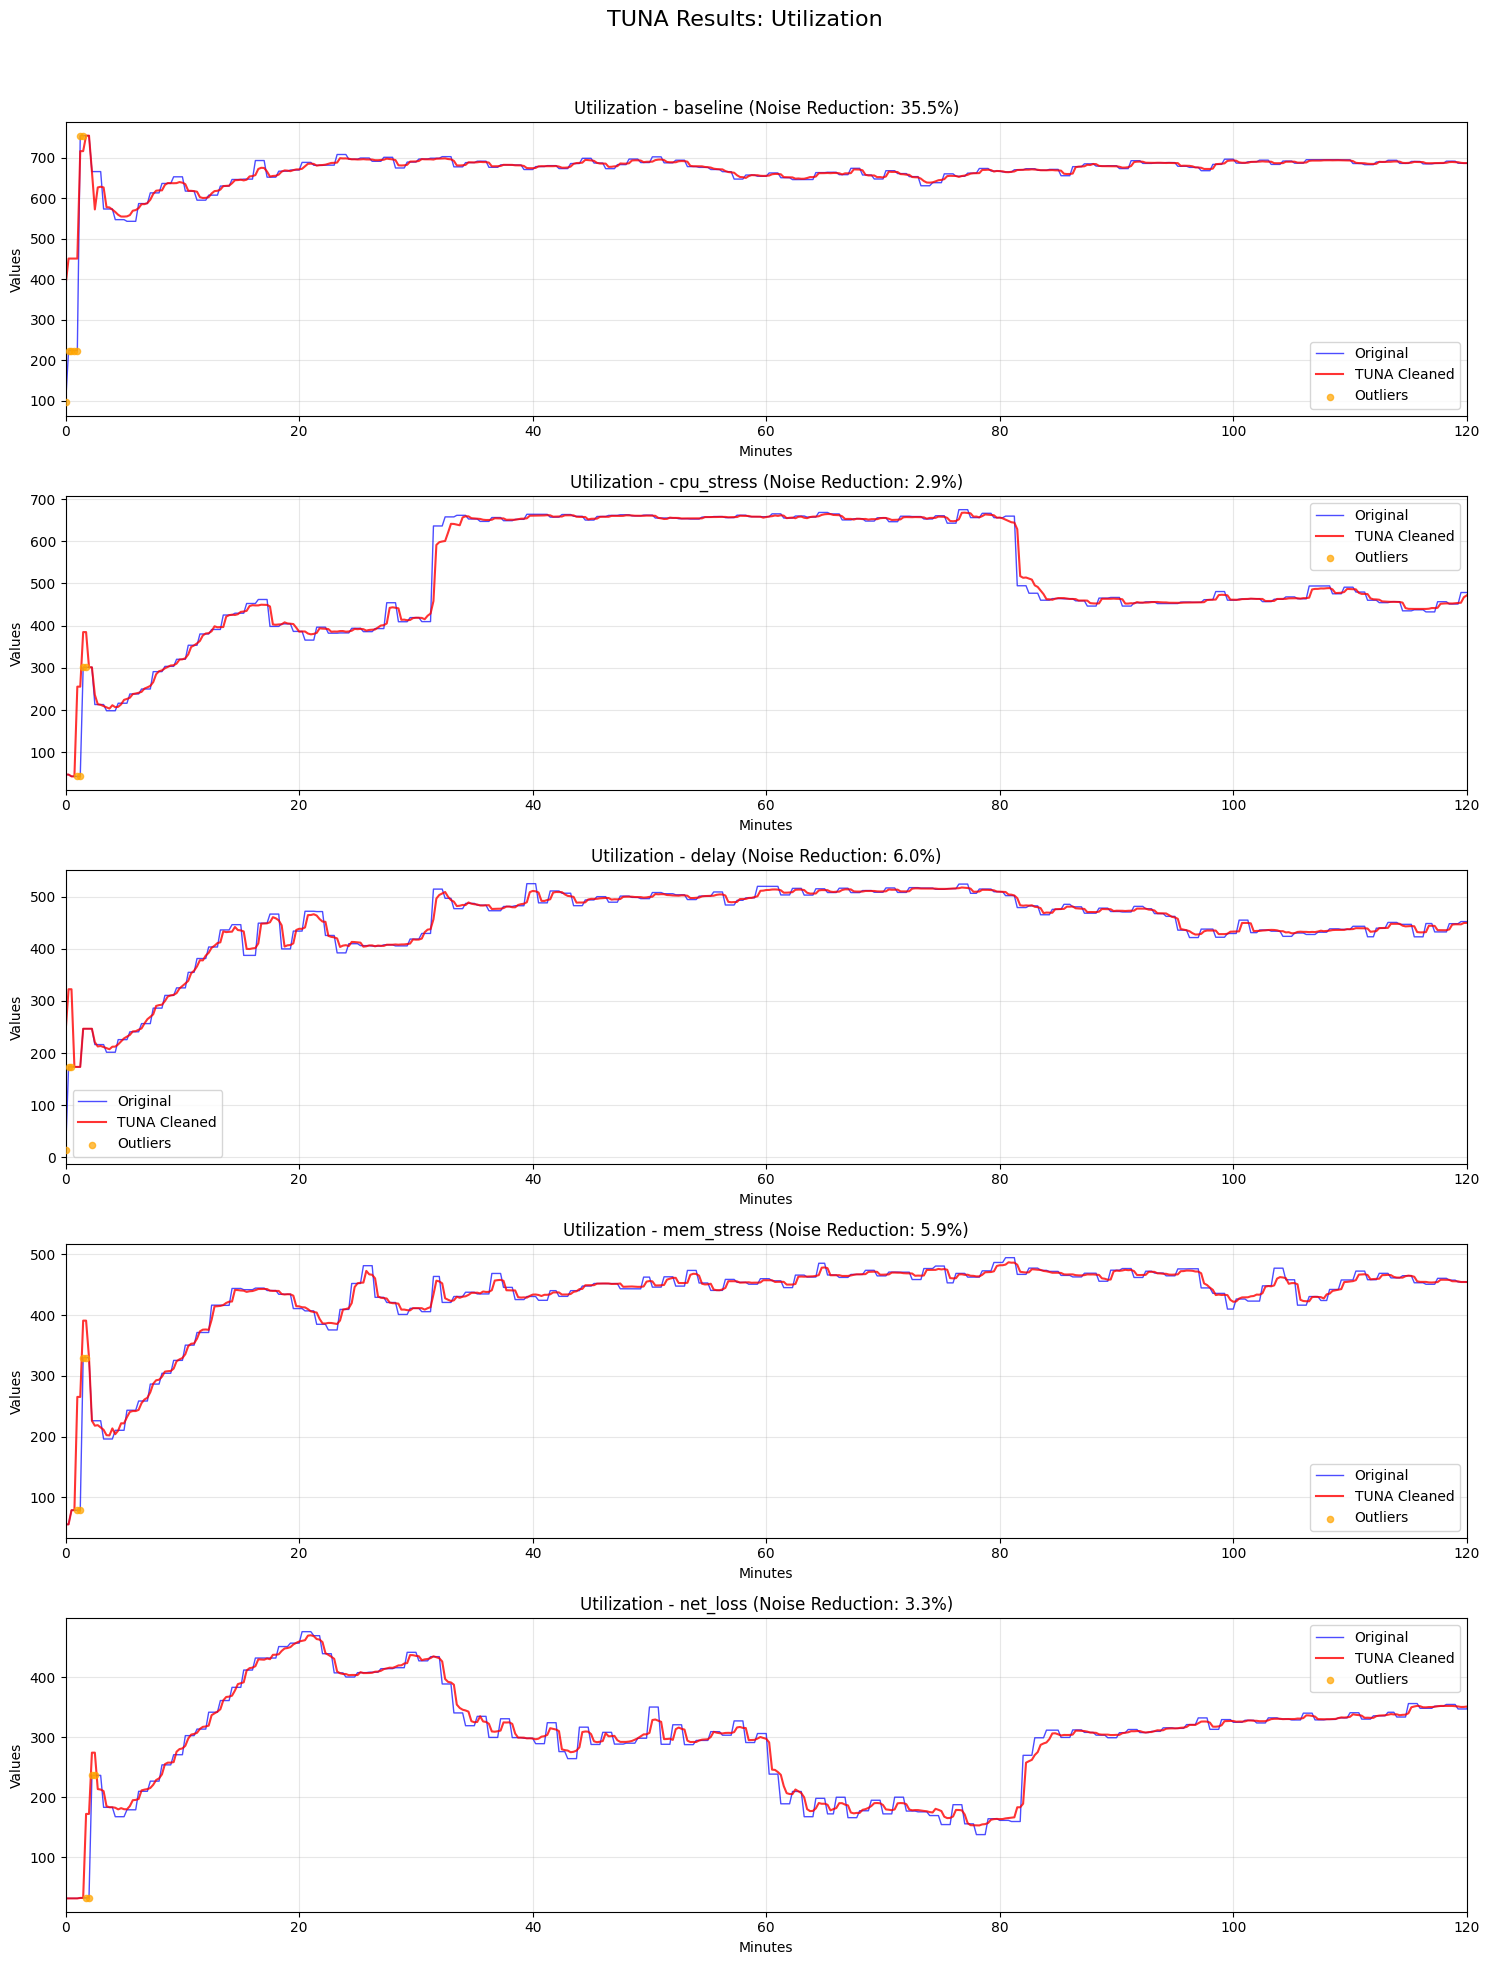


TUNA Results Summary:
Metric       Experiment   Outliers   Noise Red%   Correlation 
------------------------------------------------------------
IOWait       baseline     76               26.0%       0.924
IOWait       cpu_stress   83               23.3%       0.930
IOWait       delay        12                0.7%       0.996
IOWait       mem_stress   48               49.9%       0.999
IOWait       net_loss     82               24.6%       0.920
IRQ          baseline     44               49.4%       0.995
IRQ          cpu_stress   4                 8.8%       0.957
IRQ          delay        3                 1.8%       0.994
IRQ          mem_stress   4                 8.7%       0.960
IRQ          net_loss     4                 3.6%       0.986
System       baseline     6                 5.1%       0.983
System       cpu_stress   3                 2.1%       0.990
System       delay        7                 1.3%       0.996
System       mem_stress   7                12.4%       0.961

In [2]:
def calculate_cumulative_cpu(df):
    """Calculate total CPU from all CPU columns"""
    exclude_cols = ['Time', 'Minutes', 'source']
    cpu_cols = [col for col in df.columns if col not in exclude_cols]
    return df[cpu_cols].sum(axis=1).values

def detect_outliers_tuna(timeseries, window_size=3, threshold=0.70, min_absolute_range=None):
    """
    TUNA's relative range outlier detection with stability improvements
    Formula: (max - min) / mean > threshold
    Mark only the max/min values in unstable windows as outliers
    """
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    
    # Calculate adaptive minimum absolute range if not provided
    if min_absolute_range is None:
        # Use 5% of the overall time series standard deviation as minimum range
        min_absolute_range = 0.1 * np.std(timeseries)
    
    # Slide window across time series to detect unstable periods
    for i in range(len(timeseries) - window_size + 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0:
            # Apply TUNA relative range criterion
            relative_range = window_range / window_mean
            
            # Additional filter: require minimum absolute range to avoid hypersensitivity
            if relative_range > threshold and window_range > min_absolute_range:
                window_max = np.max(window)
                window_min = np.min(window)
                
                # Mark extreme values within unstable window
                for j in range(window_size):
                    actual_idx = i + j
                    if (timeseries[actual_idx] == window_max or 
                        timeseries[actual_idx] == window_min):
                        outlier_mask[actual_idx] = True
    
    return outlier_mask

def create_features_for_ml(timeseries, experiment_type, window_size=10):
    """Create features for RandomForest training"""
    features = []
    
    # Extract temporal and statistical features from sliding windows
    for i in range(window_size, len(timeseries)):
        window = timeseries[i-window_size:i]
        
        # Statistical features from recent history
        feature_vector = [
            np.mean(window),                    # Rolling average
            np.std(window),                     # Variability measure
            np.median(window),                  # Robust central tendency
            np.max(window) - np.min(window),    # Range indicator
            timeseries[i-1],                    # Previous value dependency
            i / len(timeseries),                # Temporal position
        ]
        
        # Experiment context encoding for cross-experiment learning
        exp_features = [0, 0, 0, 0, 0]
        if experiment_type == "baseline":
            exp_features[0] = 1
        elif experiment_type == "cpu_stress":
            exp_features[1] = 1
        elif experiment_type == "delay":
            exp_features[2] = 1
        elif experiment_type == "mem_stress":
            exp_features[3] = 1
        elif experiment_type == "net_loss":
            exp_features[4] = 1
        
        feature_vector.extend(exp_features)
        features.append(feature_vector)
    
    return np.array(features)

def train_random_forest_for_metric(metric_name, all_experiments):
    """Train RandomForest on stable periods across all experiments"""
    print(f"Training {metric_name}...")
    
    X_stable_all = []
    y_stable_all = []
    
    # Aggregate stable training data from all experimental conditions
    for exp_name, df in all_experiments.items():
        cumulative = calculate_cumulative_cpu(df)
        outlier_mask = detect_outliers_tuna(cumulative)
        stable_mask = ~outlier_mask
        
        features = create_features_for_ml(cumulative, exp_name)
        # Align feature window with stability detection
        stable_features_mask = stable_mask[10:]
        stable_features = features[stable_features_mask]
        stable_targets = cumulative[10:][stable_features_mask]
        
        if len(stable_features) > 0:
            # Apply local smoothing to targets for better generalization
            smoothed_targets = []
            for j, target in enumerate(stable_targets):
                start_idx = max(0, j-2)
                end_idx = min(len(stable_targets), j+3)
                local_values = stable_targets[start_idx:end_idx]
                smoothed_targets.append(np.median(local_values))
            
            X_stable_all.extend(stable_features)
            y_stable_all.extend(smoothed_targets)
    
    # Ensure sufficient training data
    if len(X_stable_all) < 10:
        return None, None
    
    X_stable_all = np.array(X_stable_all)
    y_stable_all = np.array(y_stable_all)
    
    # Standardize features for optimal model performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_stable_all)

    # Hyperparameter grid for model optimization
    param_grid = {
        'n_estimators': [100],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    model = RandomForestRegressor(
        criterion='squared_error',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )

    # Grid search with cross-validation for robust parameter selection
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_scaled, y_stable_all)
    model = grid_search.best_estimator_
    
    return model, scaler

def apply_penalty(timeseries, outlier_mask, penalty_factor=0.5):
    """Apply penalty to outliers by reducing their deviation from baseline"""
    cleaned_series = timeseries.copy()
    
    # Establish baseline from stable measurements
    stable_values = timeseries[~outlier_mask]
    if len(stable_values) > 0:
        baseline = np.median(stable_values)
    else:
        baseline = np.median(timeseries)
    
    # Reduce outlier magnitude toward baseline
    for i in range(len(timeseries)):
        if outlier_mask[i]:
            original_value = timeseries[i]
            # Linear penalty: reduce distance from baseline by factor
            cleaned_series[i] = baseline + (original_value - baseline) * penalty_factor
    
    return cleaned_series

def apply_tuna_to_single_series(cumulative, exp_name, model, scaler, penalty_factor=0.5, blend_weight=1):
    """Apply TUNA cleaning to a single time series"""
    
    # Phase 1: Identify unstable measurements
    outlier_mask = detect_outliers_tuna(cumulative)
    stable_mask = ~outlier_mask
    outliers_count = np.sum(outlier_mask)
    
    # Phase 2: Apply penalty to unstable measurements
    cleaned_series = apply_penalty(cumulative, outlier_mask, penalty_factor)
    
    # Phase 3: Enhance stable regions with ML predictions
    if model is not None and scaler is not None:
        features = create_features_for_ml(cumulative, exp_name)
        features_scaled = scaler.transform(features)
        ml_predictions = model.predict(features_scaled)
        
        # Blend ML enhancement only for stable periods
        for i, prediction in enumerate(ml_predictions):
            actual_idx = i + 10  # Account for feature window offset
            if actual_idx < len(cleaned_series) and stable_mask[actual_idx]:
                original_value = cumulative[actual_idx]
                cleaned_series[actual_idx] = (
                    blend_weight * prediction + 
                    (1 - blend_weight) * original_value
                )
    
    # Compute improvement metrics
    original_std = np.std(cumulative)
    cleaned_std = np.std(cleaned_series)
    noise_reduction = (original_std - cleaned_std) / original_std * 100
    correlation = np.corrcoef(cumulative, cleaned_series)[0, 1]
    
    return cleaned_series, outlier_mask, {
        'outliers': outliers_count,
        'noise_reduction': noise_reduction,
        'correlation': correlation
    }

def run_tuna_for_all_metrics():
    """Run TUNA for all metrics"""
    print("Running TUNA analysis...")
    
    tuna_results = {}
    
    # Process each performance metric independently
    for metric_name, experiments in all_datasets.items():
        print(f"Processing {metric_name}")
        
        # Train metric-specific model on cross-experiment stable data
        model, scaler = train_random_forest_for_metric(metric_name, experiments)
        
        # Apply cleaning to each experimental condition
        metric_results = {}
        for exp_name, df in experiments.items():
            cumulative = calculate_cumulative_cpu(df)
            cleaned_series, outlier_mask, stats = apply_tuna_to_single_series(
                cumulative, exp_name, model, scaler
            )
            
            metric_results[exp_name] = {
                'original': cumulative,
                'cleaned': cleaned_series,
                'outliers': outlier_mask,
                'stats': stats
            }
        
        tuna_results[metric_name] = metric_results
    
    return tuna_results

def plot_tuna_results(tuna_results):
    """Plot TUNA results with original vs cleaned comparison using Minutes (0-120) x-axis"""
    
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4*n_experiments))
        
        if n_experiments == 1:
            axes = [axes]
        
        # Visualize cleaning results for each experiment
        for i, (exp_name, results) in enumerate(metric_results.items()):
            original = results['original']
            cleaned = results['cleaned']
            outliers = results['outliers']
            stats = results['stats']
            
            # Get the corresponding dataframe to extract Minutes column
            df = all_datasets[metric_name][exp_name]
            minutes = df['Minutes'].values
            
            # Plot time series with cleaning overlay using Minutes as x-axis
            axes[i].plot(minutes, original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(minutes, cleaned, 'r-', alpha=0.8, label='TUNA Cleaned', linewidth=1.5)
            
            # Highlight detected outliers
            outlier_points = np.where(outliers)[0]
            if len(outlier_points) > 0:
                axes[i].scatter(minutes[outlier_points], original[outlier_points], 
                               c='orange', s=20, alpha=0.7, label='Outliers', zorder=5)
            
            # Set appropriate y-axis label based on metric
            if 'block' in metric_name.lower() or 'latency' in metric_name.lower():
                y_label = 'Block Latency'
            elif 'read' in metric_name.lower():
                y_label = 'Read Bytes'
            elif 'write' in metric_name.lower():
                y_label = 'Write Bytes'
            else:
                y_label = 'Values'
            
            axes[i].set_title(f'{metric_name} - {exp_name} (Noise Reduction: {stats["noise_reduction"]:.1f}%)')
            axes[i].set_xlabel('Minutes')
            axes[i].set_ylabel(y_label)
            axes[i].set_xlim(0, 120)  
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle(f'TUNA Results: {metric_name}', fontsize=16, y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def print_tuna_summary(tuna_results):
    """Print summary table of cleaning effectiveness"""
    print("\nTUNA Results Summary:")
    print("="*60)
    print(f"{'Metric':<12} {'Experiment':<12} {'Outliers':<10} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*60)
    
    # Tabulate results across all metrics and experiments
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            stats = results['stats']
            print(f"{metric_name:<12} {exp_name:<12} {stats['outliers']:<10} "
                  f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

# Execute complete TUNA analysis pipeline
tuna_results = run_tuna_for_all_metrics()
plot_tuna_results(tuna_results)
print_tuna_summary(tuna_results)


 METRIC VS BASELINE ANALYSIS

🔍 Analyzing IOWait...

📊 Comparing cpu_stress vs baseline for IOWait


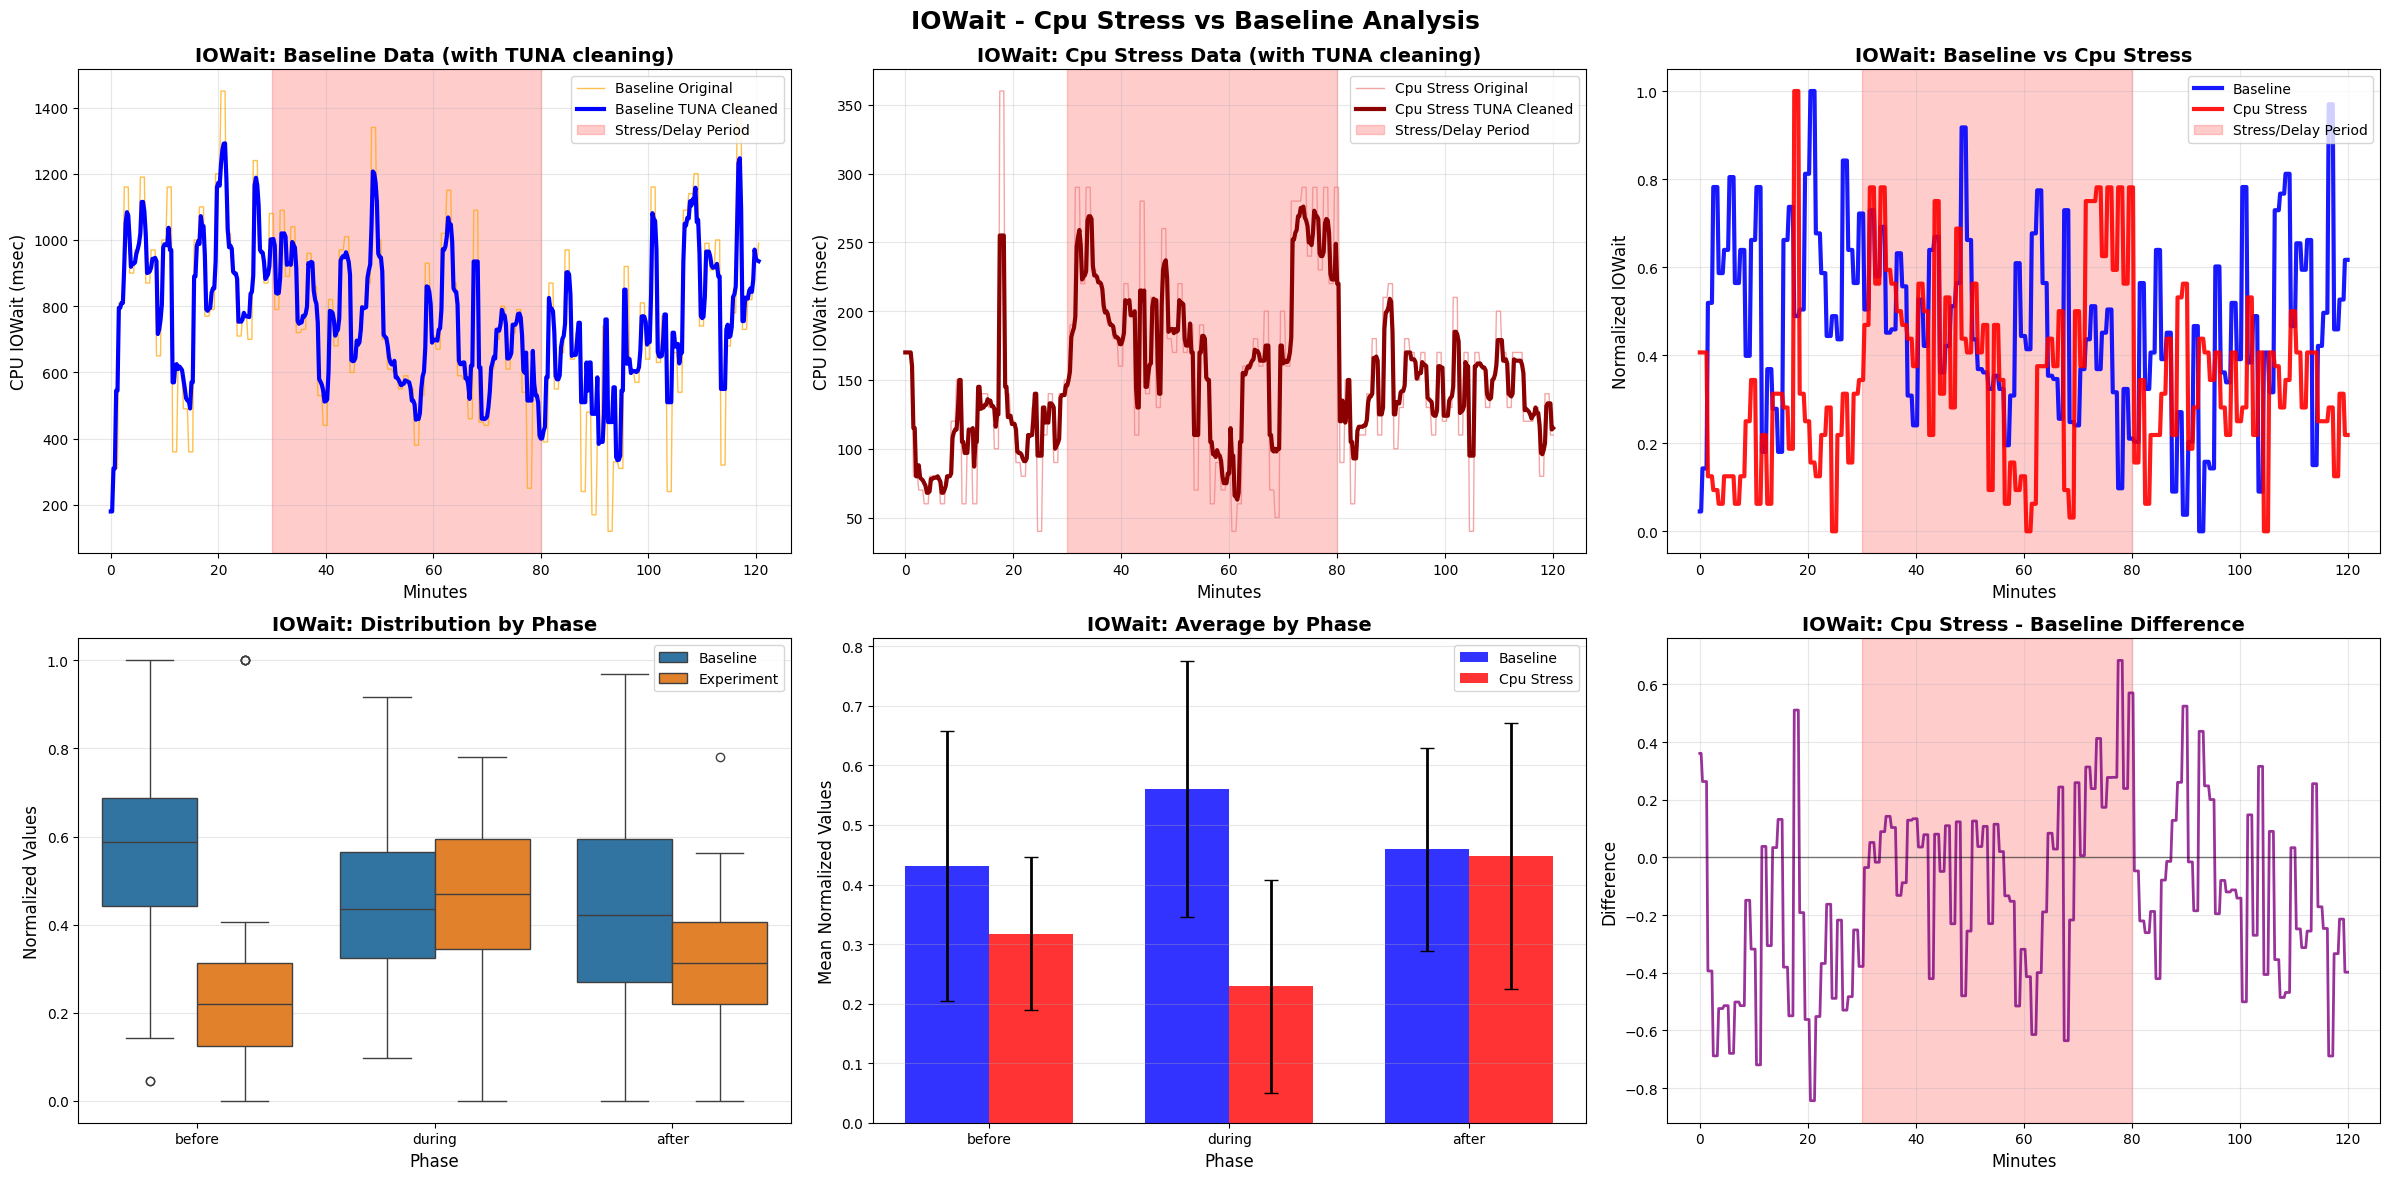


IOWAIT - CPU STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4311  0.2260  0.0000  0.9699
before  0.5596  0.2150  0.0451  1.0000
during  0.4589  0.1706  0.0977  0.9173

CPU STRESS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.3176  0.1288  0.0  0.7812
before  0.2292  0.1788  0.0  1.0000
during  0.4479  0.2241  0.0  0.7812

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 12.95, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  0.55, p=  0.5804 (NOT SIGNIFICANT)
  AFTER   : t=  5.52, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  -59.05% (DECREASE)
  DURING  :   -2.40% (DECREASE)
  AFTER   :  -26.33% (DECREASE)

📊 Comparing delay vs baseline for IOWait


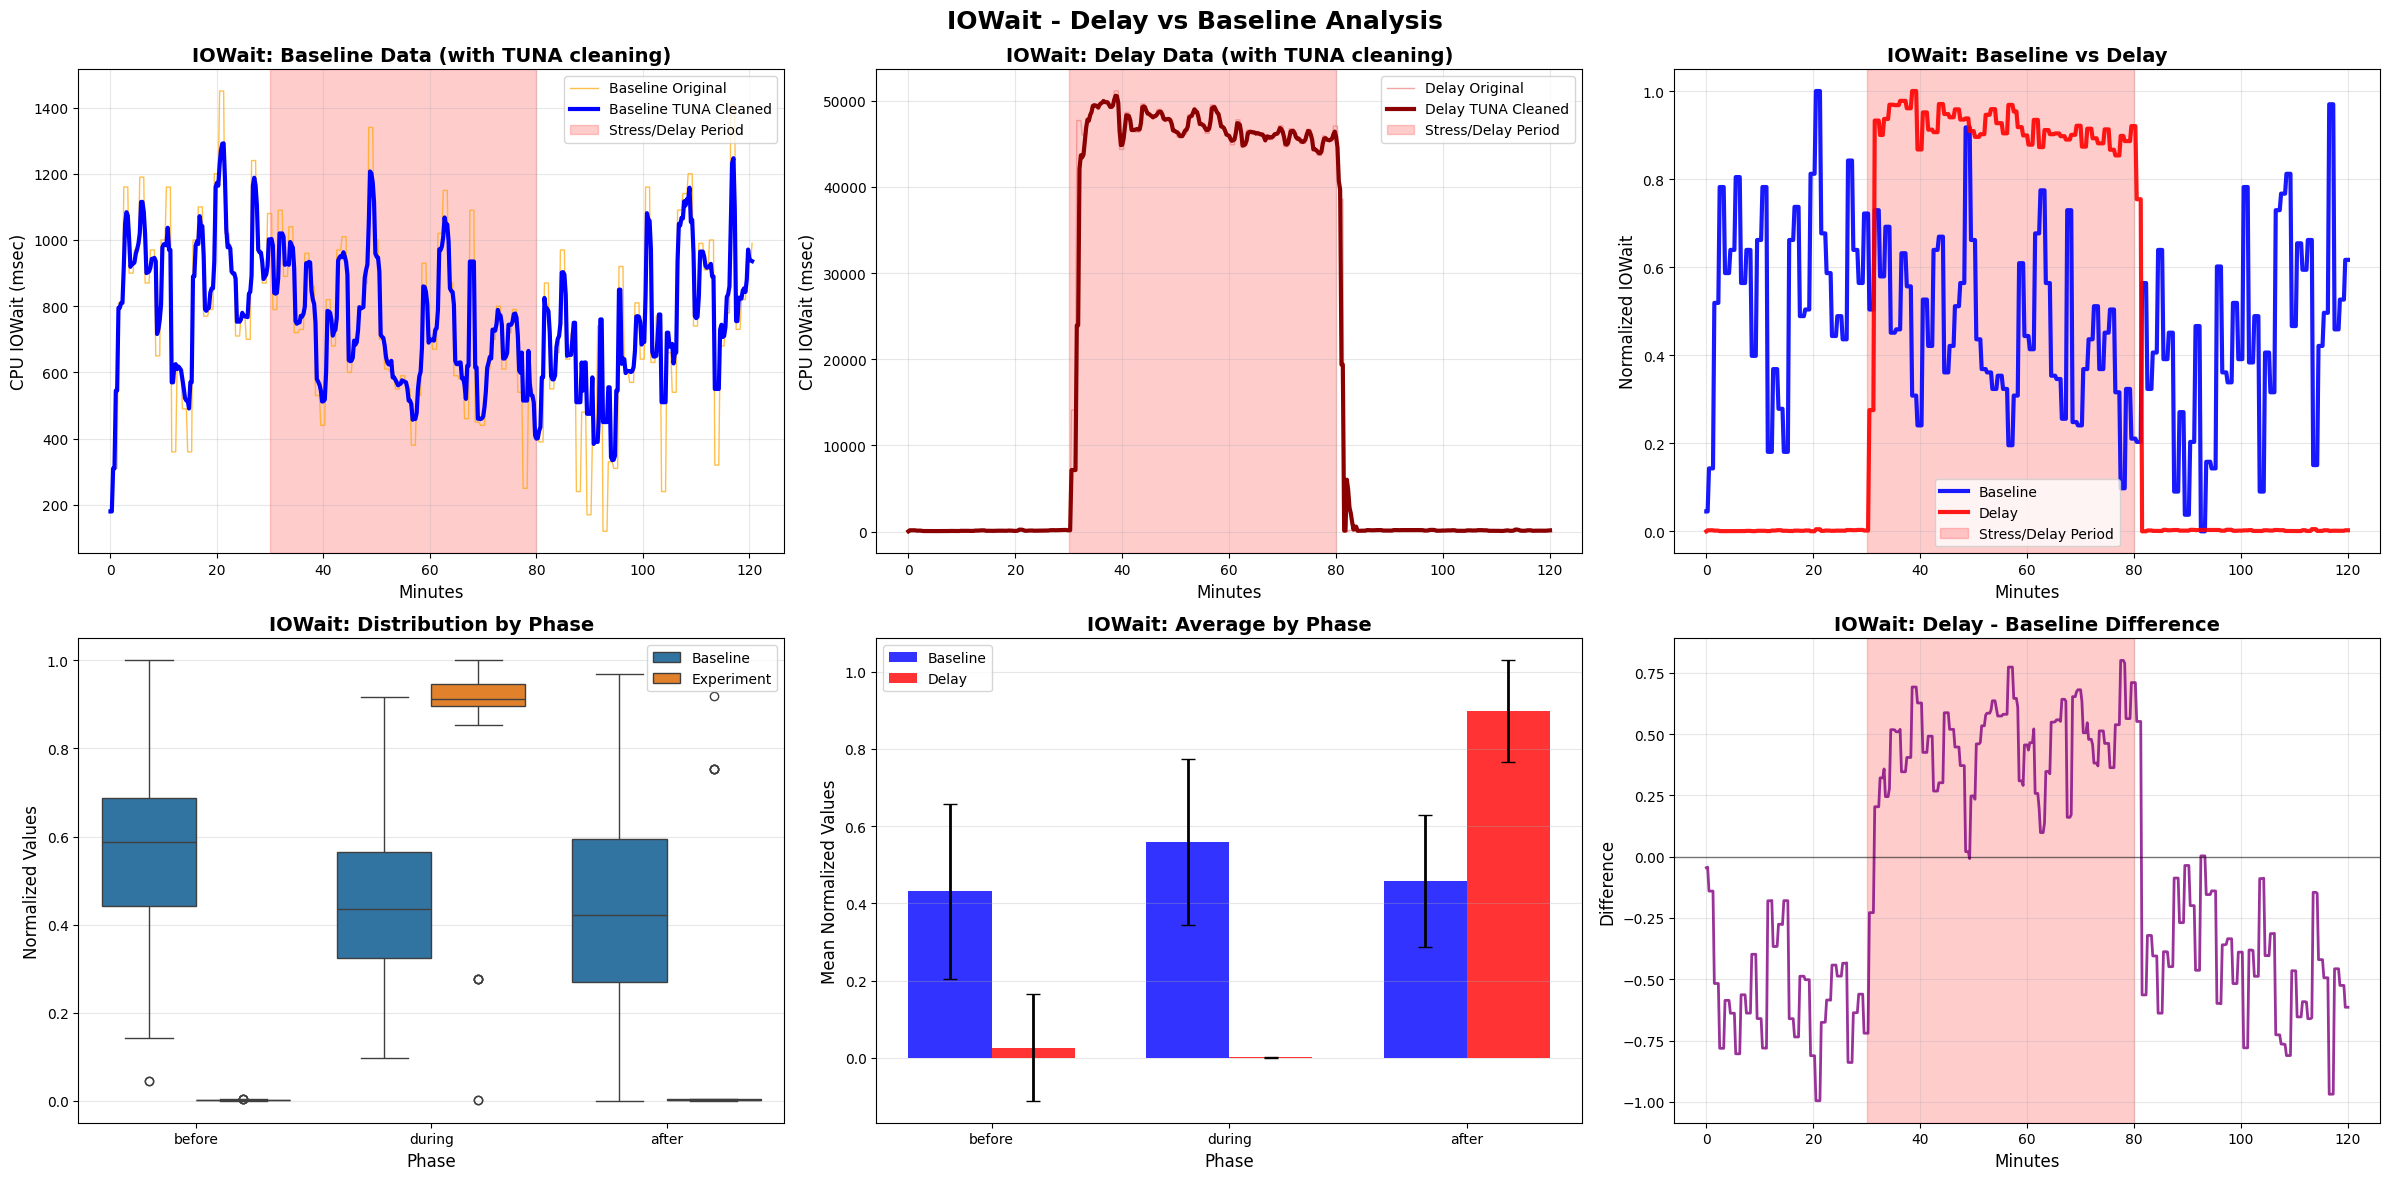


IOWAIT - DELAY VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4311  0.2260  0.0000  0.9699
before  0.5596  0.2150  0.0451  1.0000
during  0.4589  0.1706  0.0977  0.9173

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0265  0.1376  0.0000  0.9203
before  0.0015  0.0010  0.0000  0.0047
during  0.8976  0.1317  0.0018  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 28.45, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-28.86, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 19.34, p=  0.0000 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :  -99.74% (DECREASE)
  DURING  :  +95.60% (INCREASE)
  AFTER   :  -93.85% (DECREASE)

📊 Comparing mem_stress vs baseline for IOWait


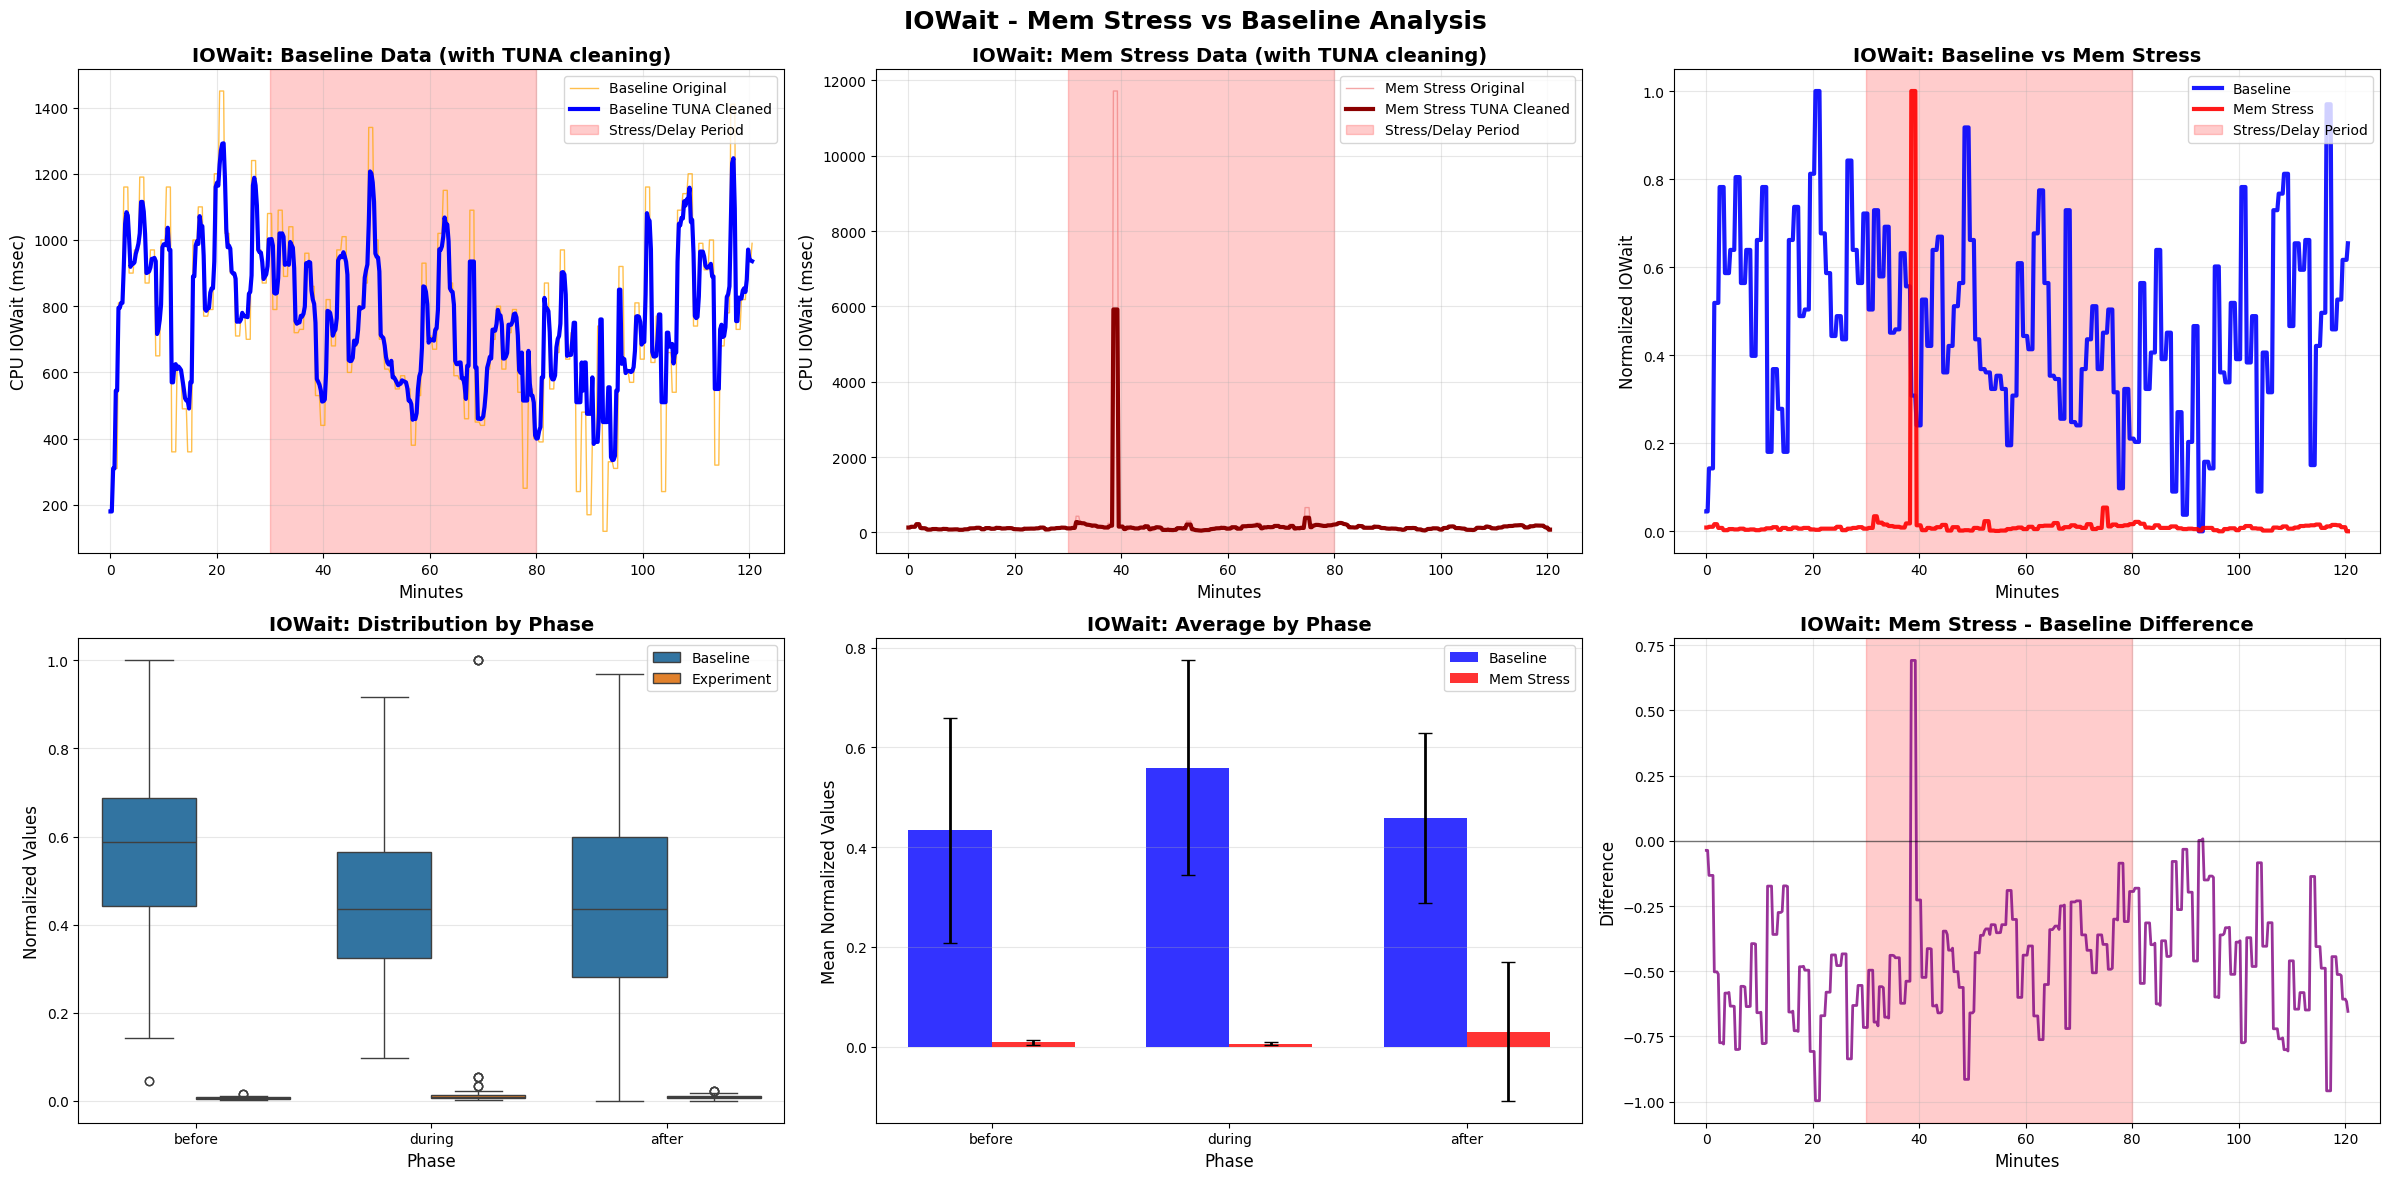


IOWAIT - MEM STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4336  0.2257  0.0000  0.9699
before  0.5596  0.2150  0.0451  1.0000
during  0.4589  0.1706  0.0977  0.9173

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0085  0.0046  0.0000  0.0214
before  0.0063  0.0028  0.0026  0.0163
during  0.0304  0.1388  0.0009  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 28.20, p=  0.0000 (SIGNIFICANT)
  DURING  : t= 27.62, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 23.96, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :  -98.87% (DECREASE)
  DURING  :  -93.38% (DECREASE)
  AFTER   :  -98.03% (DECREASE)

📊 Comparing net_loss vs baseline for IOWait


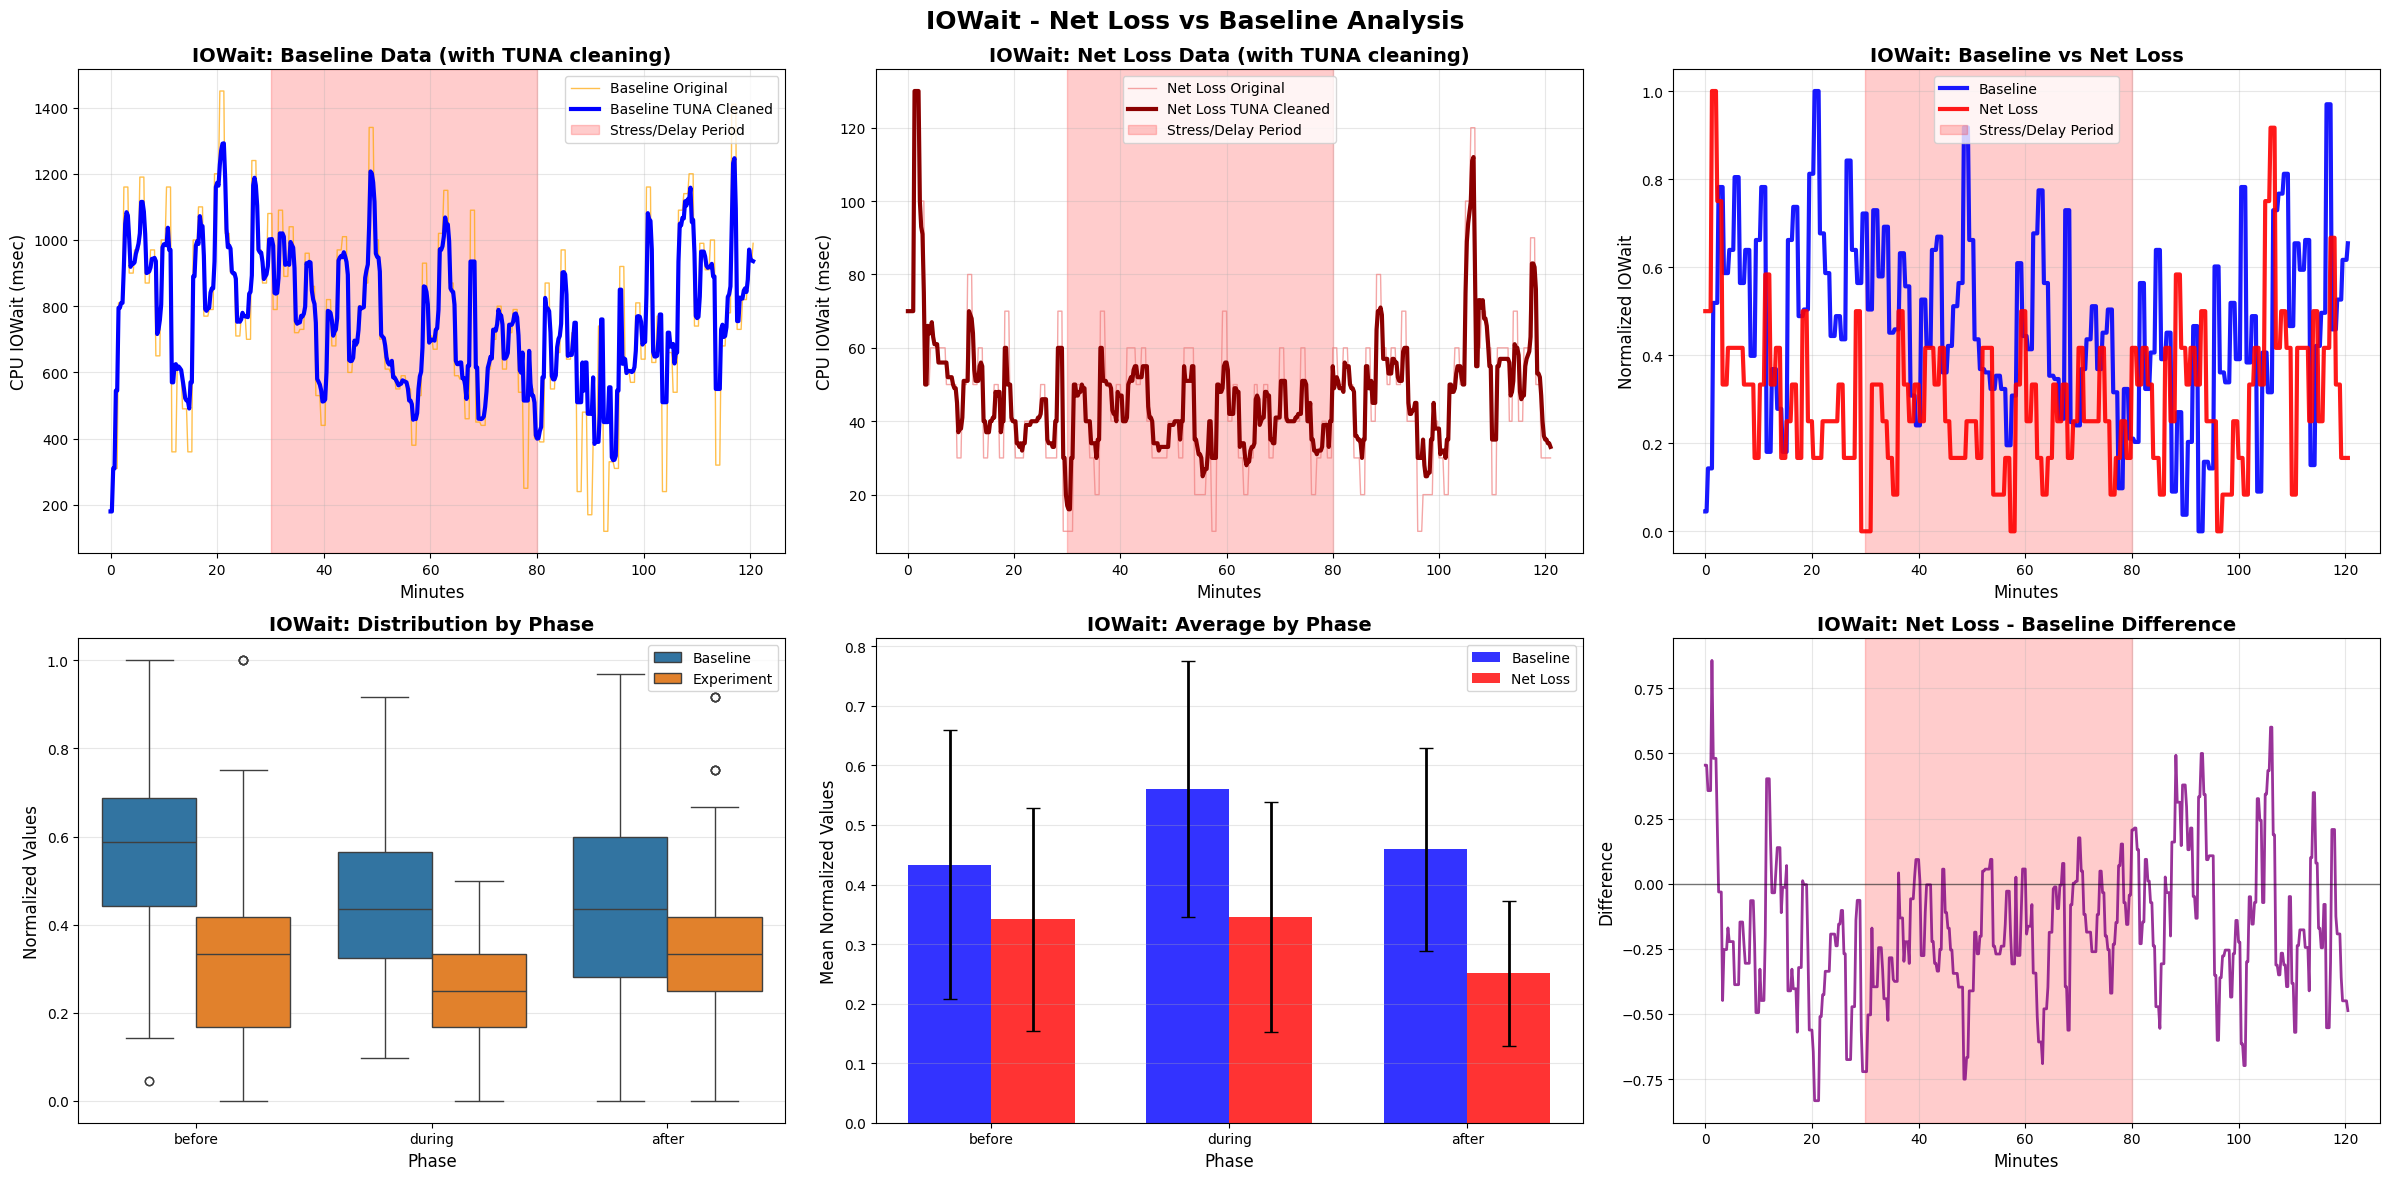


IOWAIT - NET LOSS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4336  0.2257  0.0000  0.9699
before  0.5596  0.2150  0.0451  1.0000
during  0.4589  0.1706  0.0977  0.9173

NET LOSS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.3416  0.1874  0.0  0.9167
before  0.3458  0.1928  0.0  1.0000
during  0.2508  0.1219  0.0  0.5000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  8.11, p=  0.0000 (SIGNIFICANT)
  DURING  : t= 14.07, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  3.99, p=  0.0001 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  -38.21% (DECREASE)
  DURING  :  -45.34% (DECREASE)
  AFTER   :  -21.23% (DECREASE)

🔍 Analyzing IRQ...

📊 Comparing cpu_stress vs baseline for IRQ


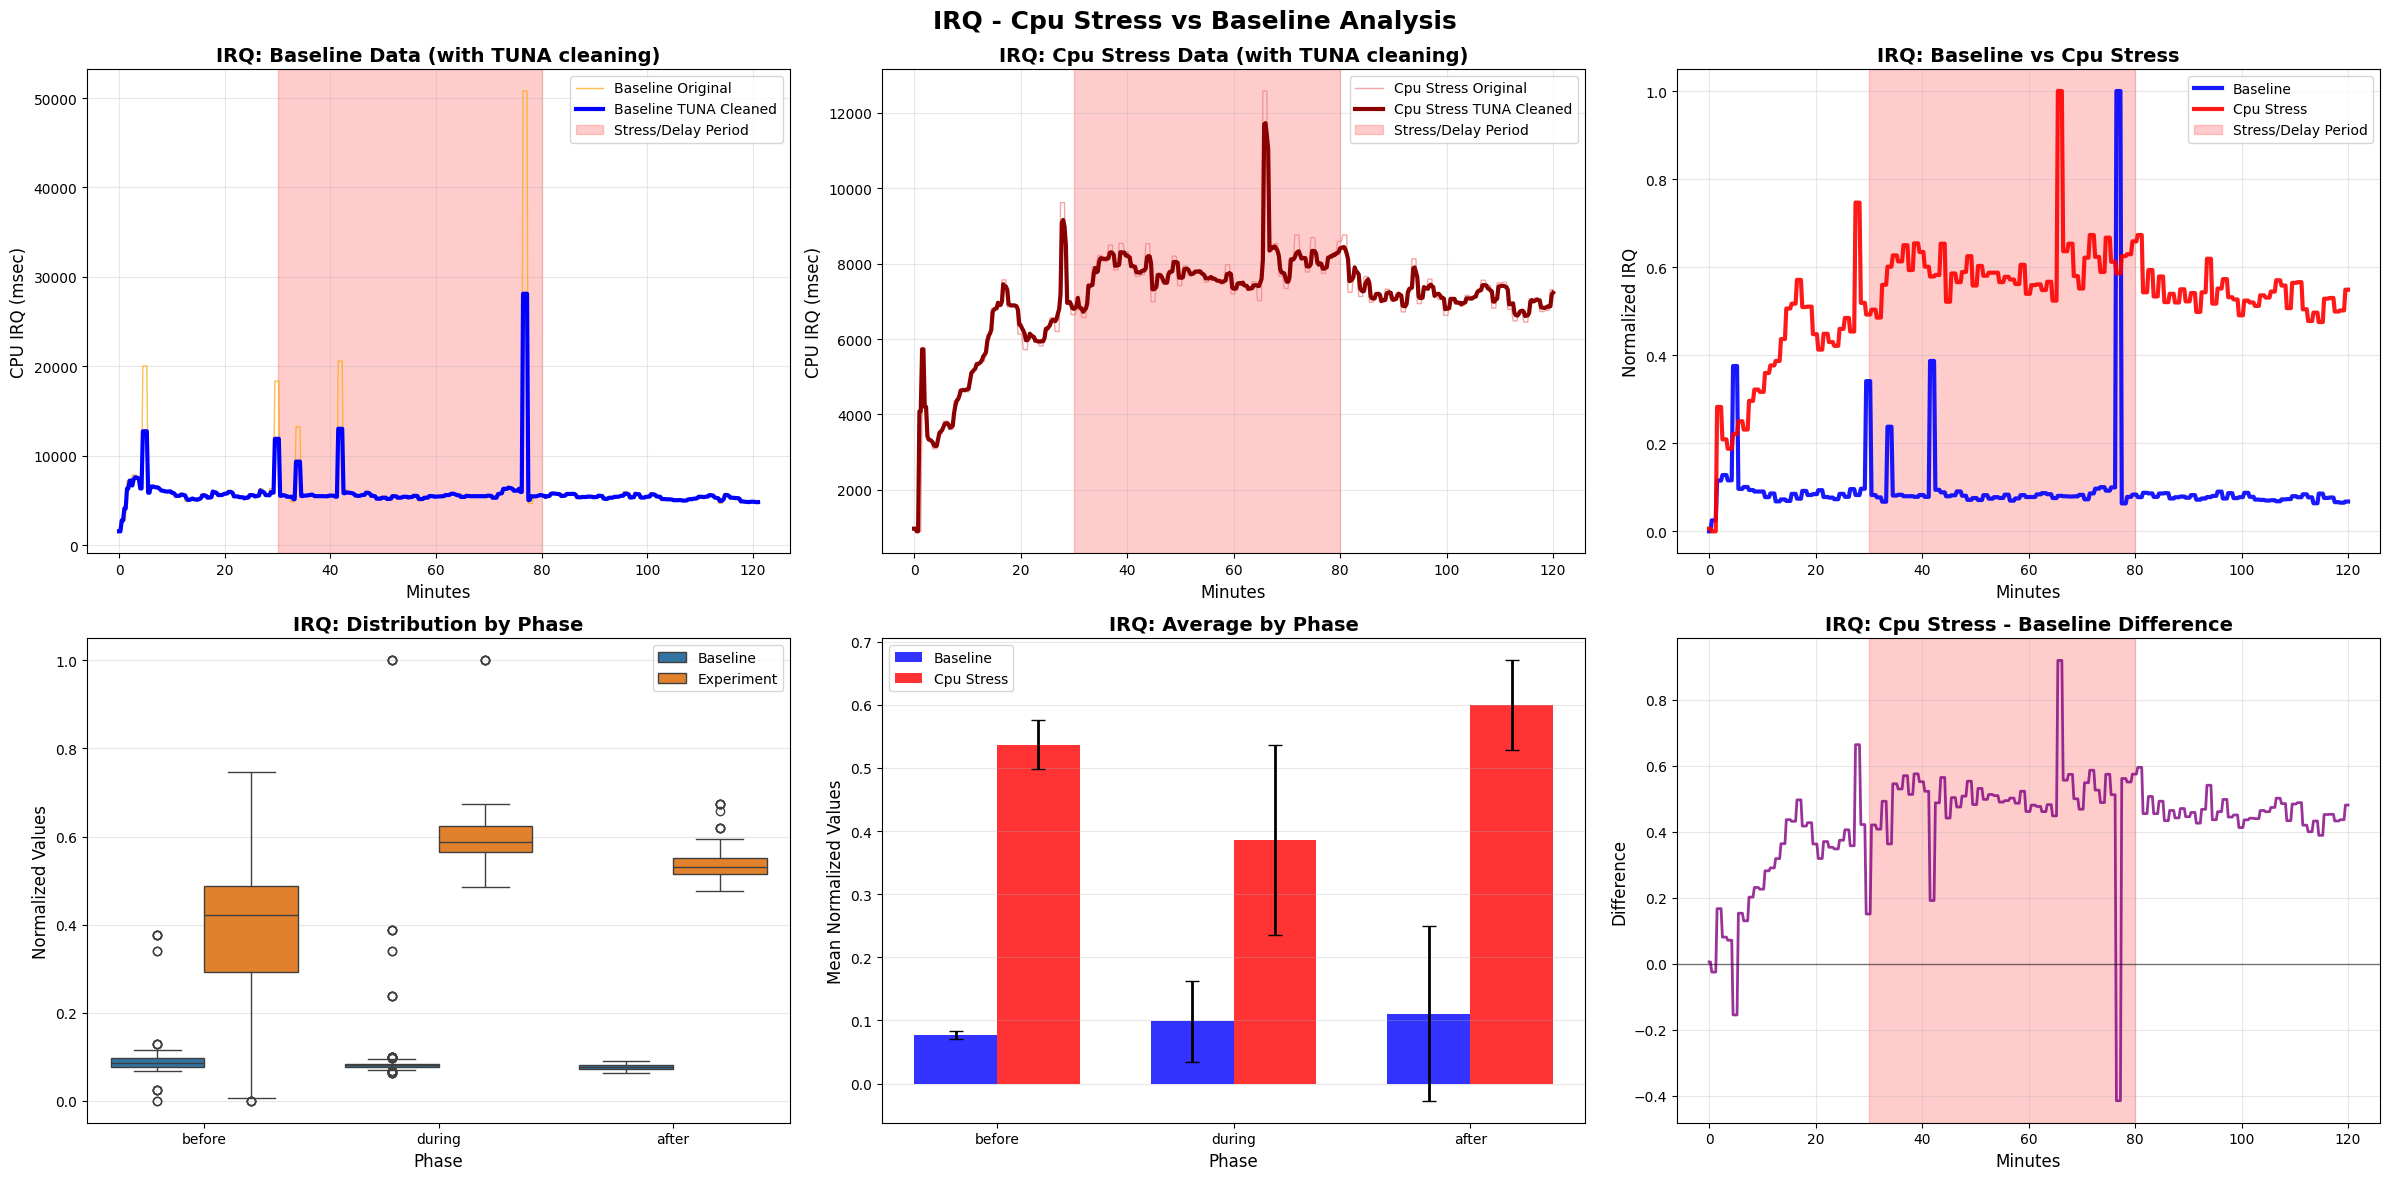


IRQ - CPU STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0772  0.0066  0.0638  0.0902
before  0.0984  0.0648  0.0000  0.3754
during  0.1110  0.1381  0.0634  1.0000

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.5371  0.0384  0.4752  0.6729
before  0.3854  0.1505  0.0000  0.7466
during  0.5991  0.0713  0.4854  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-19.19, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-44.52, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=-149.19, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  : +291.81% (INCREASE)
  DURING  : +439.84% (INCREASE)
  AFTER   : +596.04% (INCREASE)

📊 Comparing delay vs baseline for IRQ


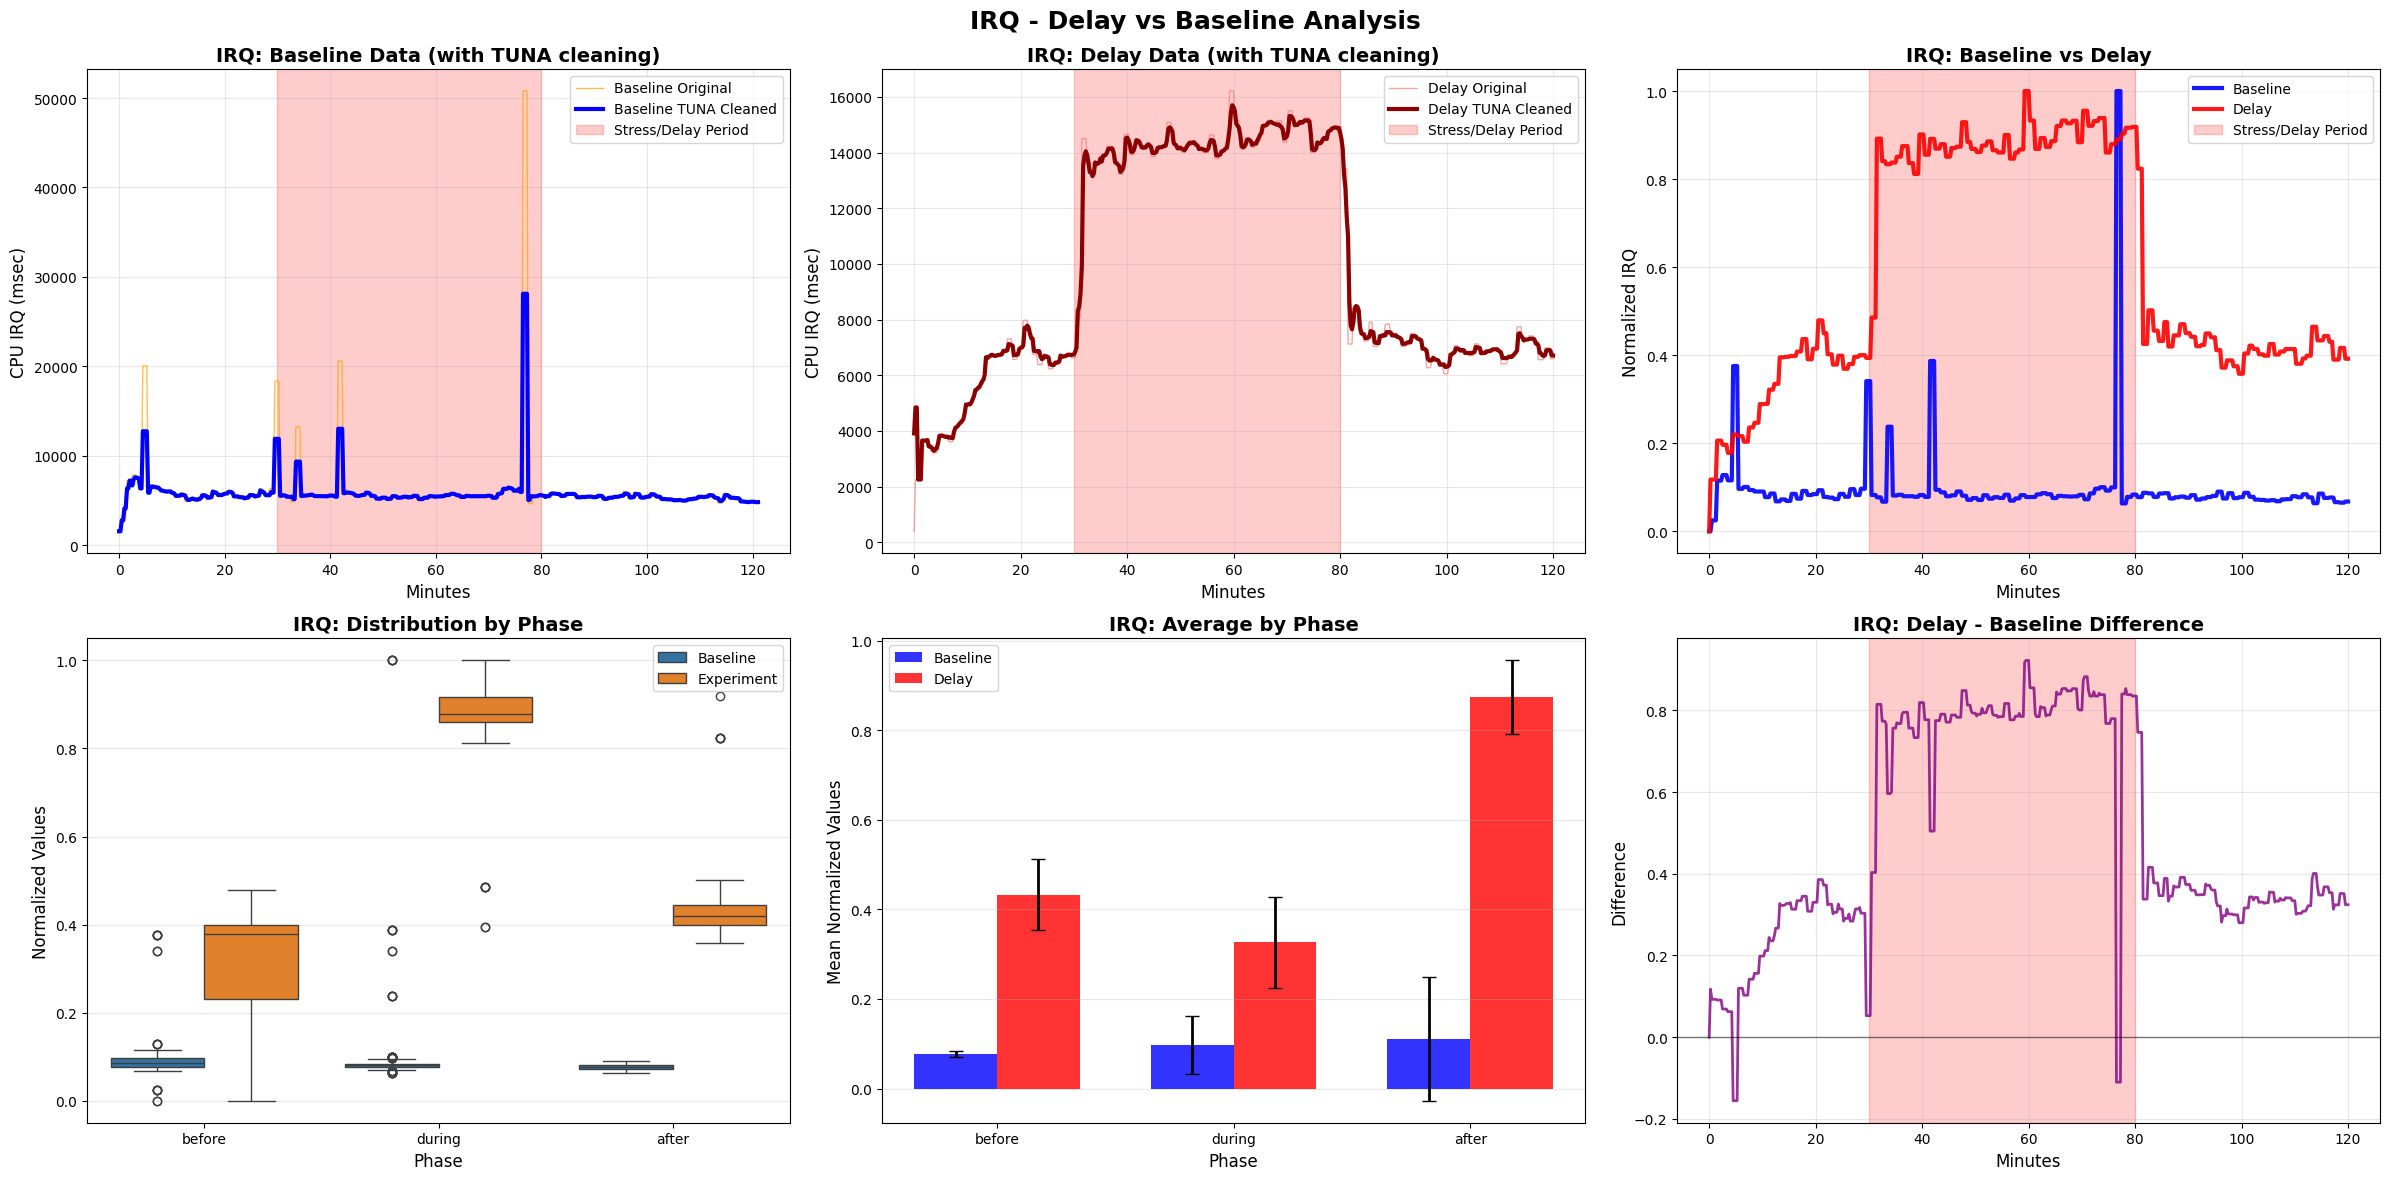


IRQ - DELAY VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0772  0.0066  0.0638  0.0902
before  0.0984  0.0648  0.0000  0.3754
during  0.1110  0.1381  0.0634  1.0000

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4333  0.0798  0.3578  0.9185
before  0.3264  0.1011  0.0000  0.4791
during  0.8740  0.0822  0.3938  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-20.80, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-67.30, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=-56.24, p=  0.0000 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  : +231.78% (INCREASE)
  DURING  : +687.47% (INCREASE)
  AFTER   : +461.45% (INCREASE)

📊 Comparing mem_stress vs baseline for IRQ


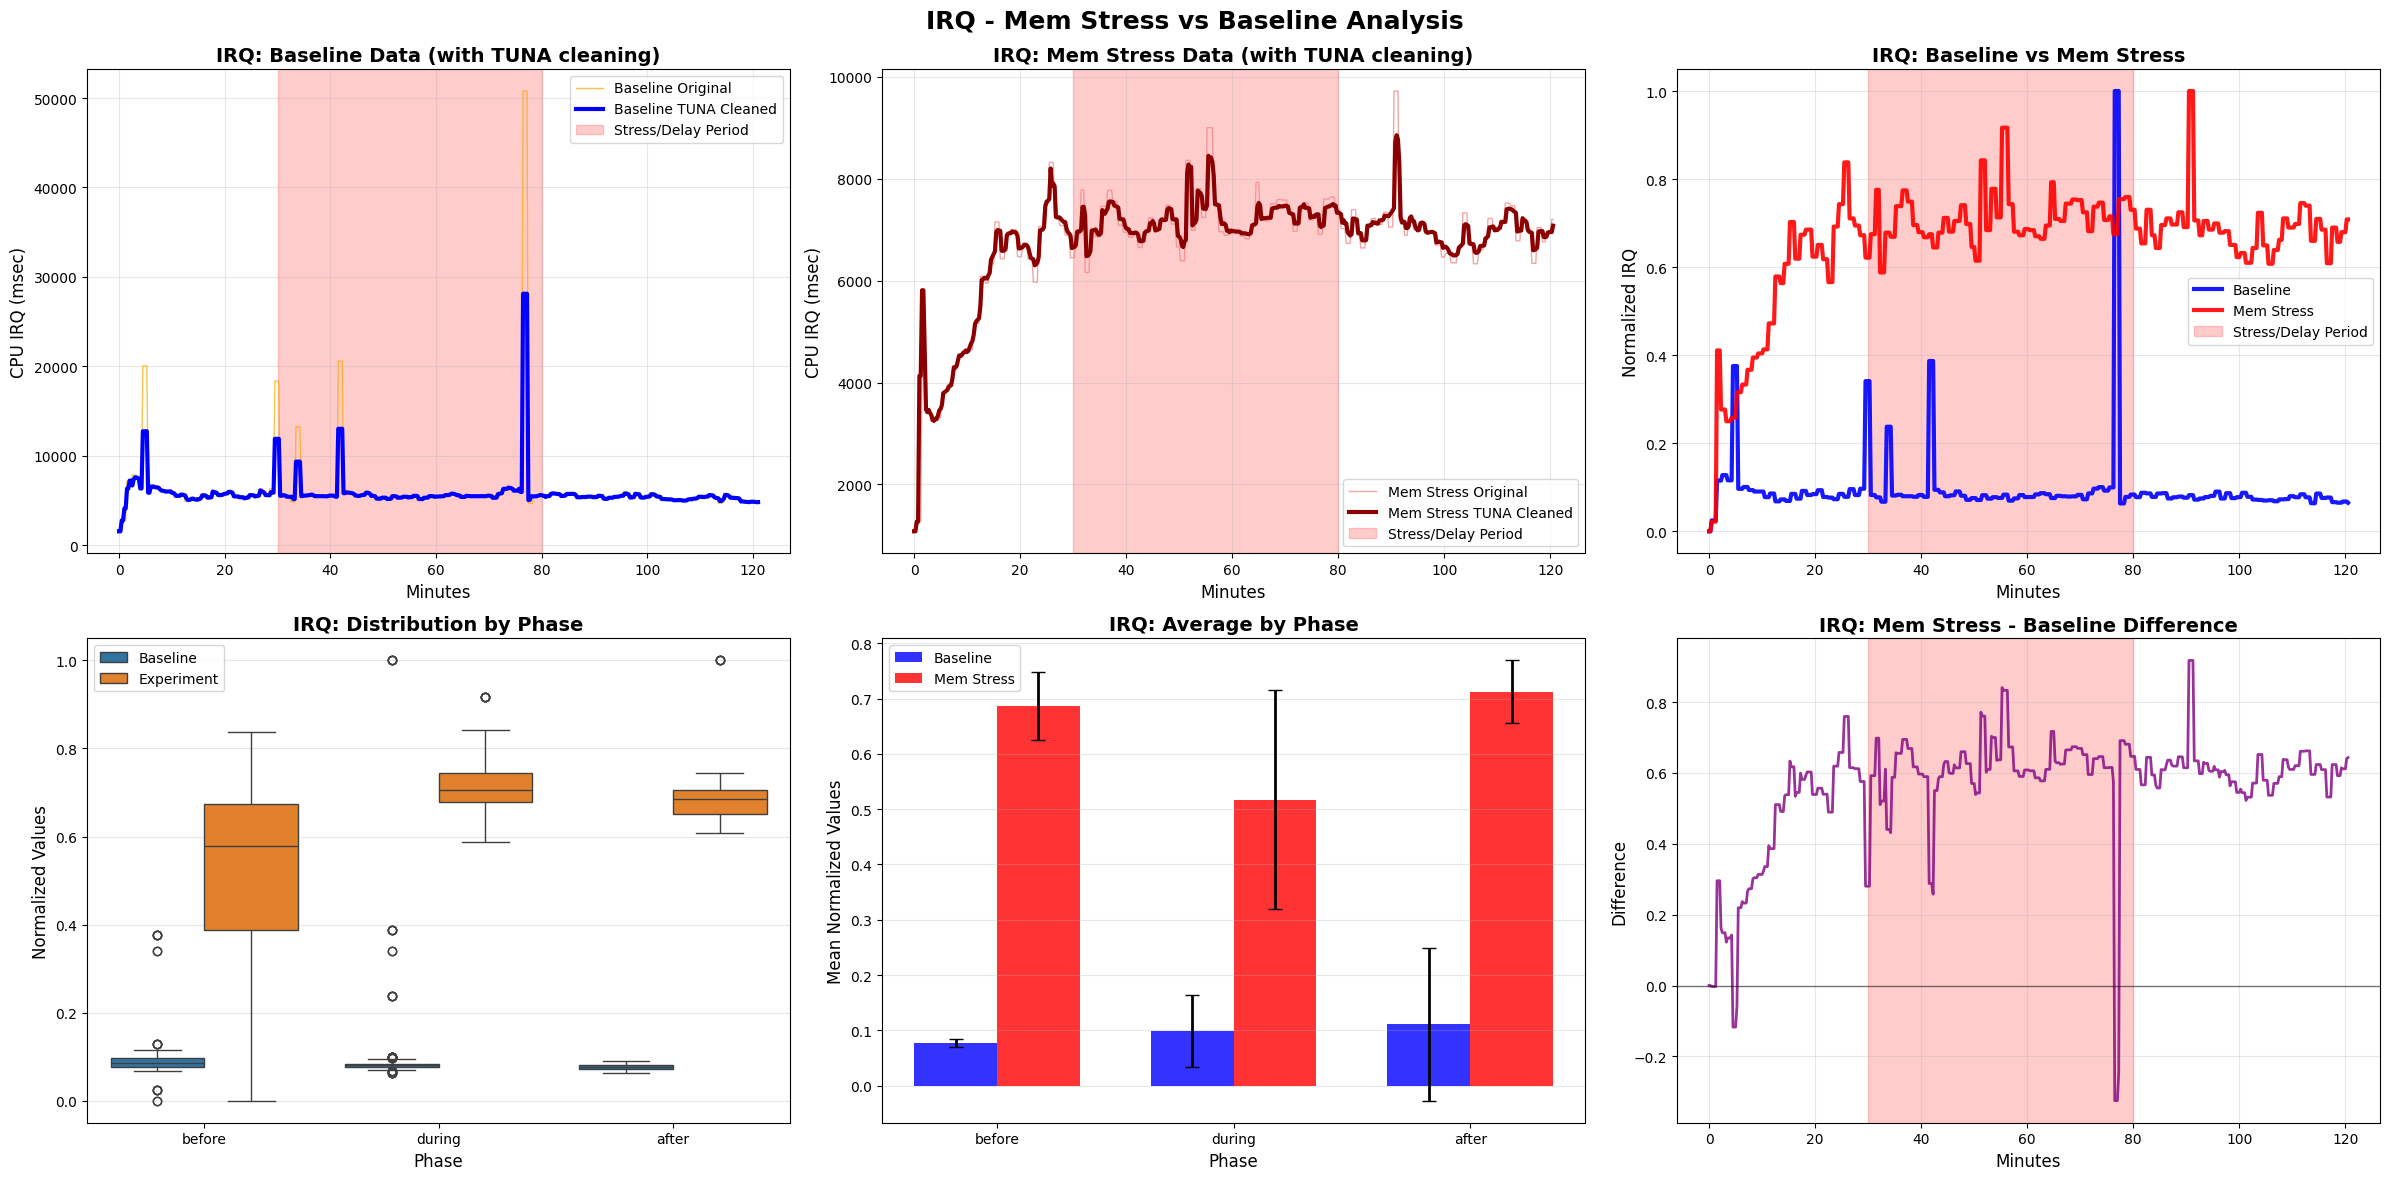


IRQ - MEM STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0770  0.0067  0.0638  0.0902
before  0.0984  0.0648  0.0000  0.3754
during  0.1110  0.1381  0.0634  1.0000

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6870  0.0612  0.6076  1.0000
before  0.5171  0.1979  0.0000  0.8380
during  0.7123  0.0566  0.5880  0.9167

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-22.03, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-57.11, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=-126.06, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  : +425.70% (INCREASE)
  DURING  : +541.82% (INCREASE)
  AFTER   : +791.81% (INCREASE)

📊 Comparing net_loss vs baseline for IRQ


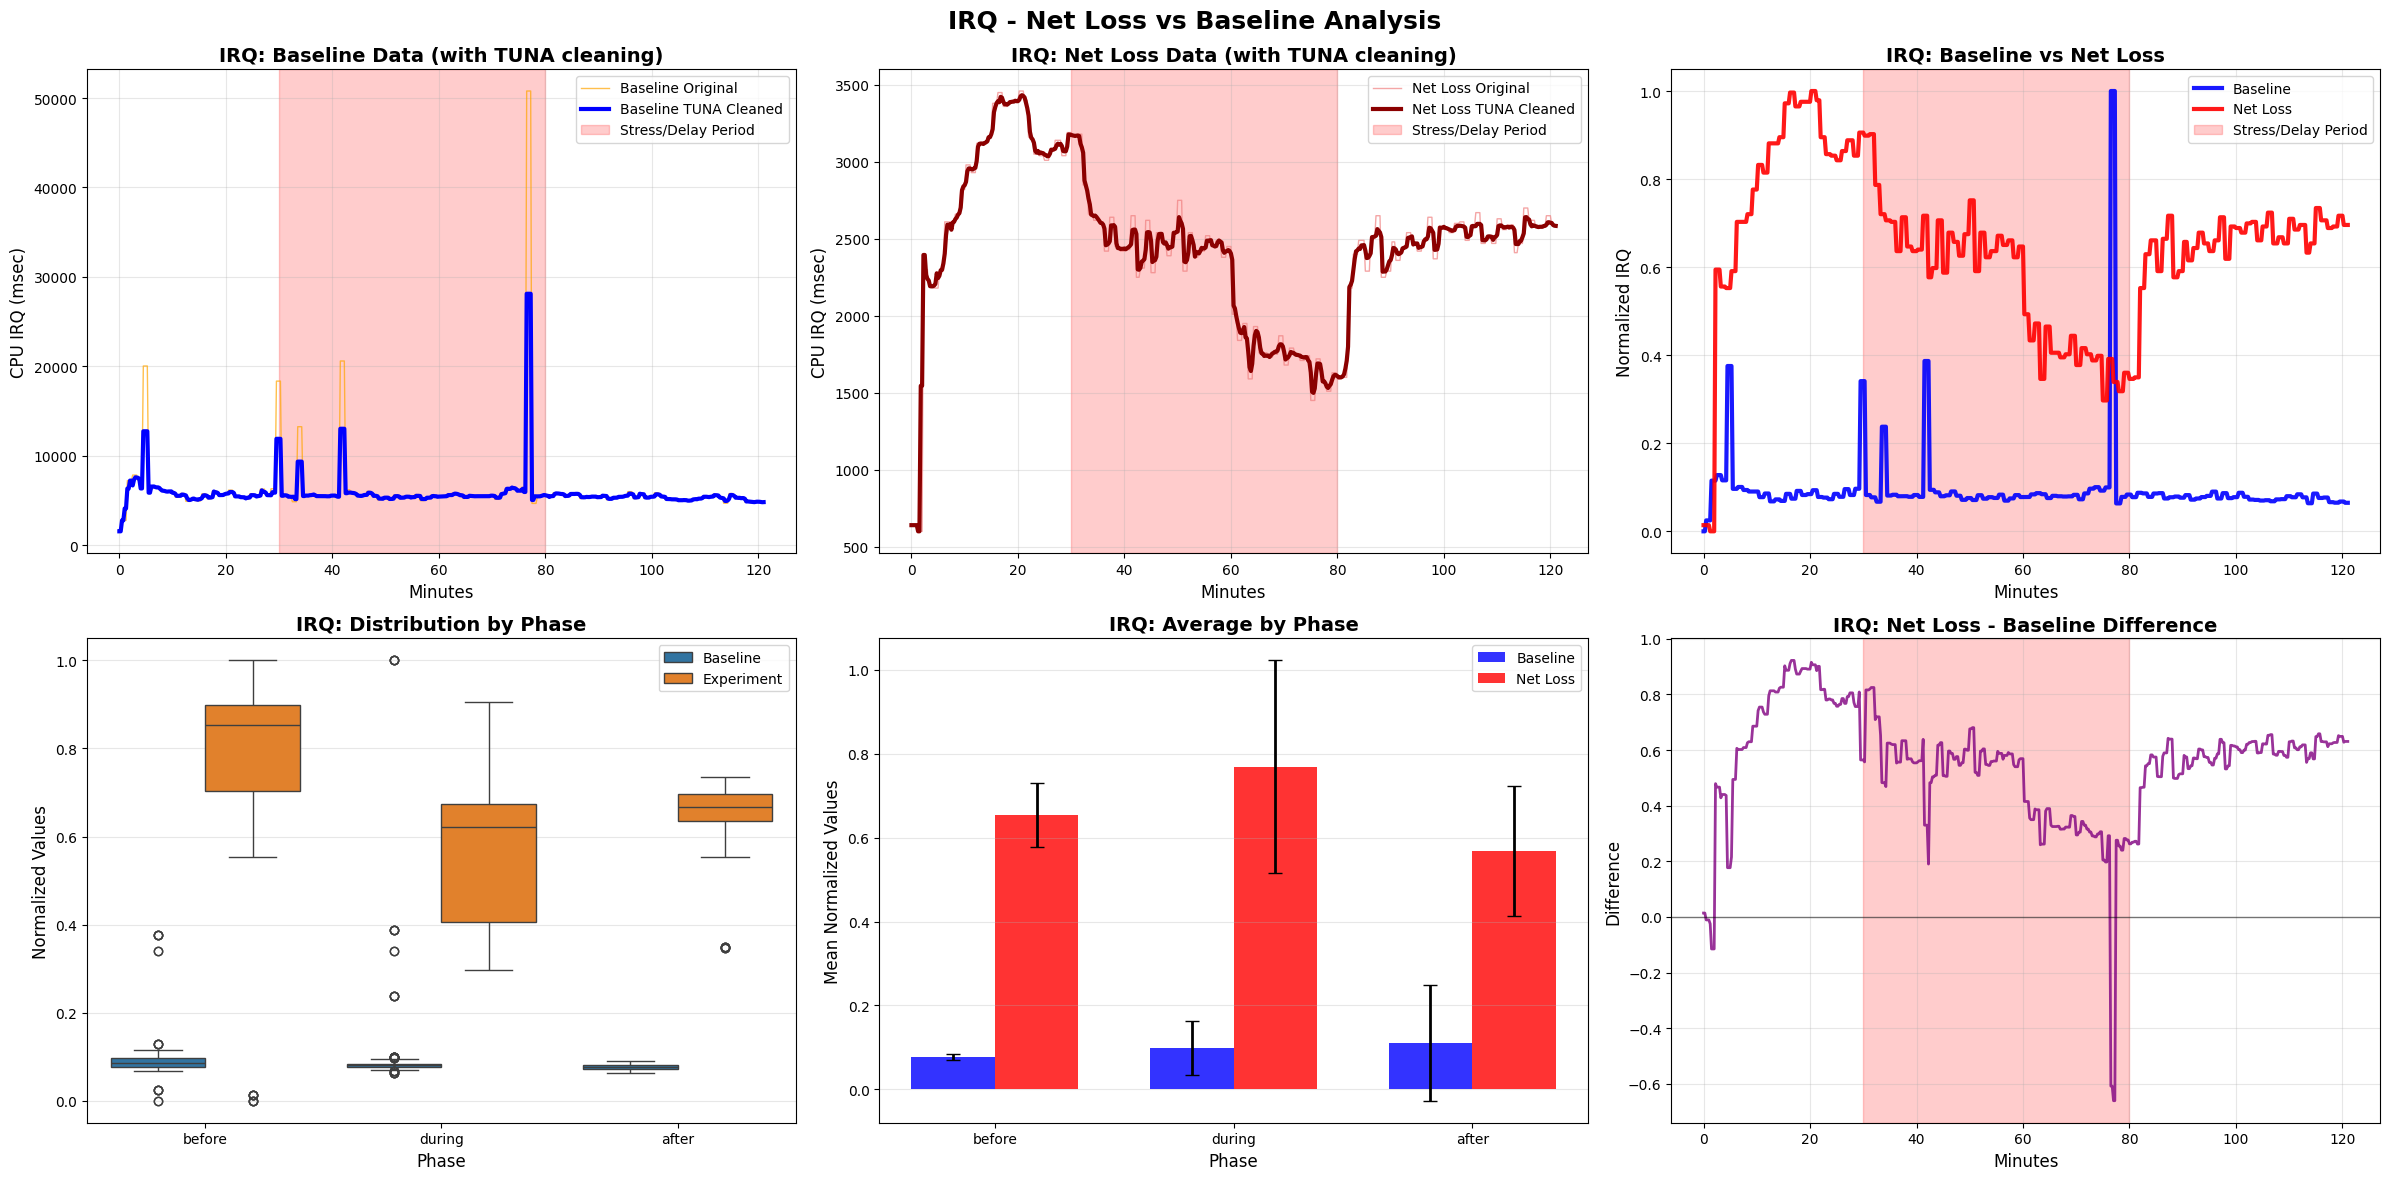


IRQ - NET LOSS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0769  0.0068  0.0638  0.0902
before  0.0984  0.0648  0.0000  0.3754
during  0.1110  0.1381  0.0634  1.0000

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6534  0.0766  0.3462  0.7343
before  0.7697  0.2530  0.0000  1.0000
during  0.5676  0.1550  0.2972  0.9056

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-28.16, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-31.17, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=-96.01, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  : +682.43% (INCREASE)
  DURING  : +411.40% (INCREASE)
  AFTER   : +749.81% (INCREASE)

🔍 Analyzing System...

📊 Comparing cpu_stress vs baseline for System


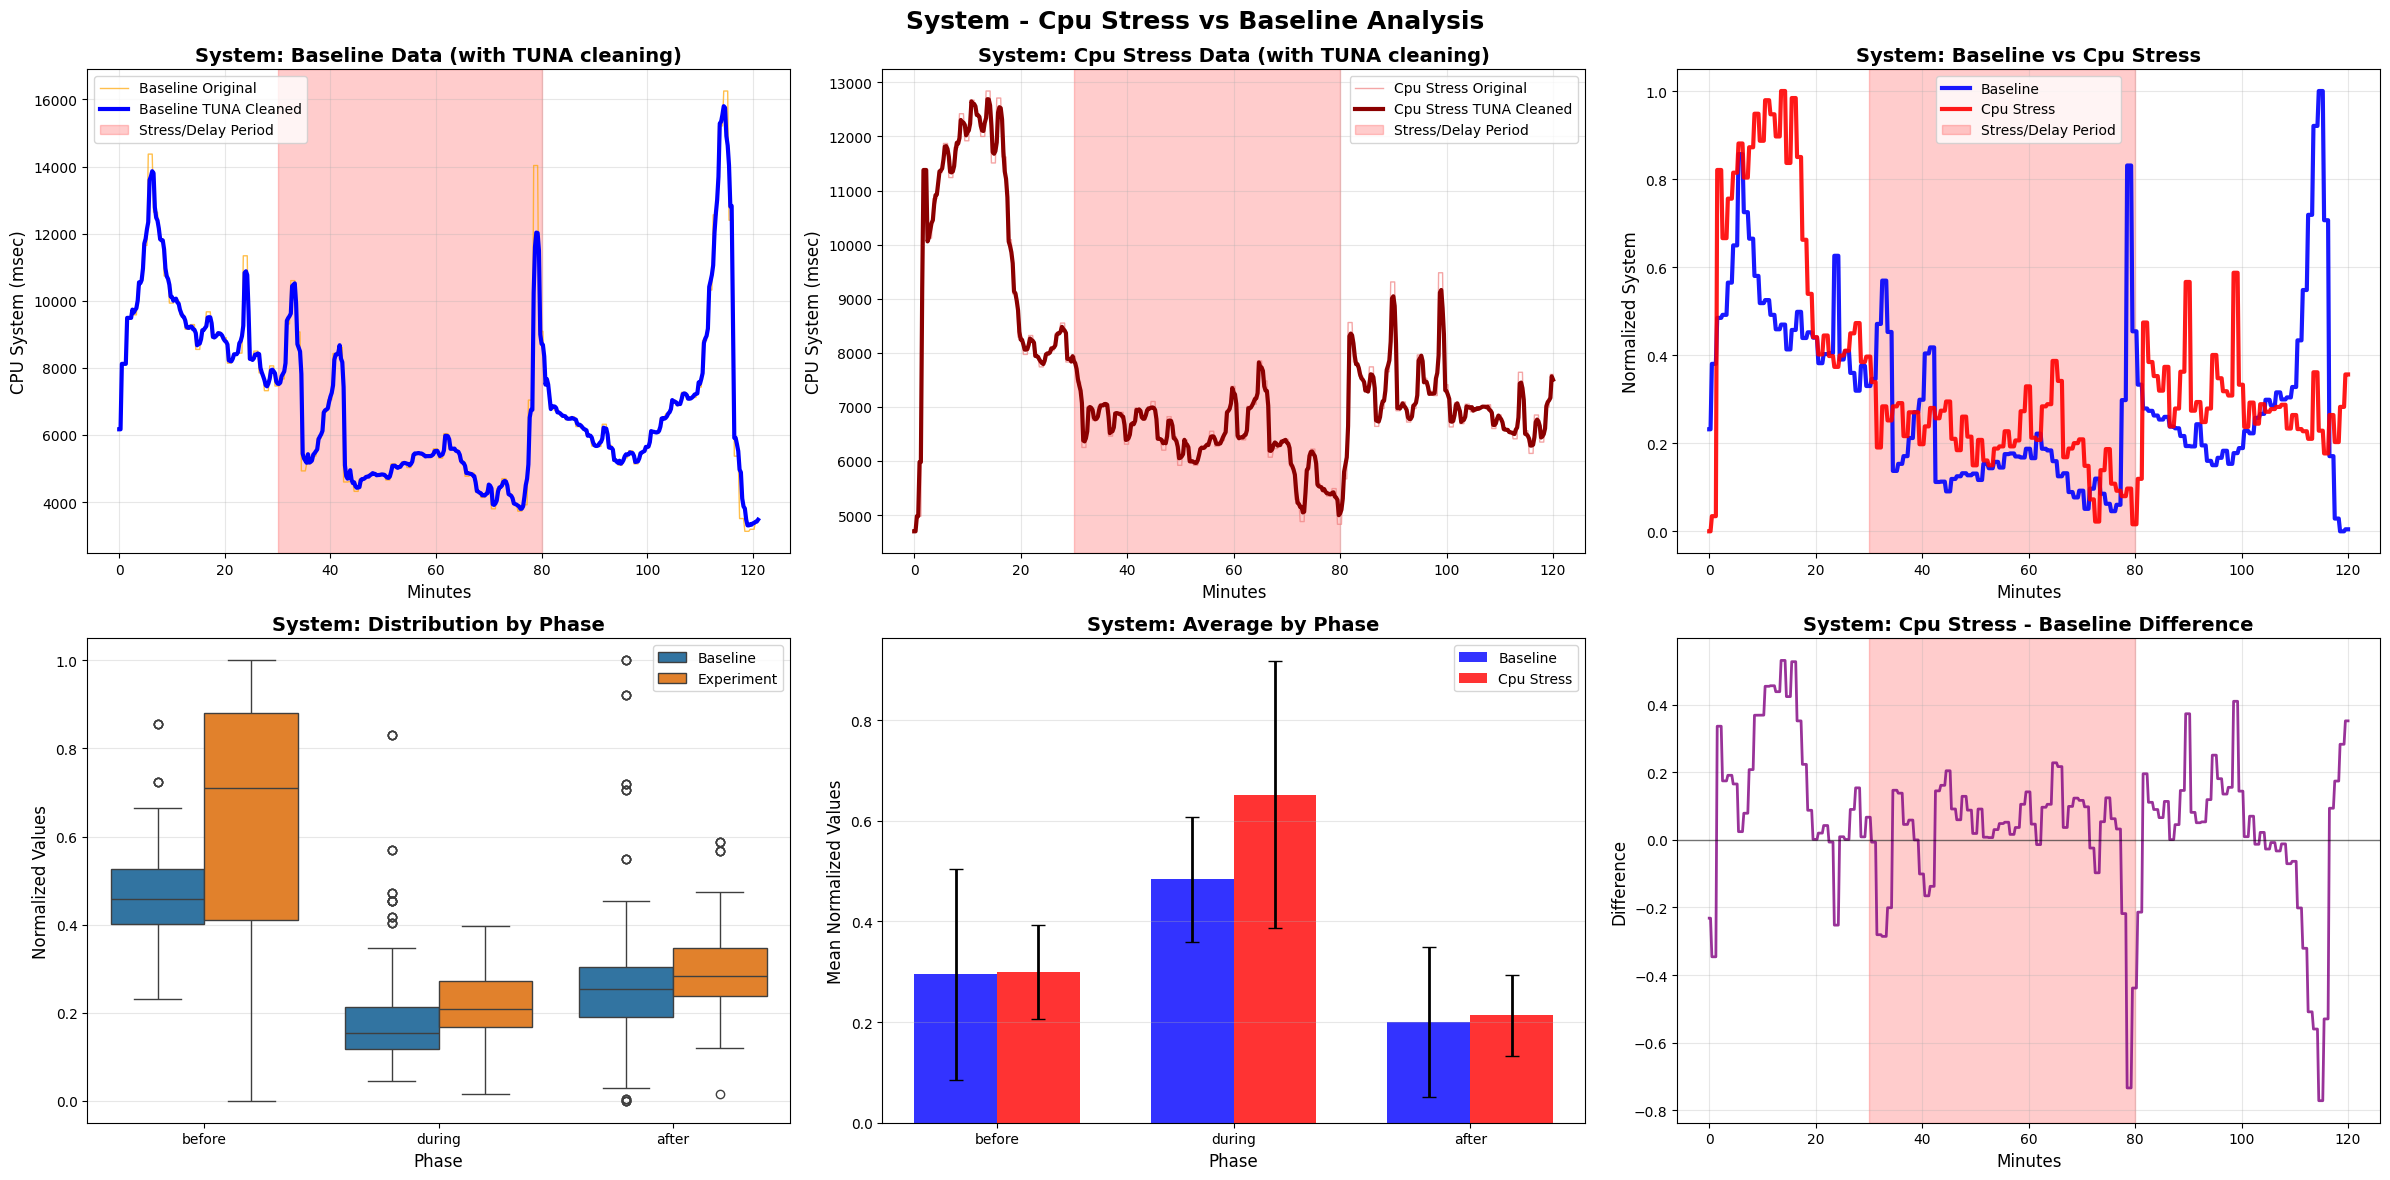


SYSTEM - CPU STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2952  0.2094  0.0000  1.0000
before  0.4837  0.1235  0.2317  0.8567
during  0.1997  0.1492  0.0457  0.8308

CPU STRESS STATISTICS BY PHASE:
          mean     std    min     max
phase                                
after   0.2999  0.0936  0.016  0.5872
before  0.6517  0.2650  0.000  1.0000
during  0.2135  0.0801  0.016  0.3968

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -6.30, p=  0.0000 (SIGNIFICANT)
  DURING  : t= -1.16, p=  0.2486 (NOT SIGNIFICANT)
  AFTER   : t= -0.26, p=  0.7949 (NOT SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  +34.75% (INCREASE)
  DURING  :   +6.91% (INCREASE)
  AFTER   :   +1.60% (INCREASE)

📊 Comparing delay vs baseline for System


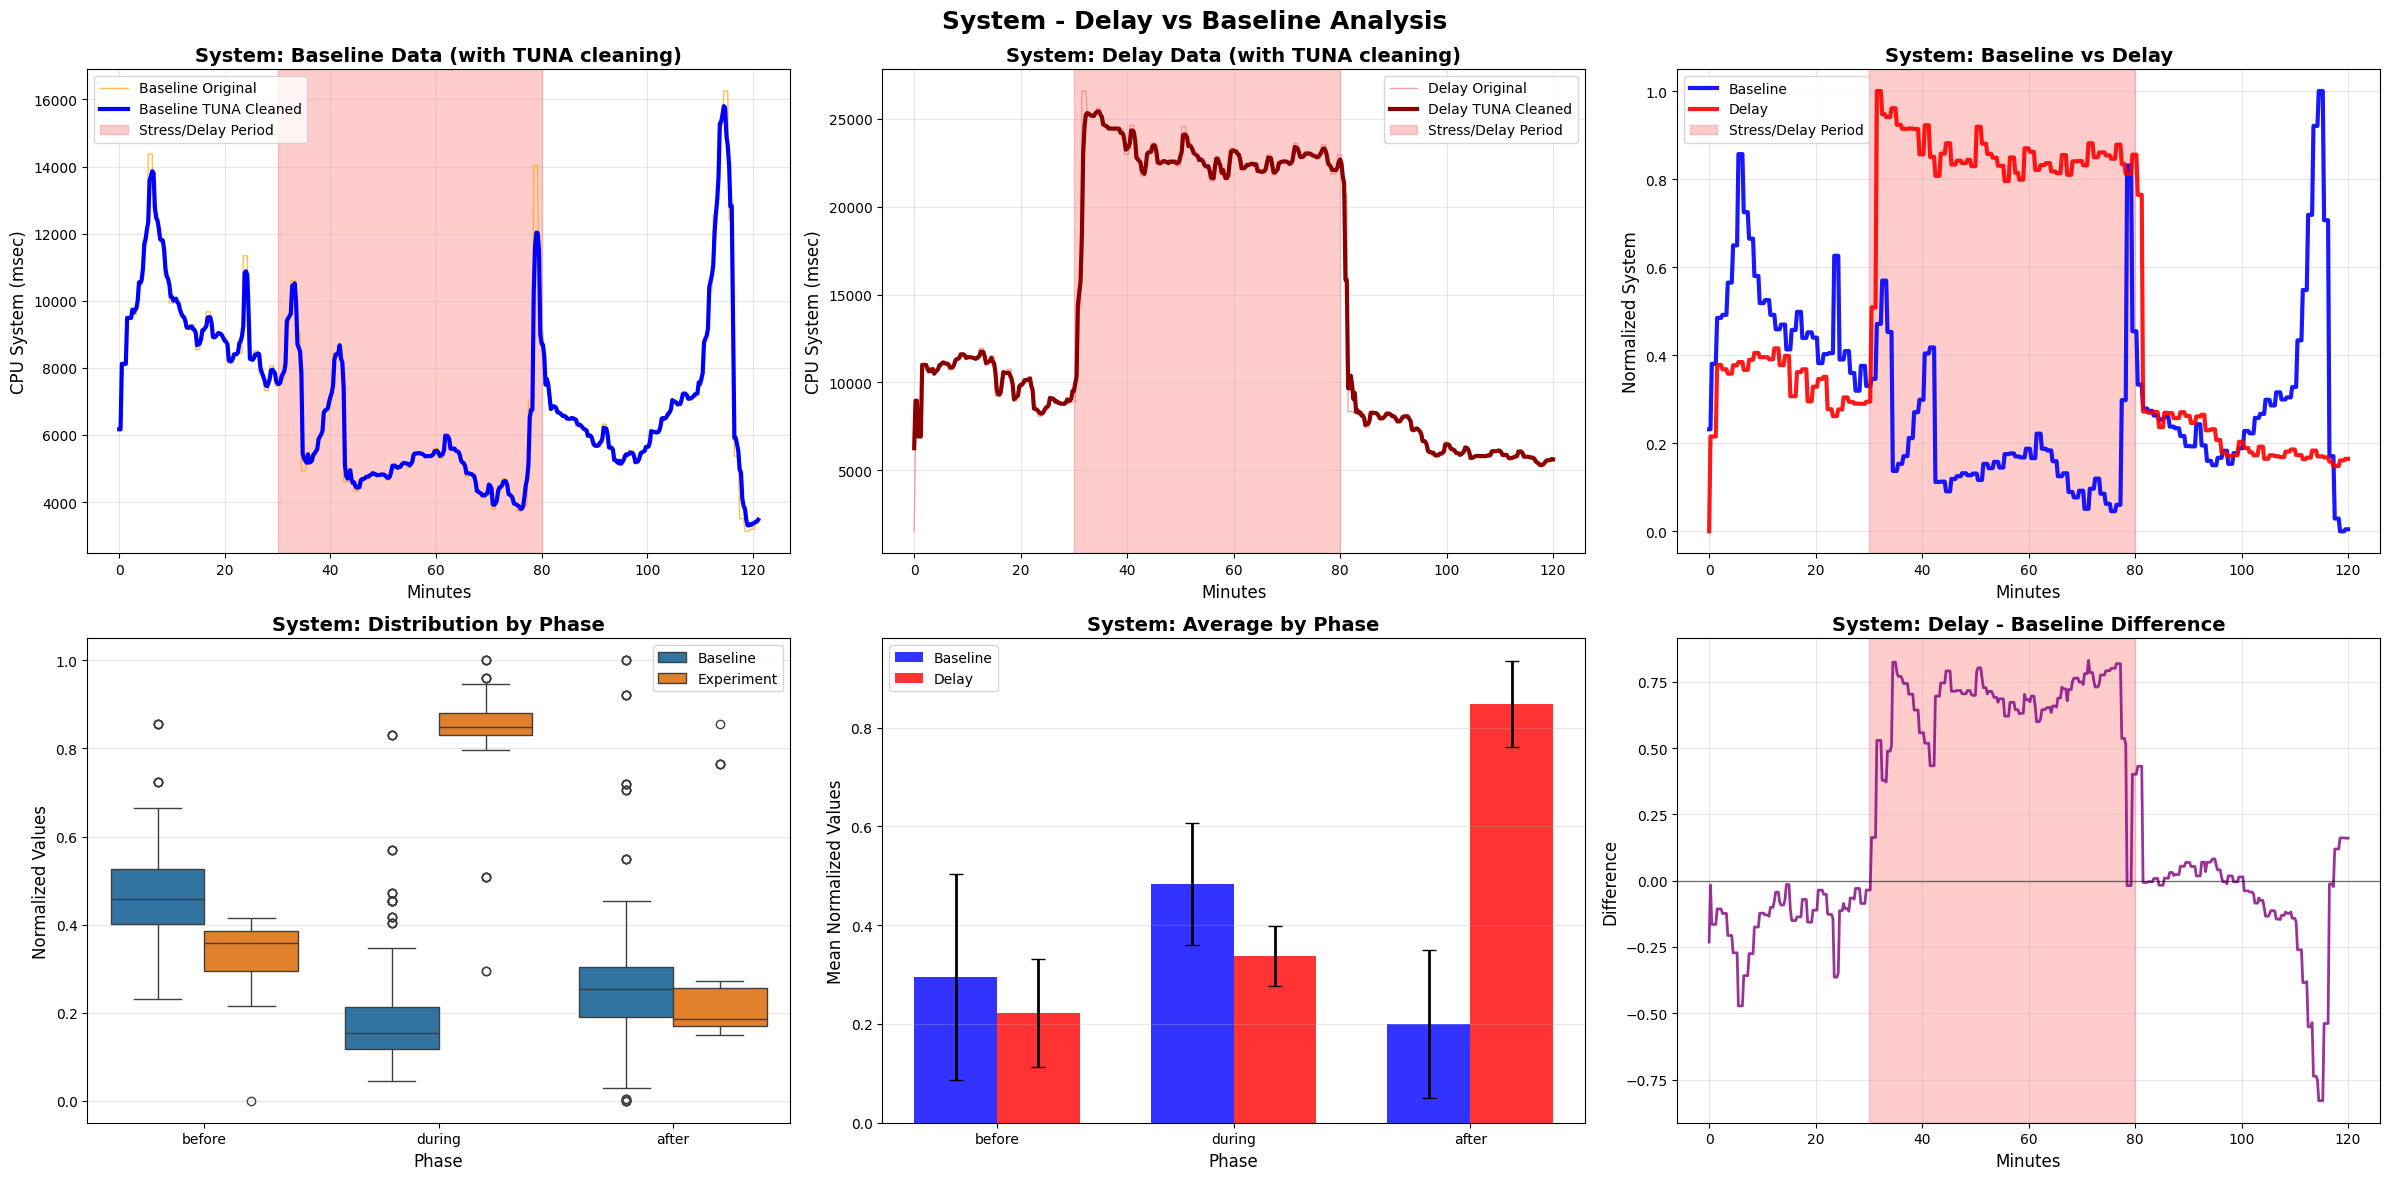


SYSTEM - DELAY VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2952  0.2094  0.0000  1.0000
before  0.4837  0.1235  0.2317  0.8567
during  0.1997  0.1492  0.0457  0.8308

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2221  0.1093  0.1482  0.8554
before  0.3376  0.0605  0.0000  0.4155
during  0.8478  0.0862  0.2944  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 11.63, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-53.33, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  3.91, p=  0.0001 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :  -30.19% (DECREASE)
  DURING  : +324.52% (INCREASE)
  AFTER   :  -24.75% (DECREASE)

📊 Comparing mem_stress vs baseline for System


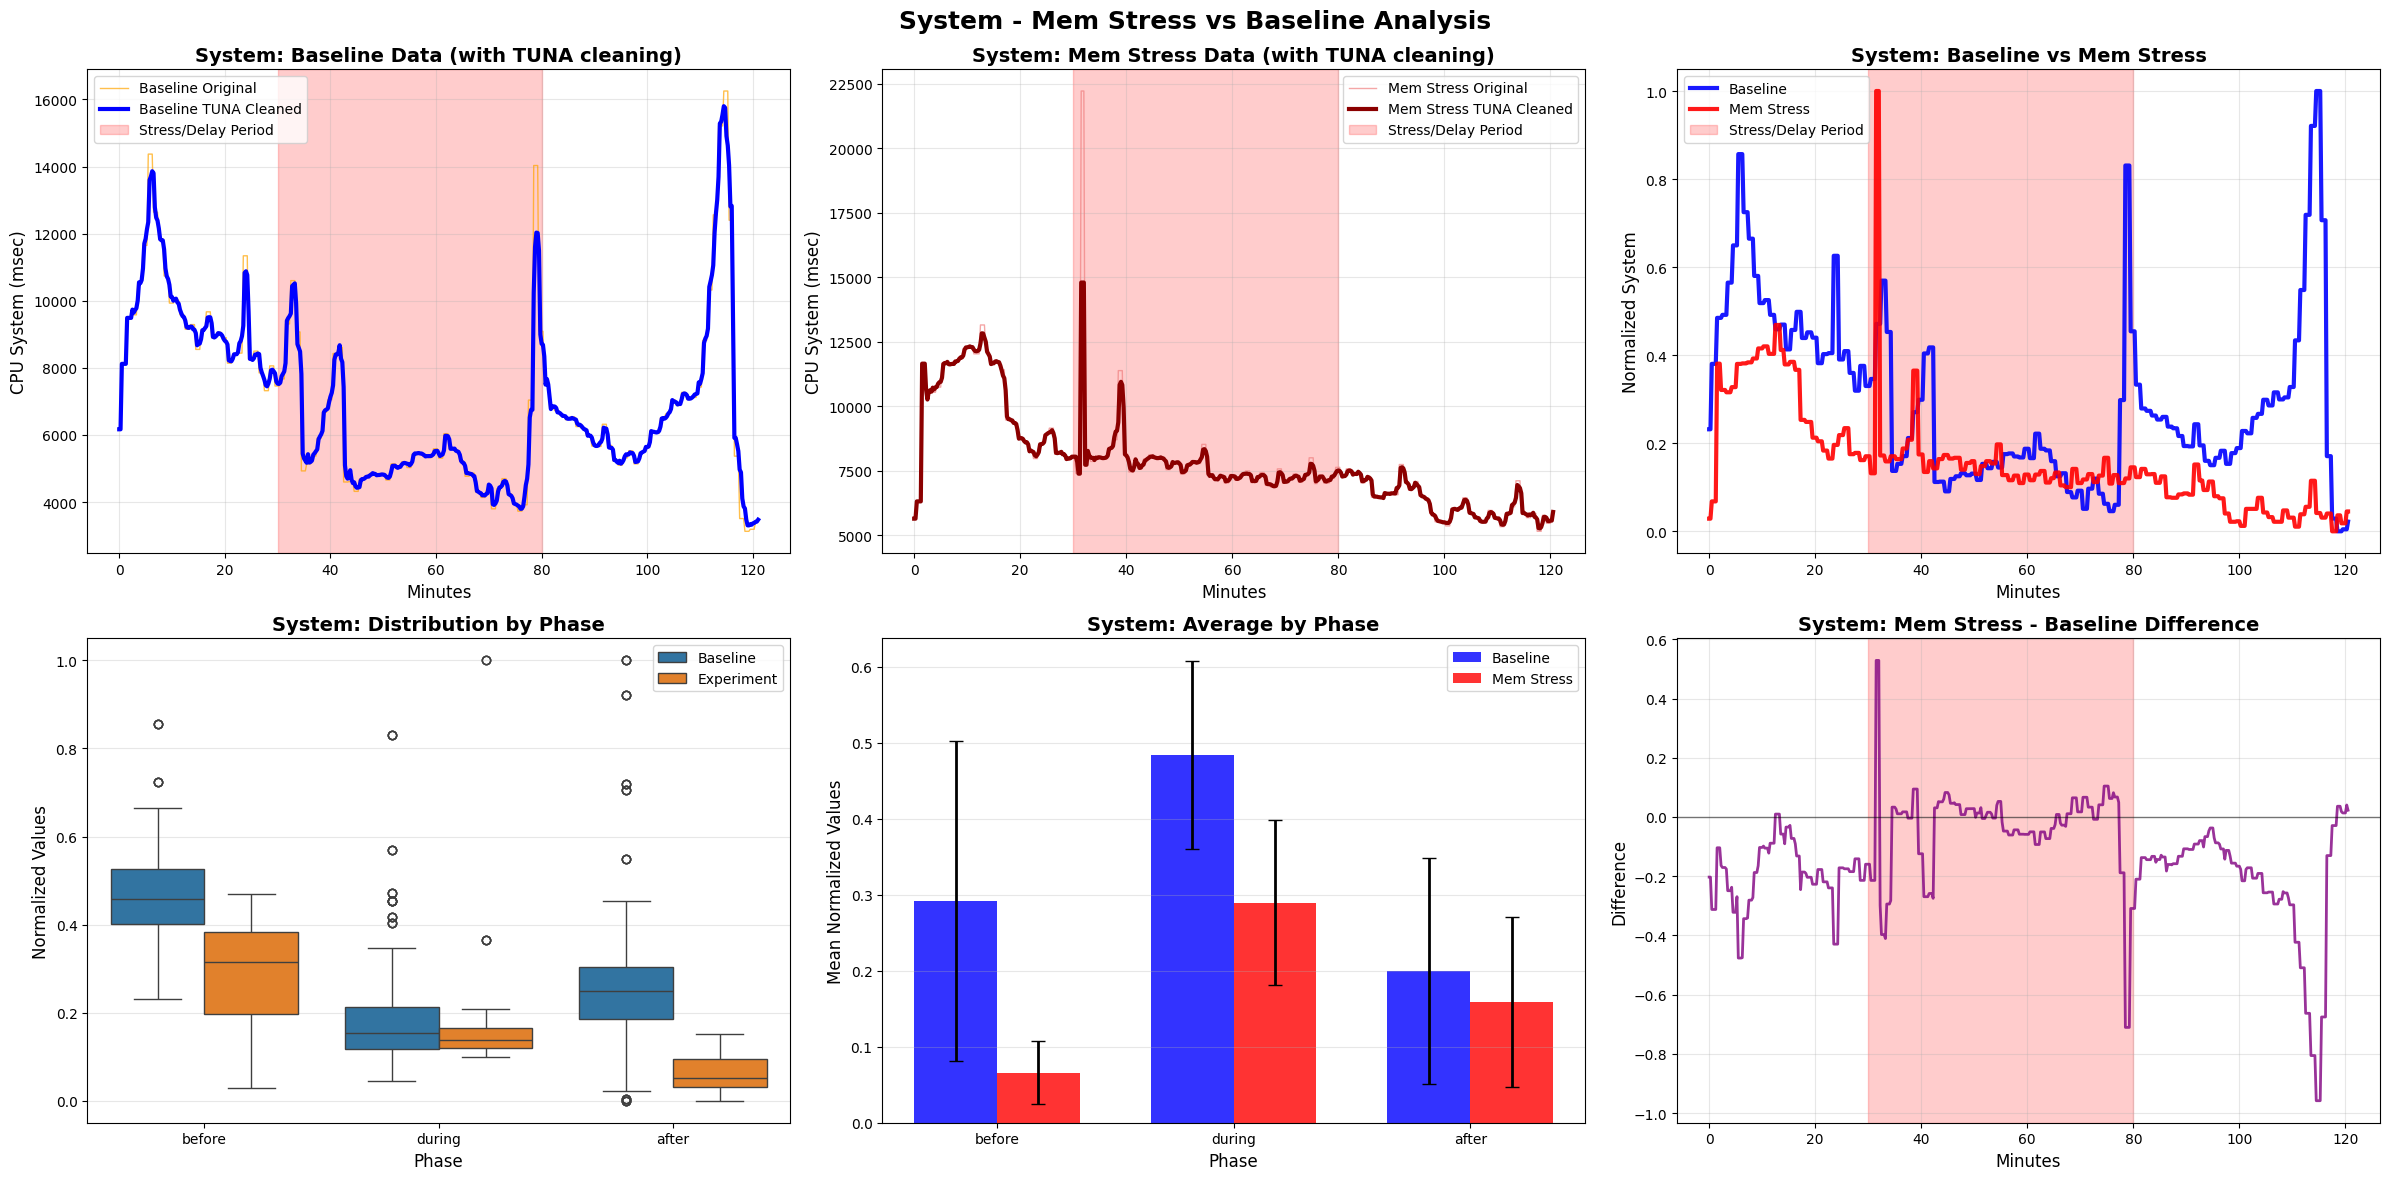


SYSTEM - MEM STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2917  0.2104  0.0000  1.0000
before  0.4837  0.1235  0.2317  0.8567
during  0.1997  0.1492  0.0457  0.8308

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0661  0.0411  0.0000  0.1517
before  0.2899  0.1089  0.0287  0.4687
during  0.1590  0.1113  0.1002  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 12.89, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  3.10, p=  0.0020 (SIGNIFICANT)
  AFTER   : t= 13.39, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :  -40.07% (DECREASE)
  DURING  :  -20.40% (DECREASE)
  AFTER   :  -77.35% (DECREASE)

📊 Comparing net_loss vs baseline for System


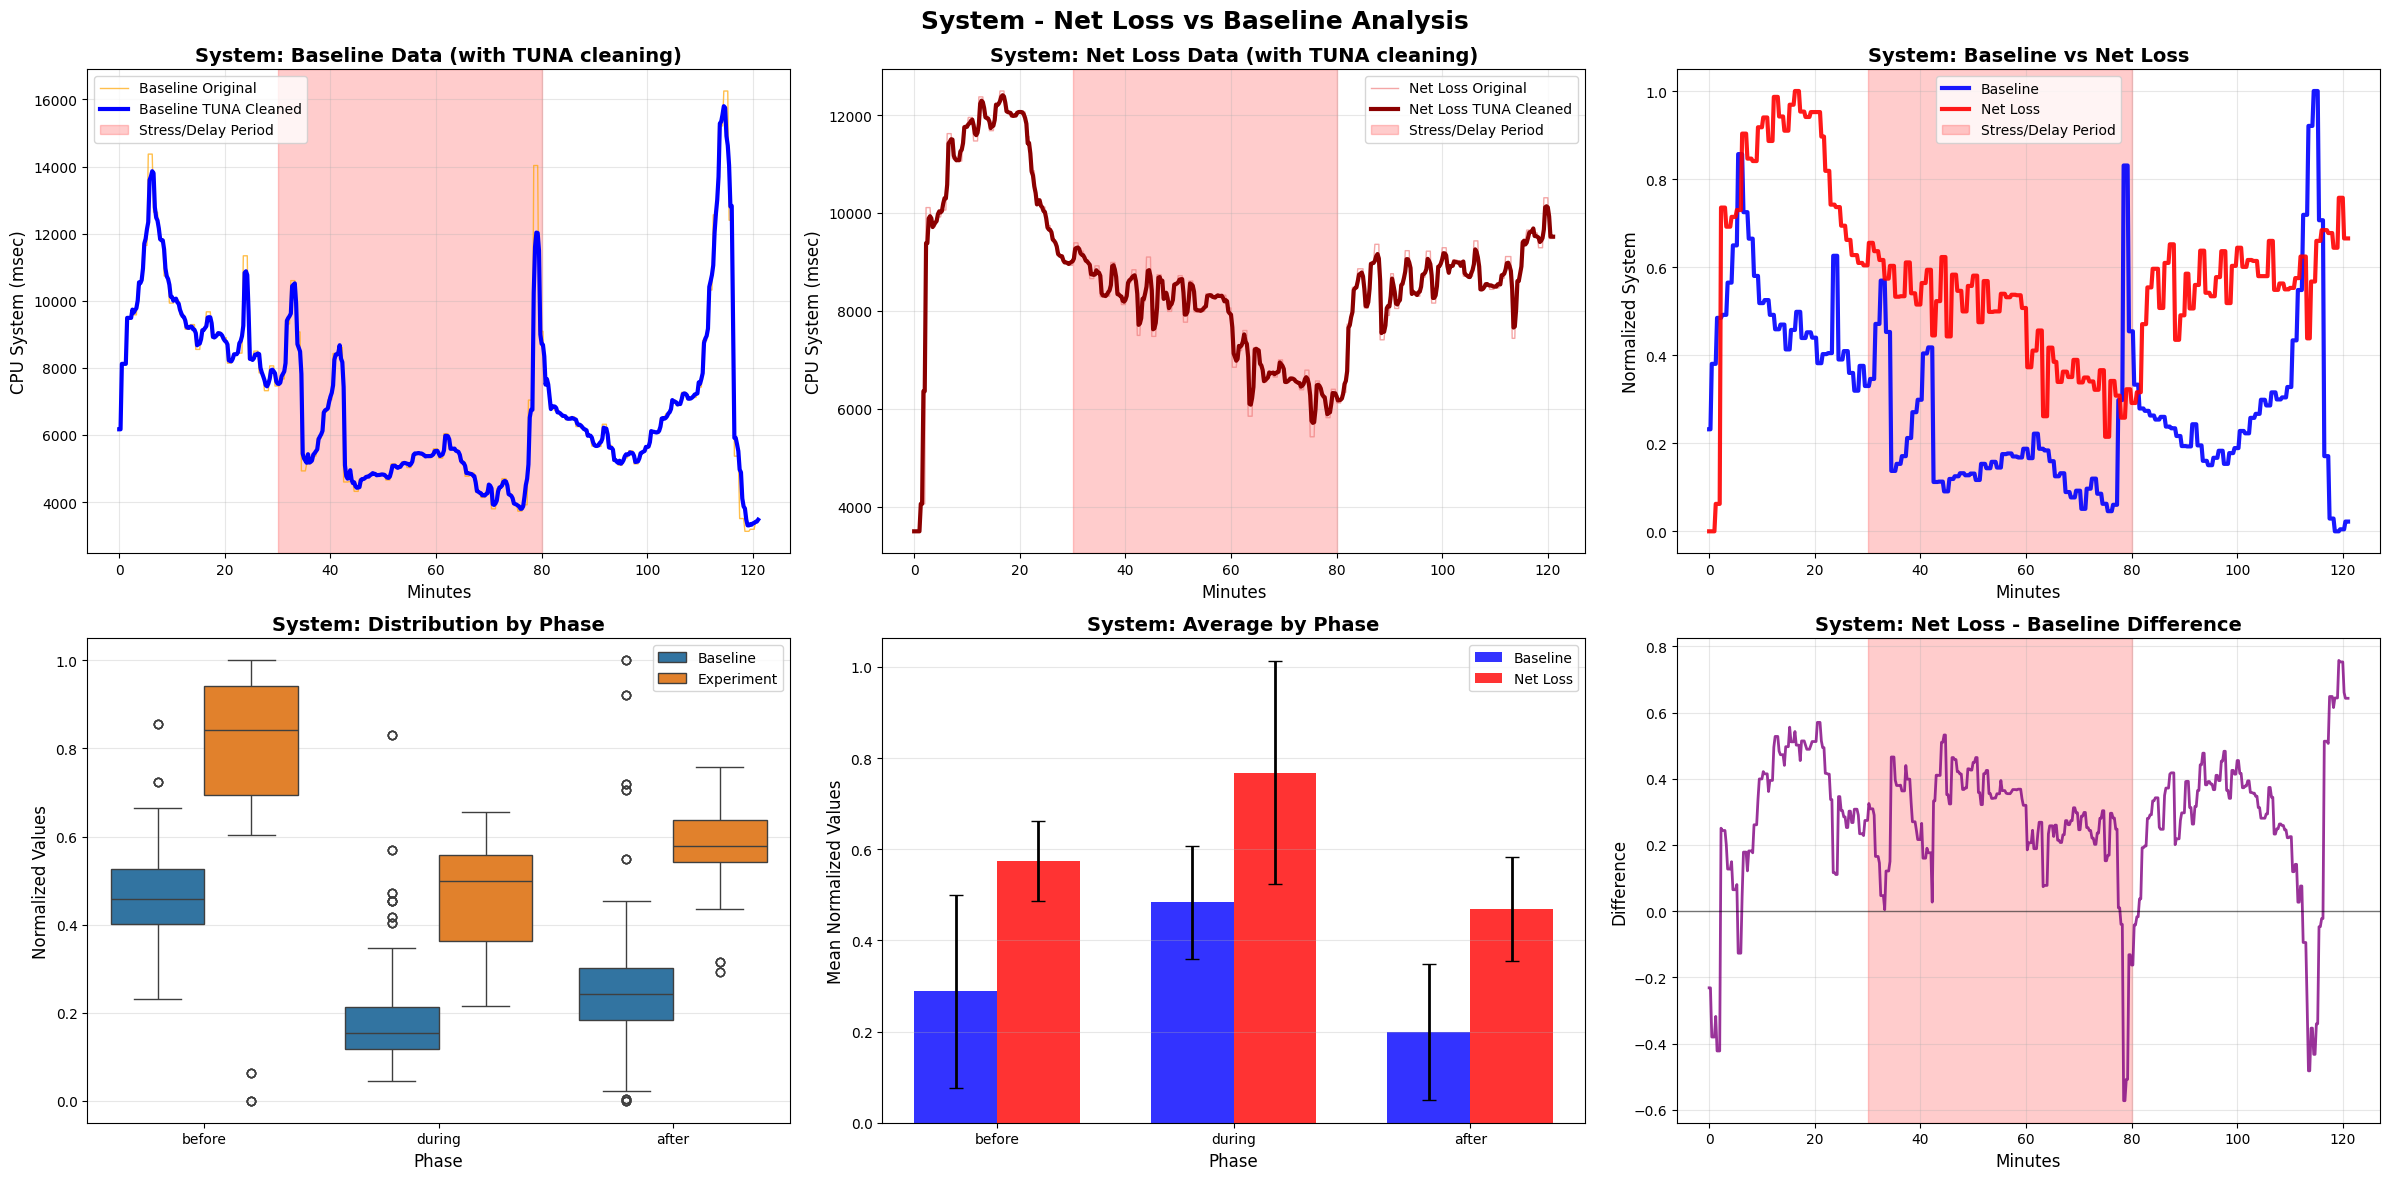


SYSTEM - NET LOSS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2884  0.2112  0.0000  1.0000
before  0.4837  0.1235  0.2317  0.8567
during  0.1997  0.1492  0.0457  0.8308

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.5748  0.0874  0.2914  0.7575
before  0.7682  0.2439  0.0000  1.0000
during  0.4679  0.1141  0.2147  0.6552

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-11.40, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-20.25, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=-16.05, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  +58.83% (INCREASE)
  DURING  : +134.31% (INCREASE)
  AFTER   :  +99.33% (INCREASE)

🔍 Analyzing User...

📊 Comparing cpu_stress vs baseline for User


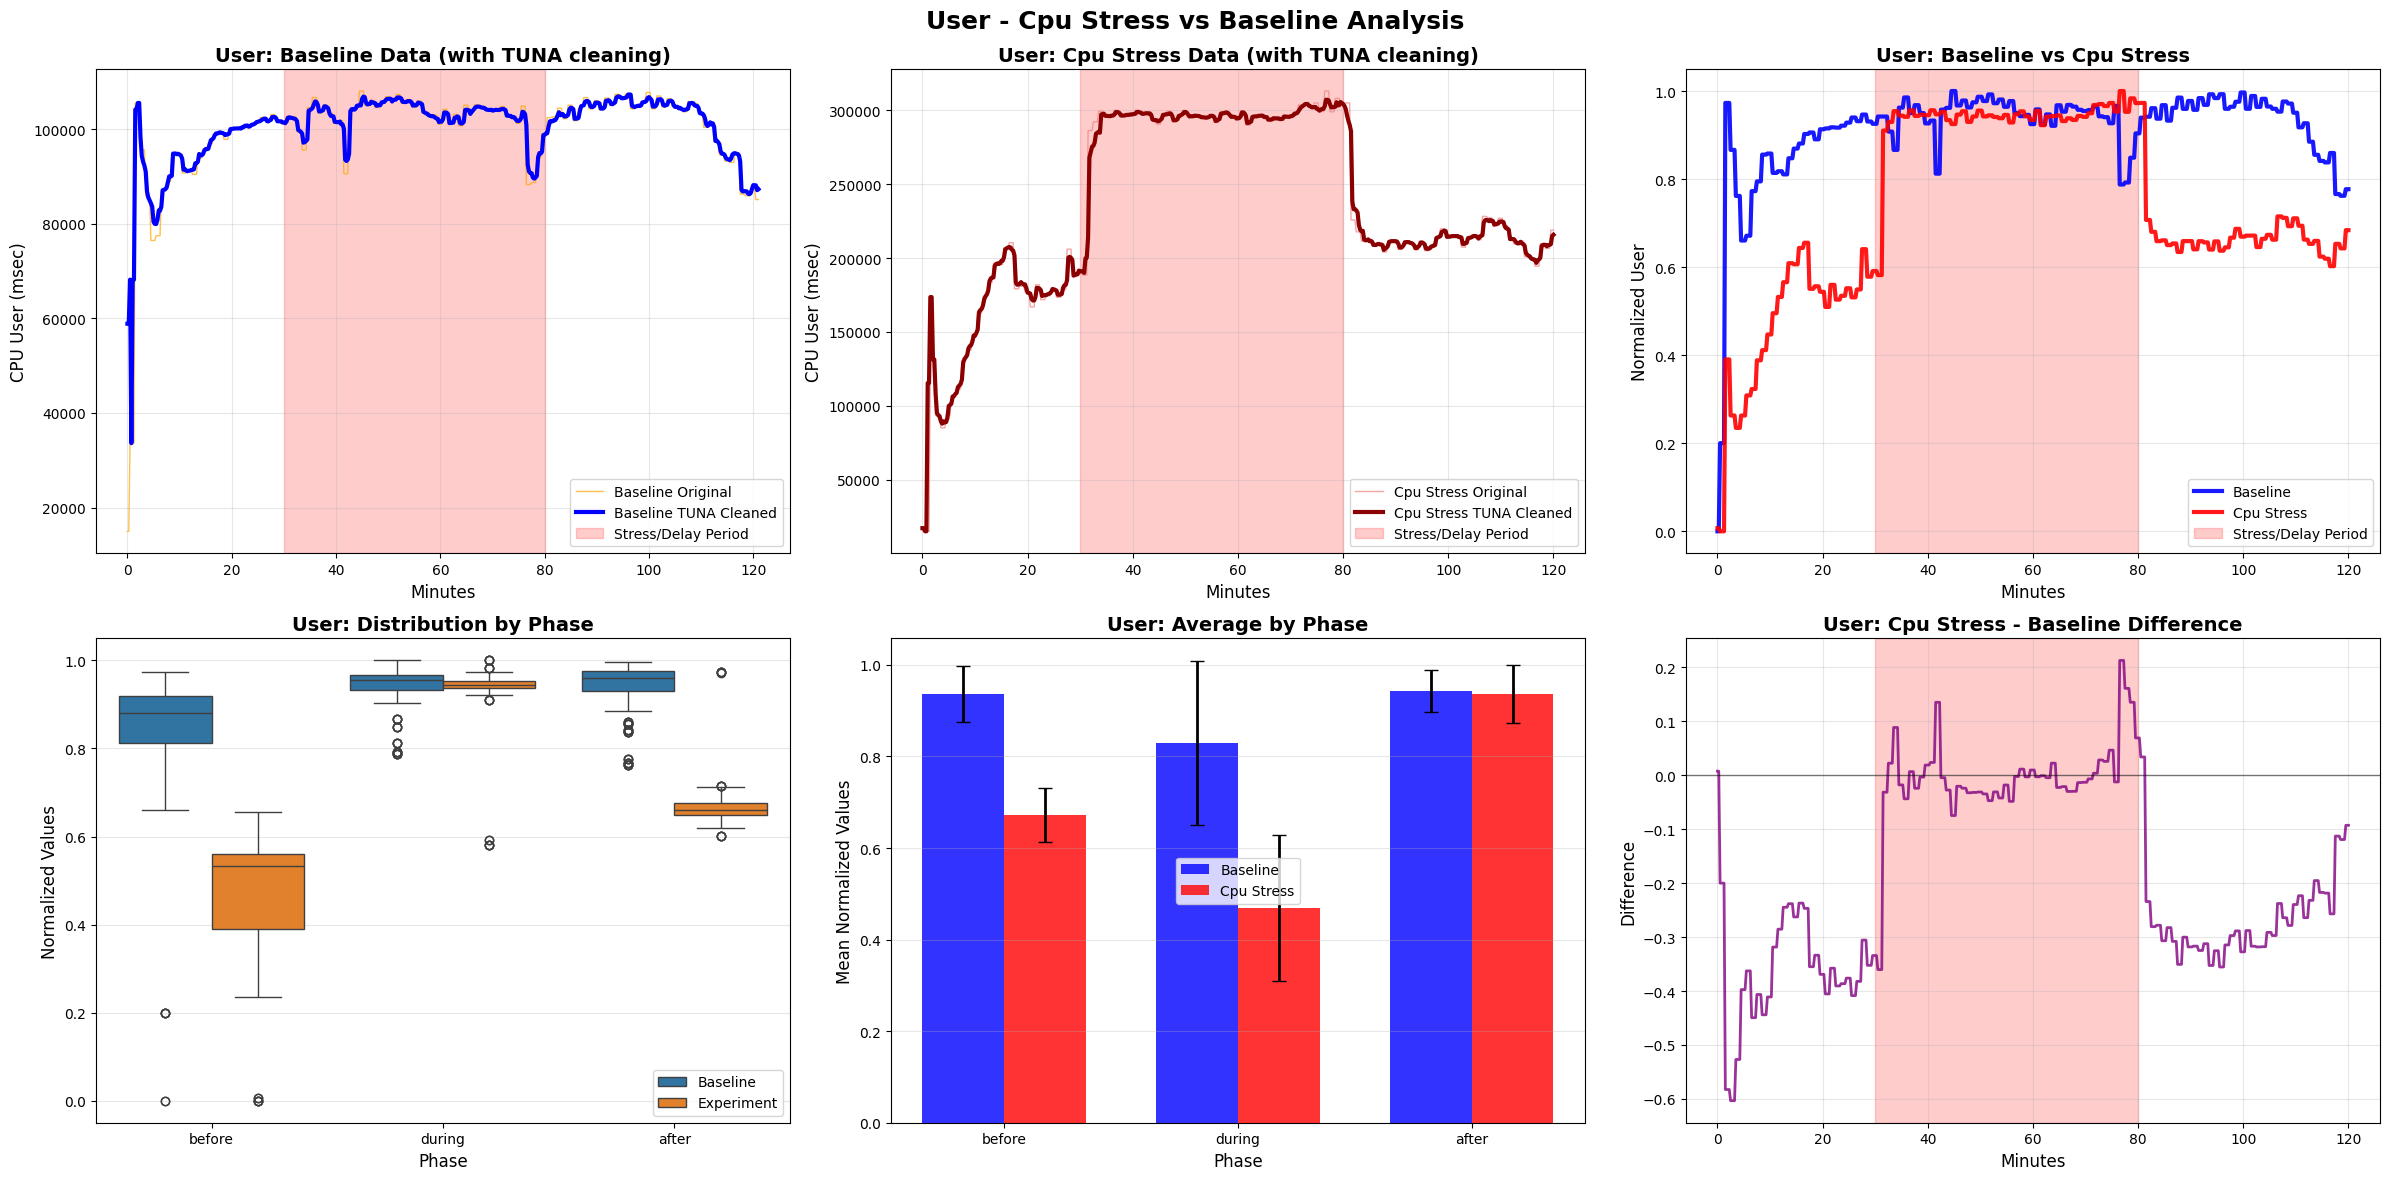


USER - CPU STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9367  0.0614  0.7620  0.9967
before  0.8292  0.1782  0.0000  0.9729
during  0.9422  0.0461  0.7877  1.0000

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6720  0.0595  0.6022  0.9730
before  0.4690  0.1589  0.0000  0.6554
during  0.9363  0.0637  0.5818  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 16.52, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  1.05, p=  0.2938 (NOT SIGNIFICANT)
  AFTER   : t= 39.16, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  -43.44% (DECREASE)
  DURING  :   -0.62% (DECREASE)
  AFTER   :  -28.26% (DECREASE)

📊 Comparing delay vs baseline for User


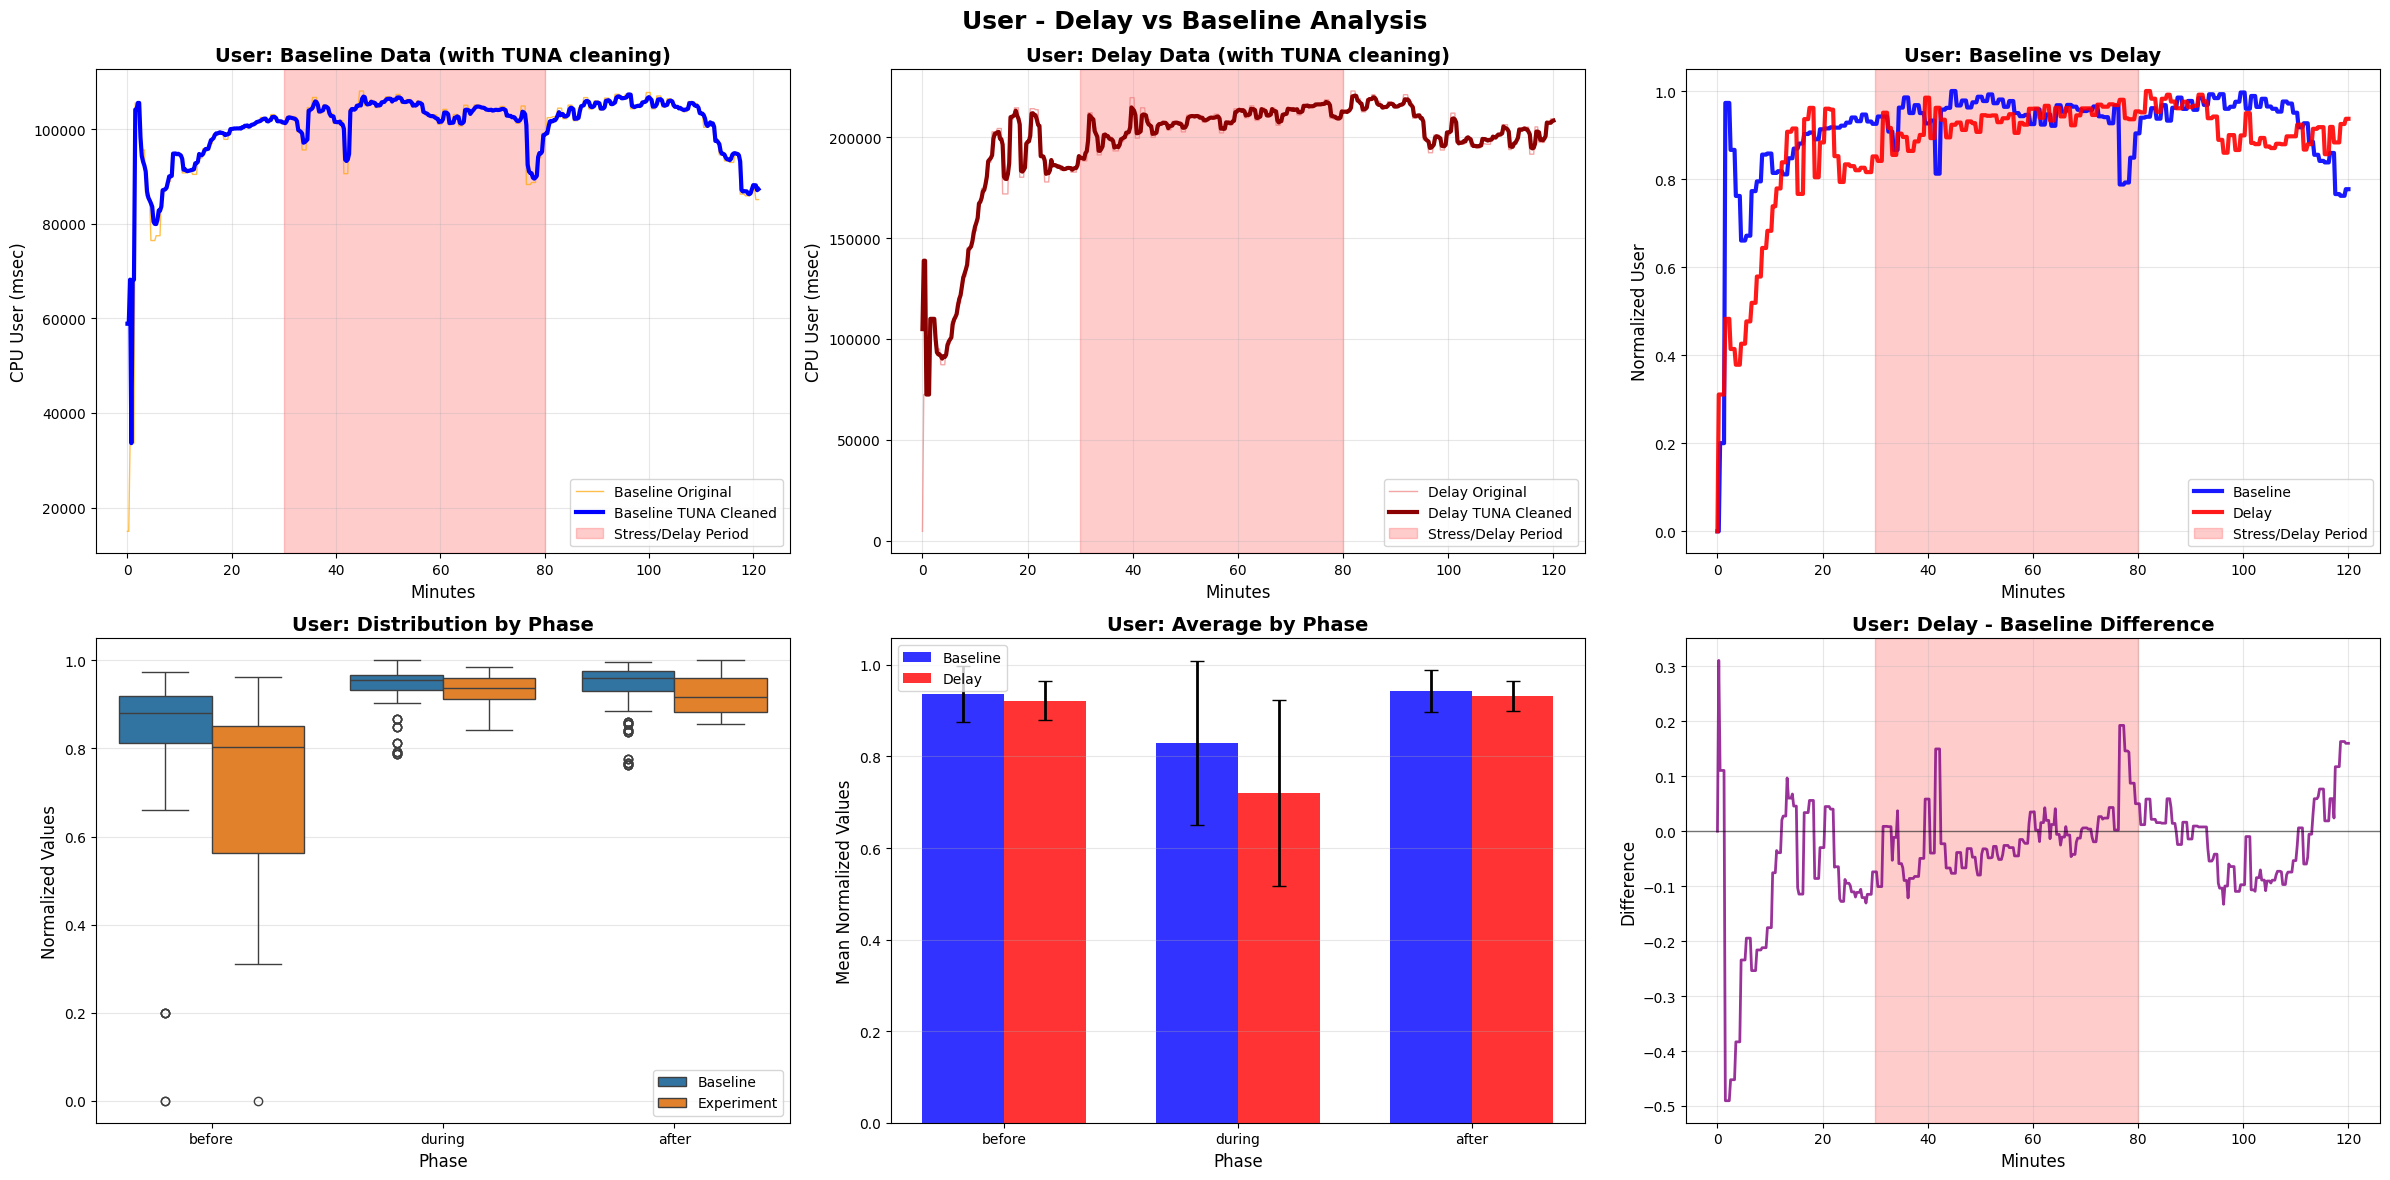


USER - DELAY VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9367  0.0614  0.7620  0.9967
before  0.8292  0.1782  0.0000  0.9729
during  0.9422  0.0461  0.7877  1.0000

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9220  0.0427  0.8565  1.0000
before  0.7201  0.2042  0.0000  0.9617
during  0.9321  0.0326  0.8413  0.9849

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  4.41, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  2.53, p=  0.0116 (SIGNIFICANT)
  AFTER   : t=  2.49, p=  0.0134 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :  -13.15% (DECREASE)
  DURING  :   -1.07% (DECREASE)
  AFTER   :   -1.57% (DECREASE)

📊 Comparing mem_stress vs baseline for User


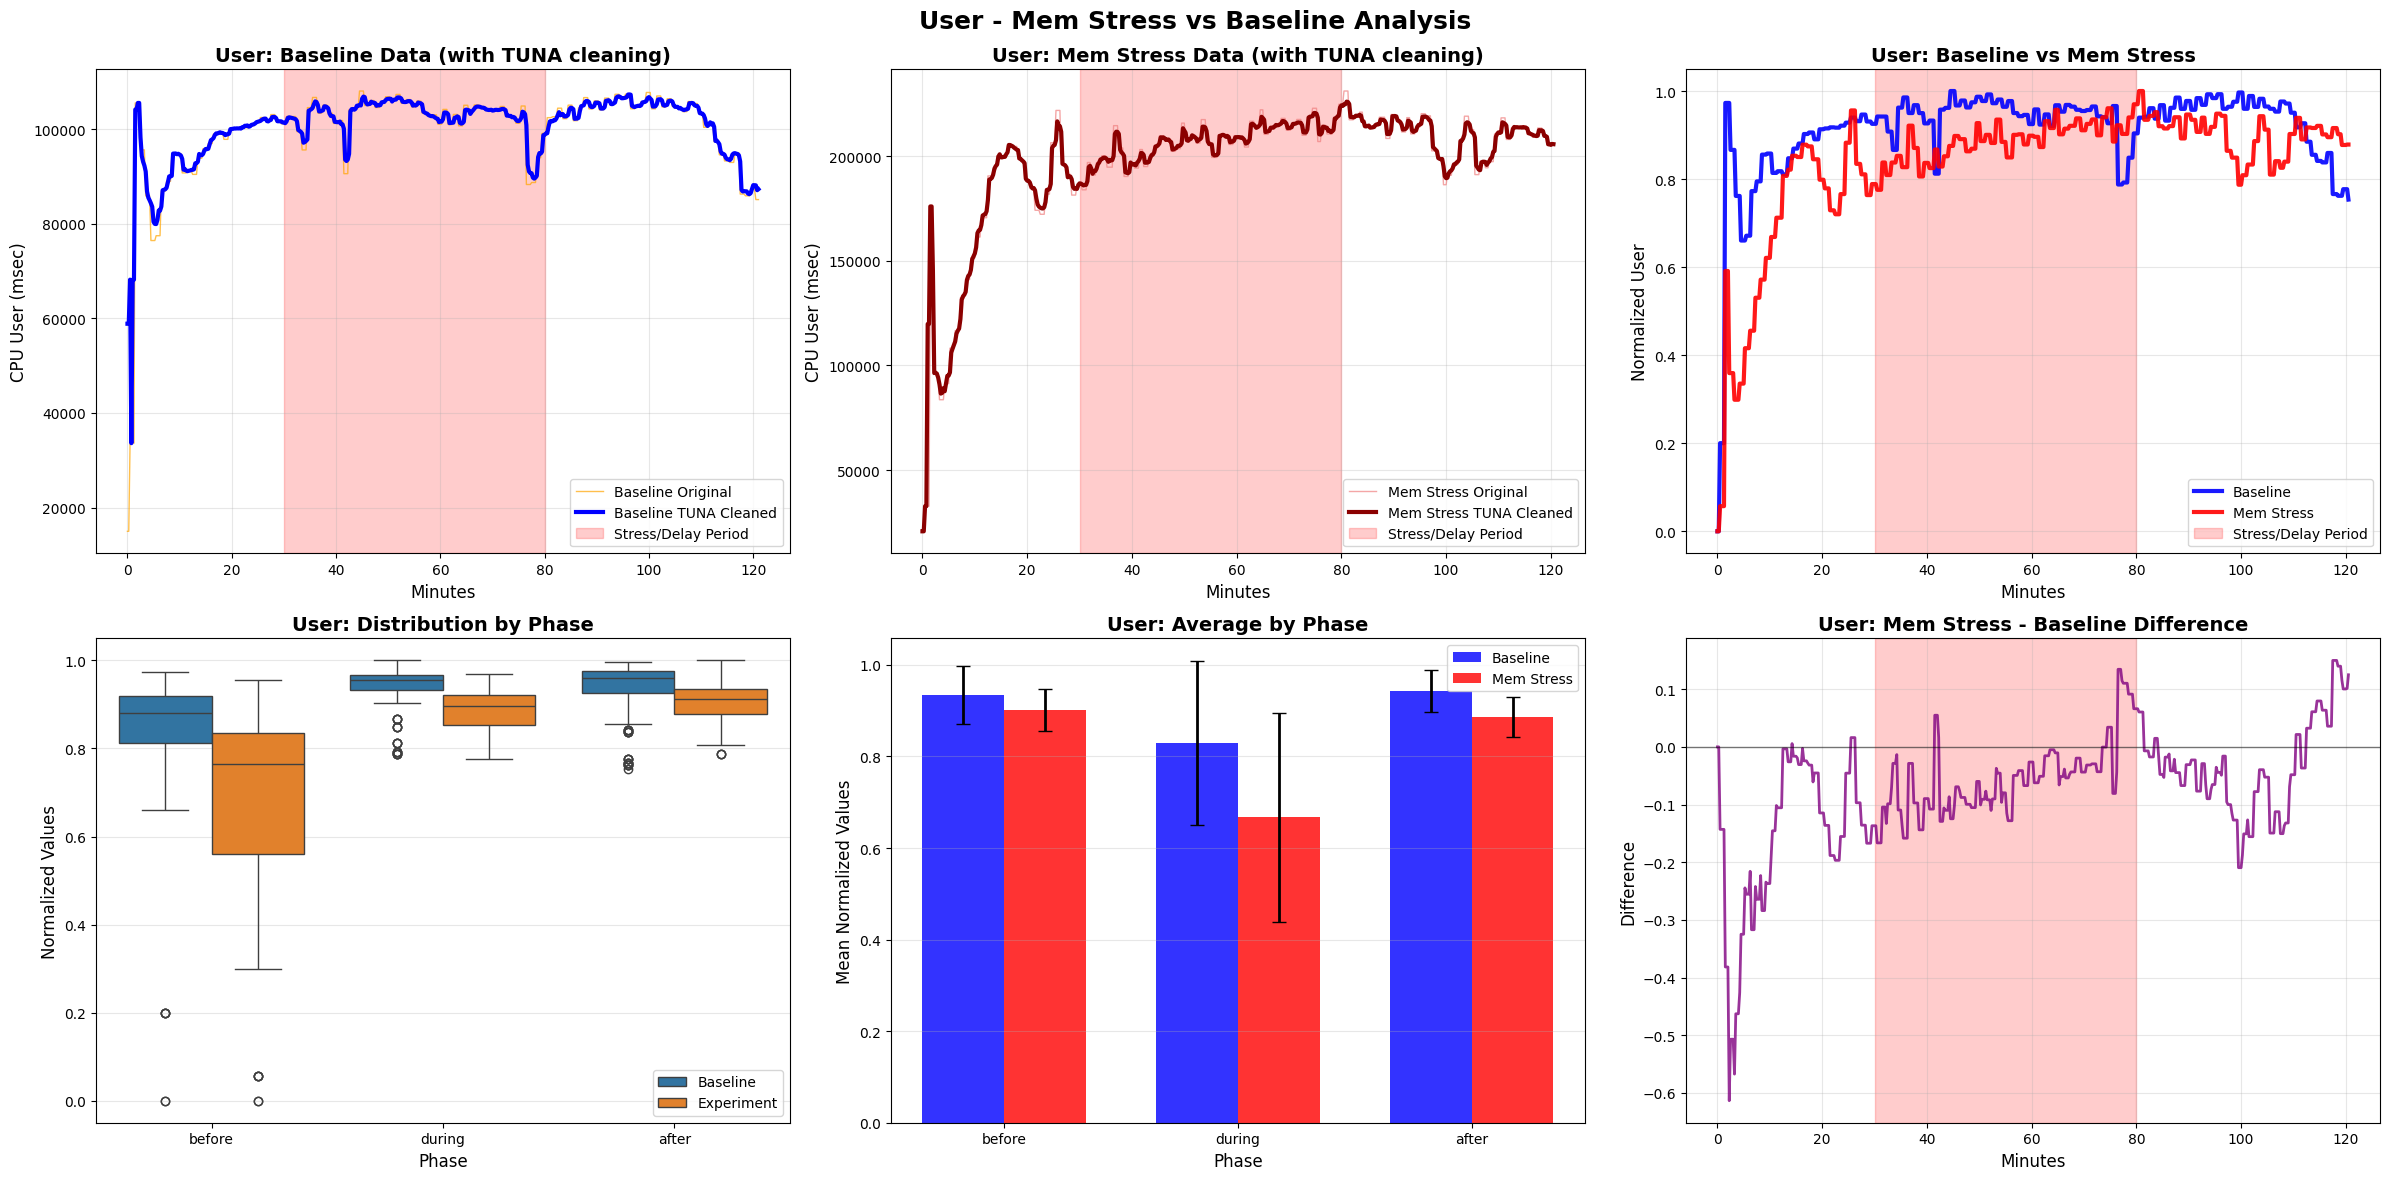


USER - MEM STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9346  0.0639  0.7534  0.9967
before  0.8292  0.1782  0.0000  0.9729
during  0.9422  0.0461  0.7877  1.0000

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9012  0.0451  0.7872  1.0000
before  0.6672  0.2285  0.0000  0.9559
during  0.8867  0.0434  0.7756  0.9699

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  6.12, p=  0.0000 (SIGNIFICANT)
  DURING  : t= 12.42, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  5.44, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :  -19.53% (DECREASE)
  DURING  :   -5.88% (DECREASE)
  AFTER   :   -3.58% (DECREASE)

📊 Comparing net_loss vs baseline for User


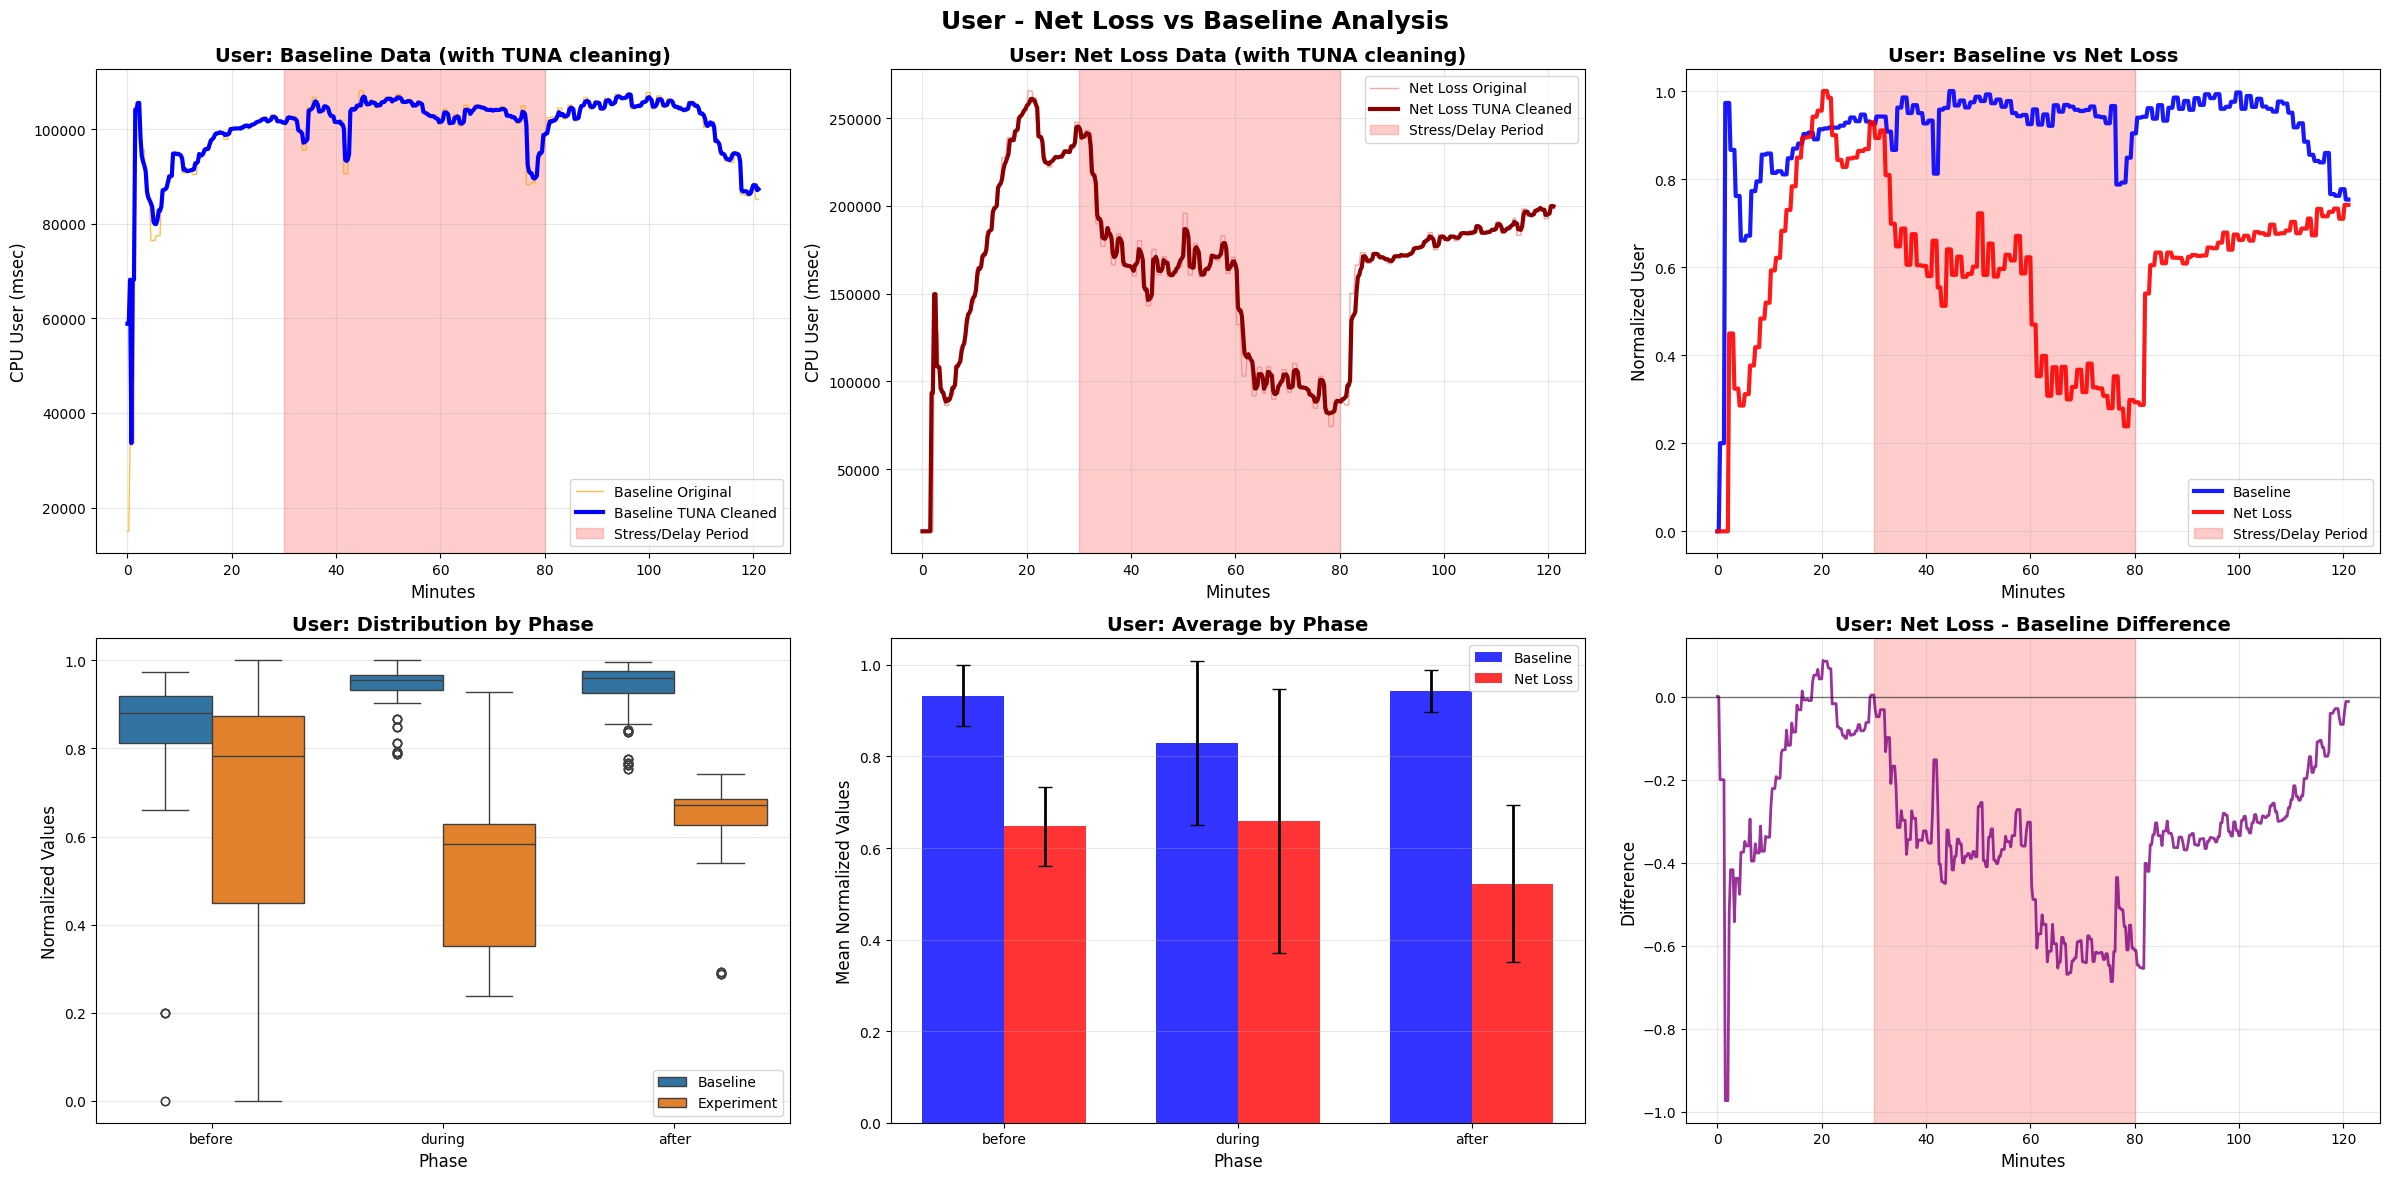


USER - NET LOSS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9324  0.0665  0.7534  0.9967
before  0.8292  0.1782  0.0000  0.9729
during  0.9422  0.0461  0.7877  1.0000

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6476  0.0863  0.2871  0.7414
before  0.6587  0.2877  0.0000  1.0000
during  0.5219  0.1720  0.2384  0.9290

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  5.52, p=  0.0000 (SIGNIFICANT)
  DURING  : t= 33.46, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 33.47, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  -20.55% (DECREASE)
  DURING  :  -44.60% (DECREASE)
  AFTER   :  -30.54% (DECREASE)

🔍 Analyzing Utilization...

📊 Comparing cpu_stress vs baseline for Utilization


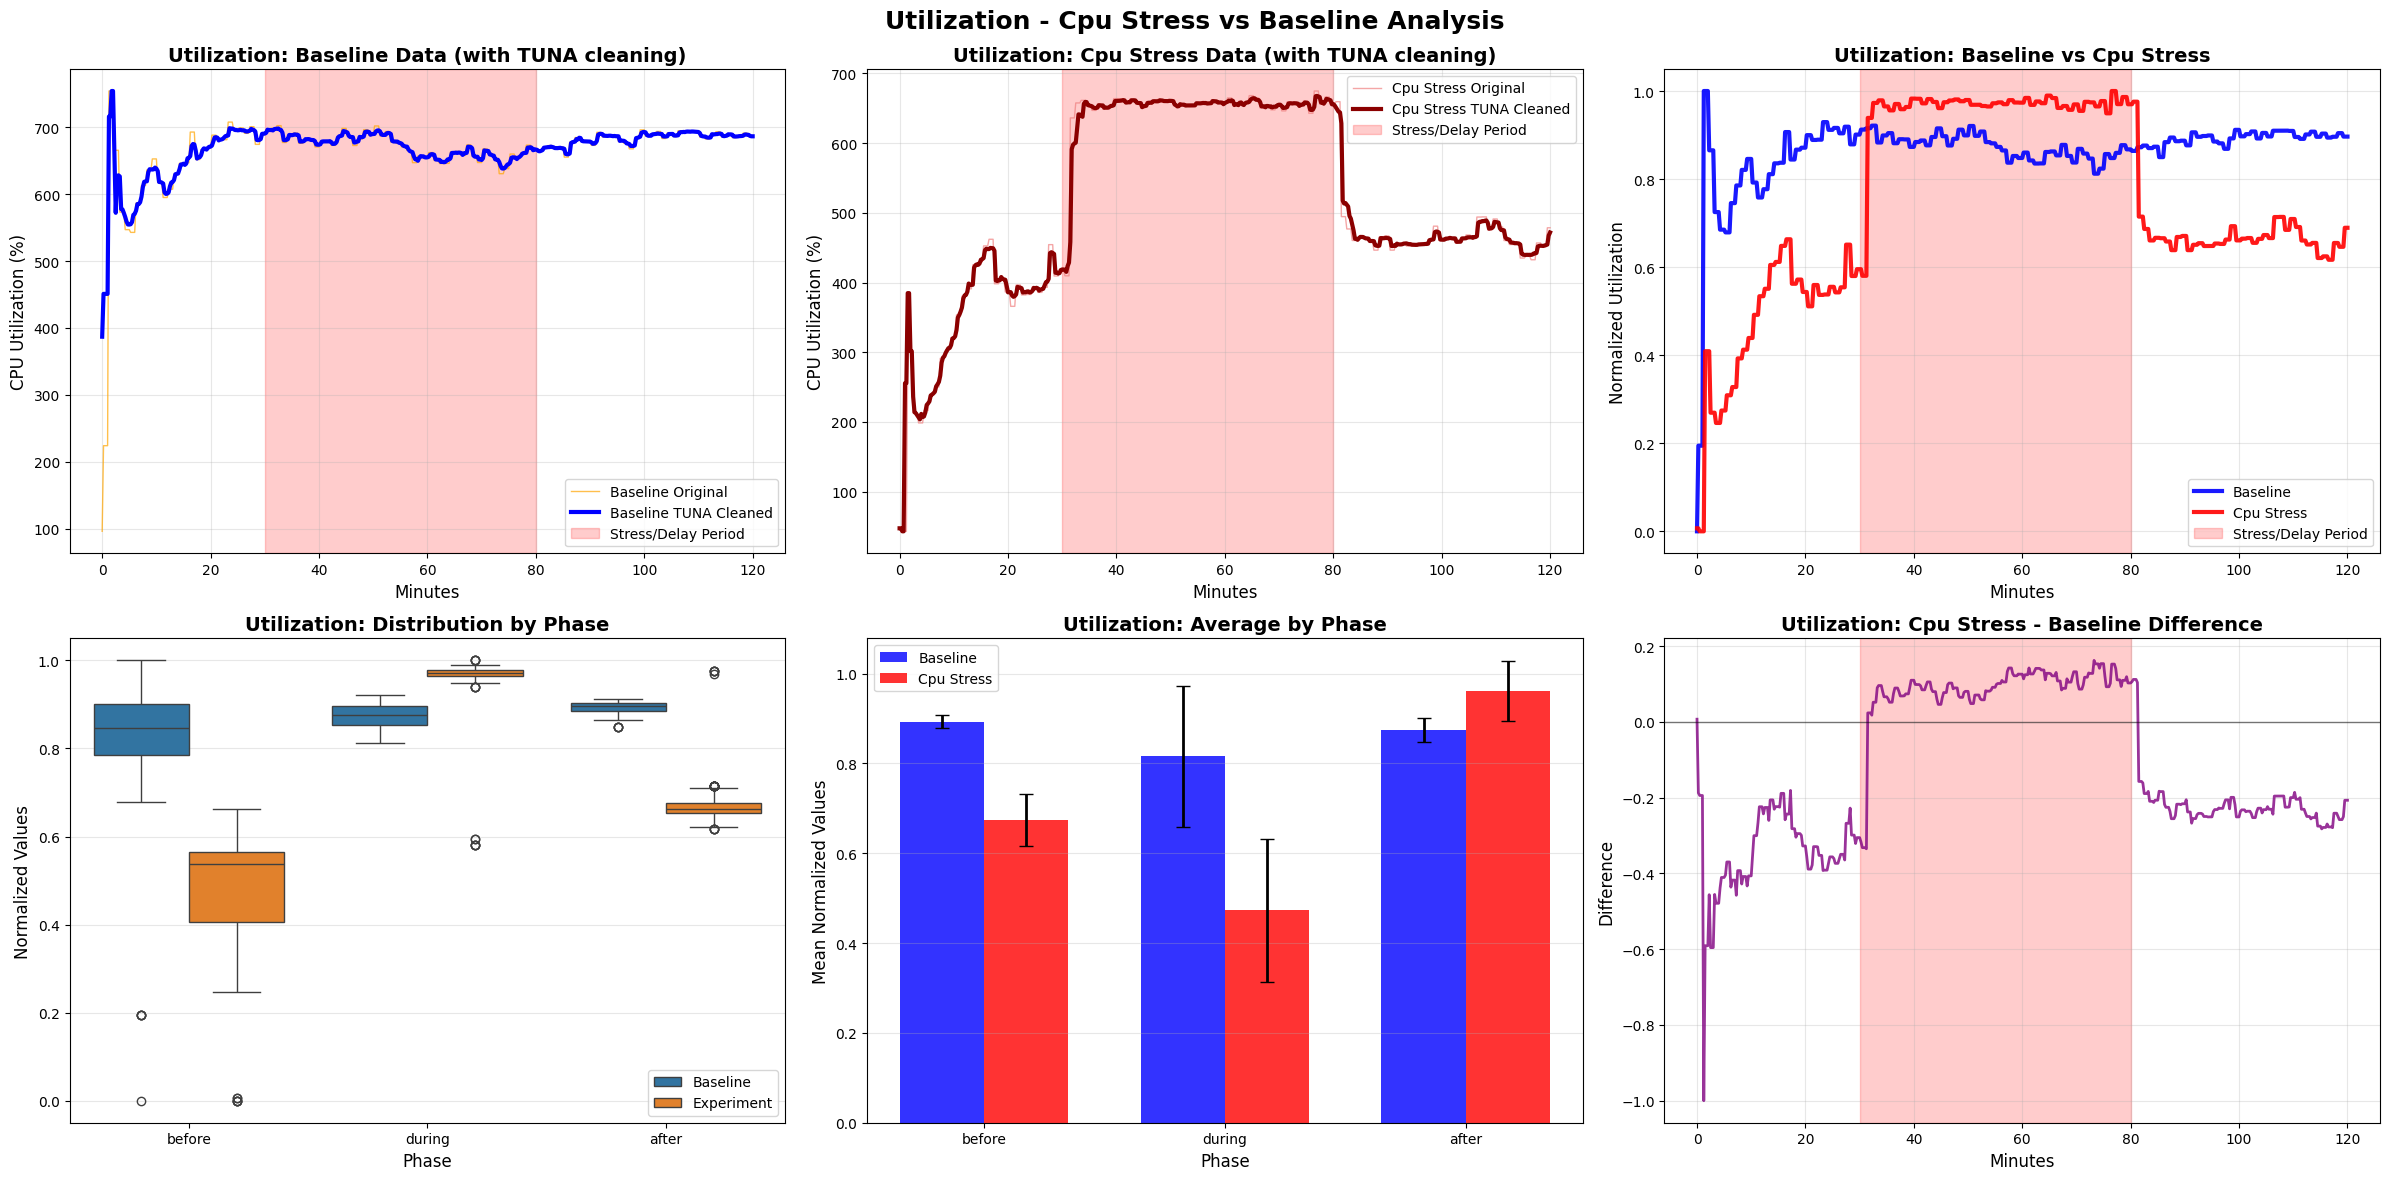


UTILIZATION - CPU STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8925  0.0145  0.8499  0.9118
before  0.8153  0.1576  0.0000  1.0000
during  0.8744  0.0265  0.8122  0.9214

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6740  0.0590  0.6167  0.9758
before  0.4730  0.1588  0.0000  0.6633
during  0.9602  0.0667  0.5803  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 16.76, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-16.94, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 45.53, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  -41.98% (DECREASE)
  DURING  :   +9.82% (INCREASE)
  AFTER   :  -24.48% (DECREASE)

📊 Comparing delay vs baseline for Utilization


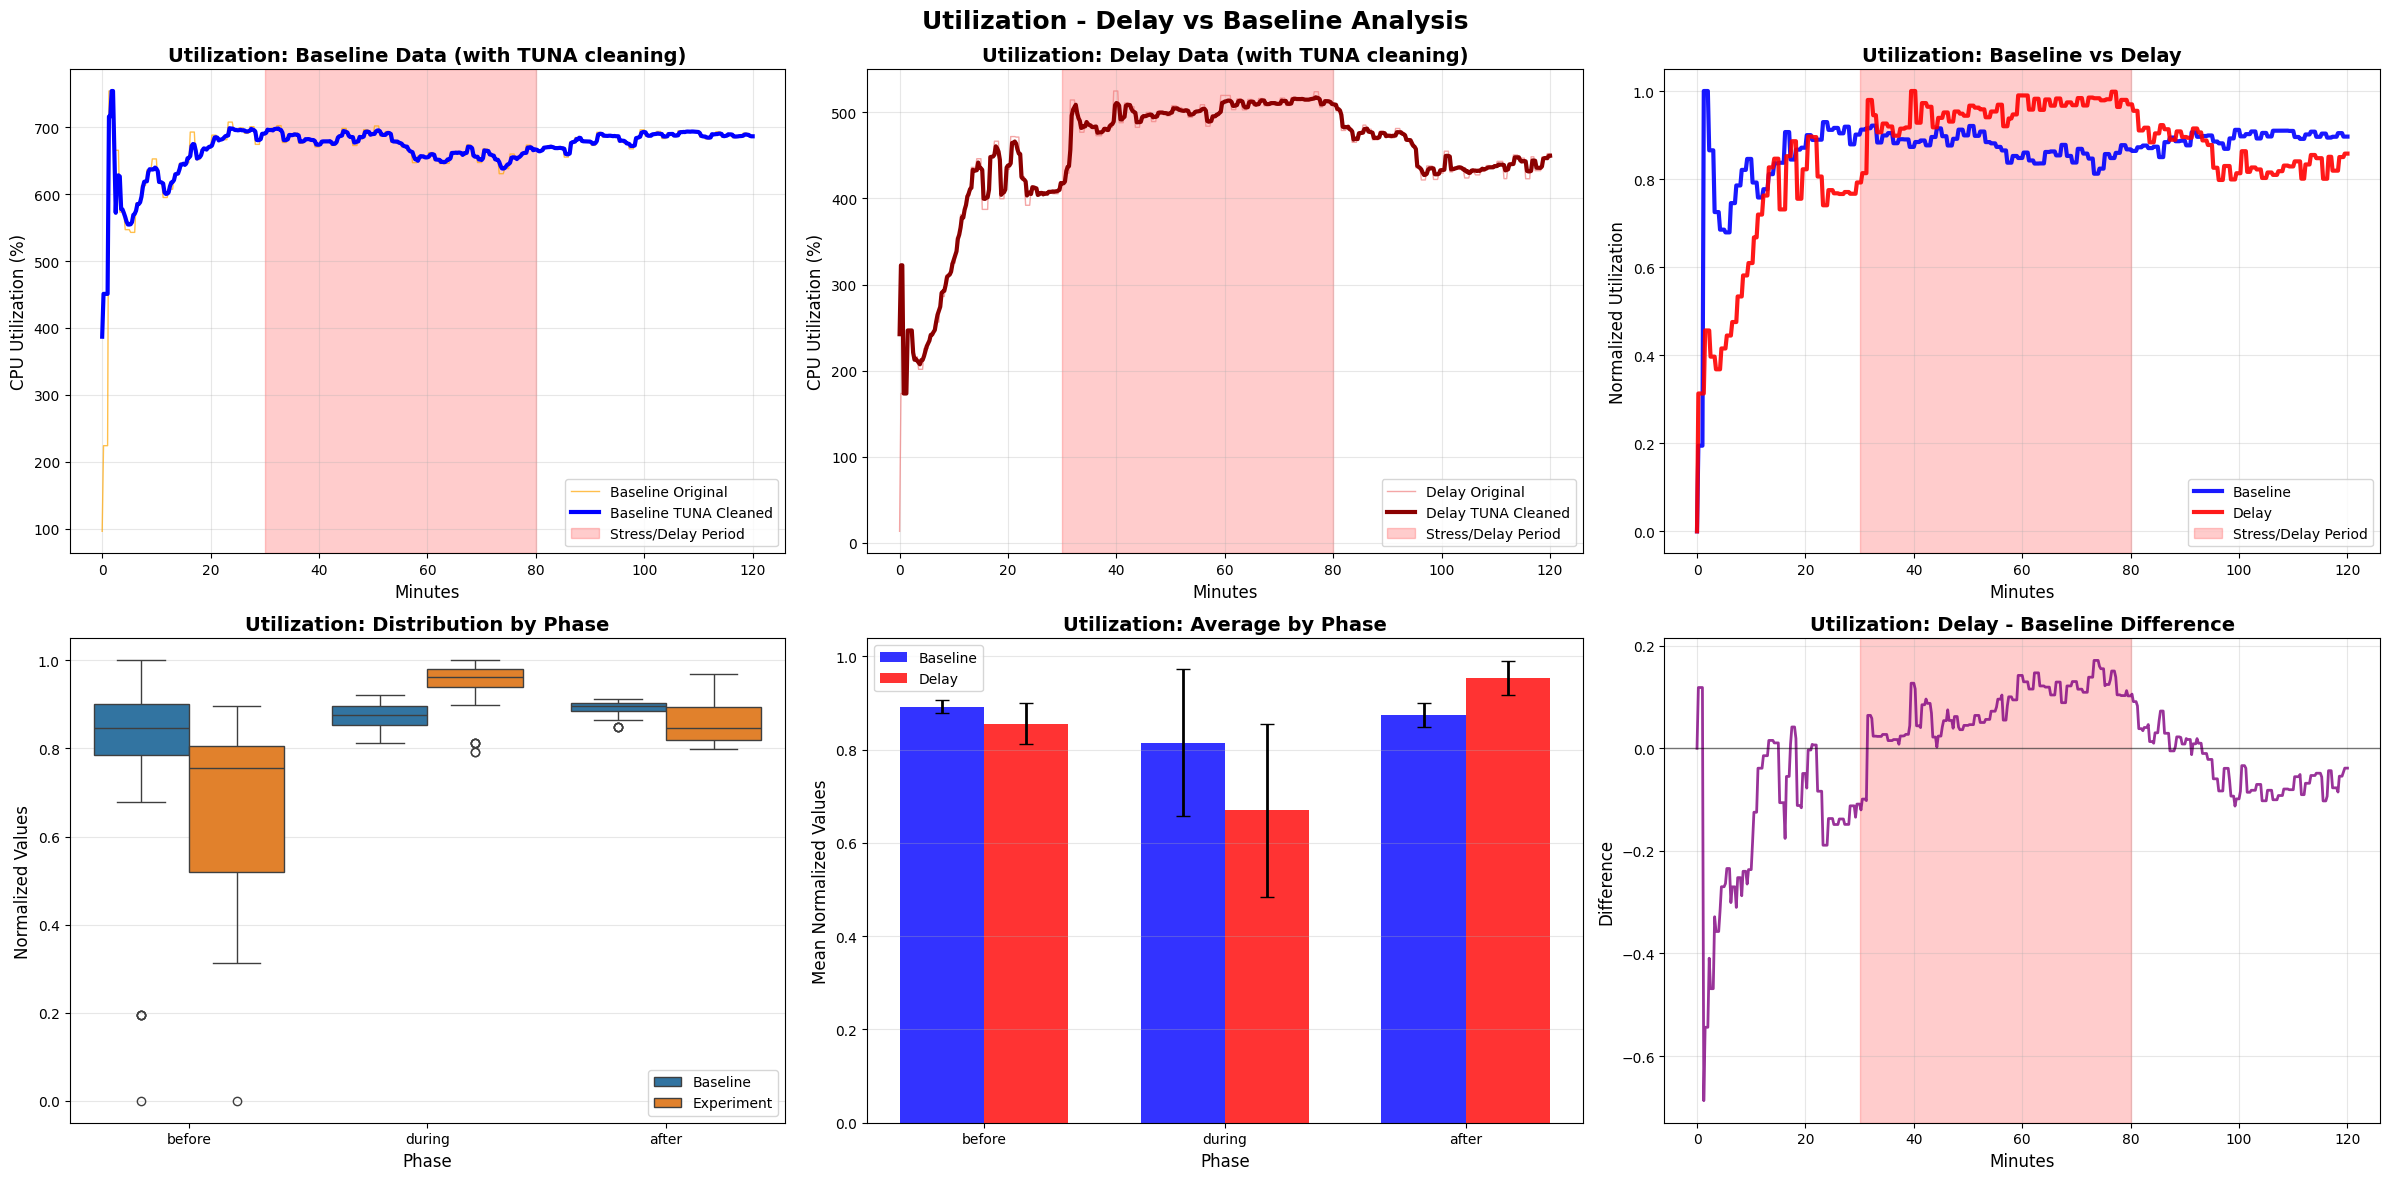


UTILIZATION - DELAY VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8925  0.0145  0.8499  0.9118
before  0.8153  0.1576  0.0000  1.0000
during  0.8744  0.0265  0.8122  0.9214

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8560  0.0432  0.7980  0.9697
before  0.6701  0.1852  0.0000  0.8965
during  0.9530  0.0362  0.7923  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  6.54, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-24.86, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 10.11, p=  0.0000 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :  -17.81% (DECREASE)
  DURING  :   +9.00% (INCREASE)
  AFTER   :   -4.08% (DECREASE)

📊 Comparing mem_stress vs baseline for Utilization


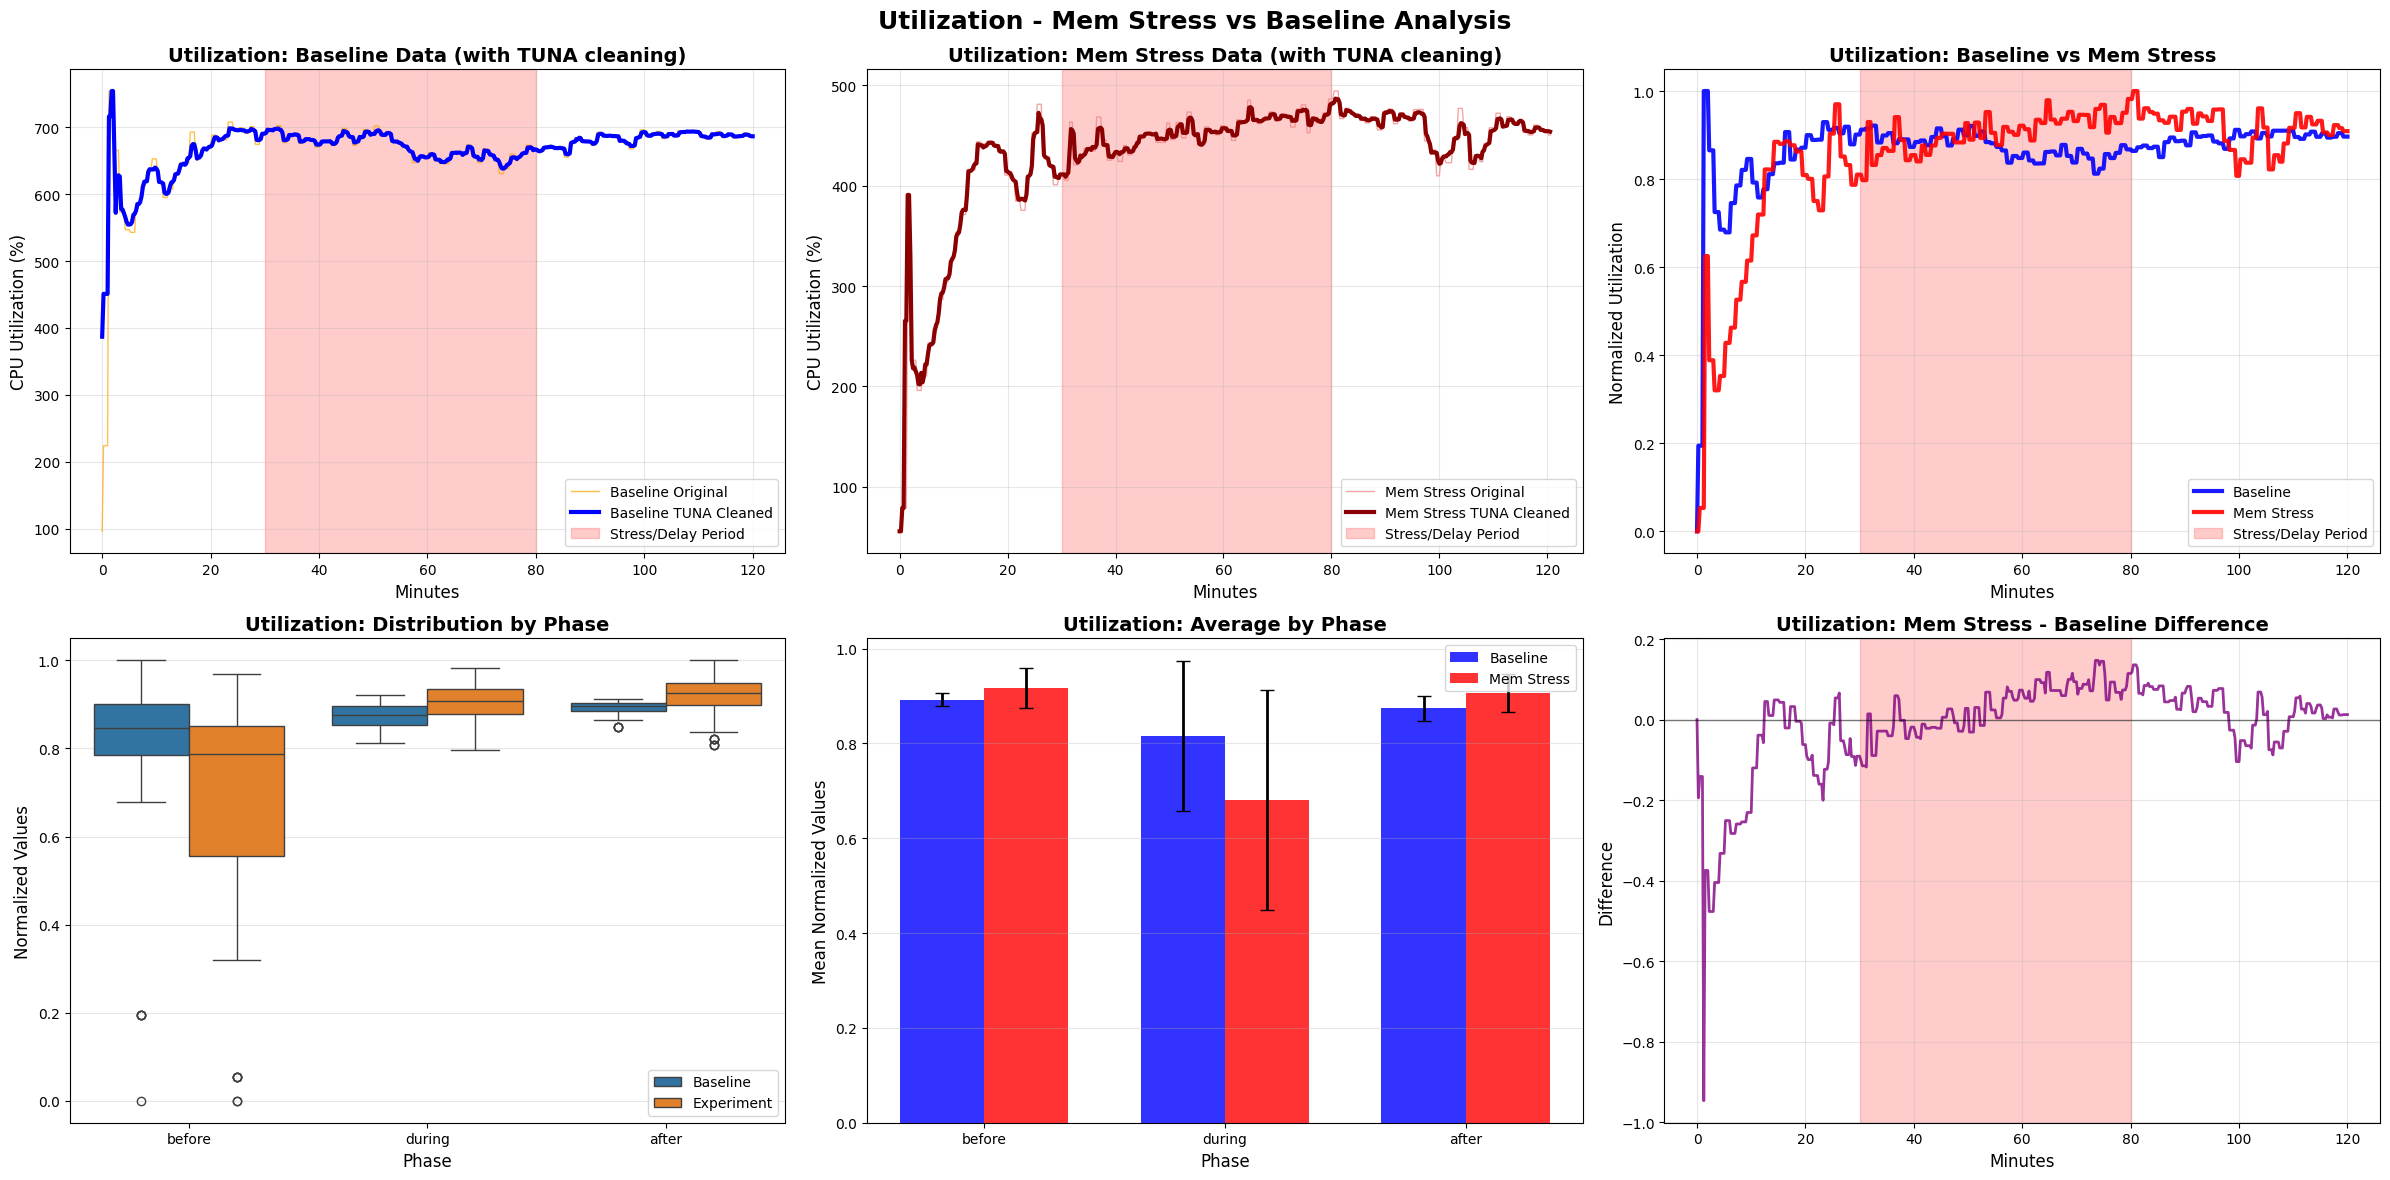


UTILIZATION - MEM STRESS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8925  0.0145  0.8499  0.9118
before  0.8153  0.1576  0.0000  1.0000
during  0.8744  0.0265  0.8122  0.9214

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9164  0.0424  0.8073  1.0000
before  0.6813  0.2320  0.0000  0.9699
during  0.9057  0.0400  0.7975  0.9820

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  5.23, p=  0.0000 (SIGNIFICANT)
  DURING  : t= -9.24, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -6.76, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :  -16.44% (DECREASE)
  DURING  :   +3.58% (INCREASE)
  AFTER   :   +2.68% (INCREASE)

📊 Comparing net_loss vs baseline for Utilization


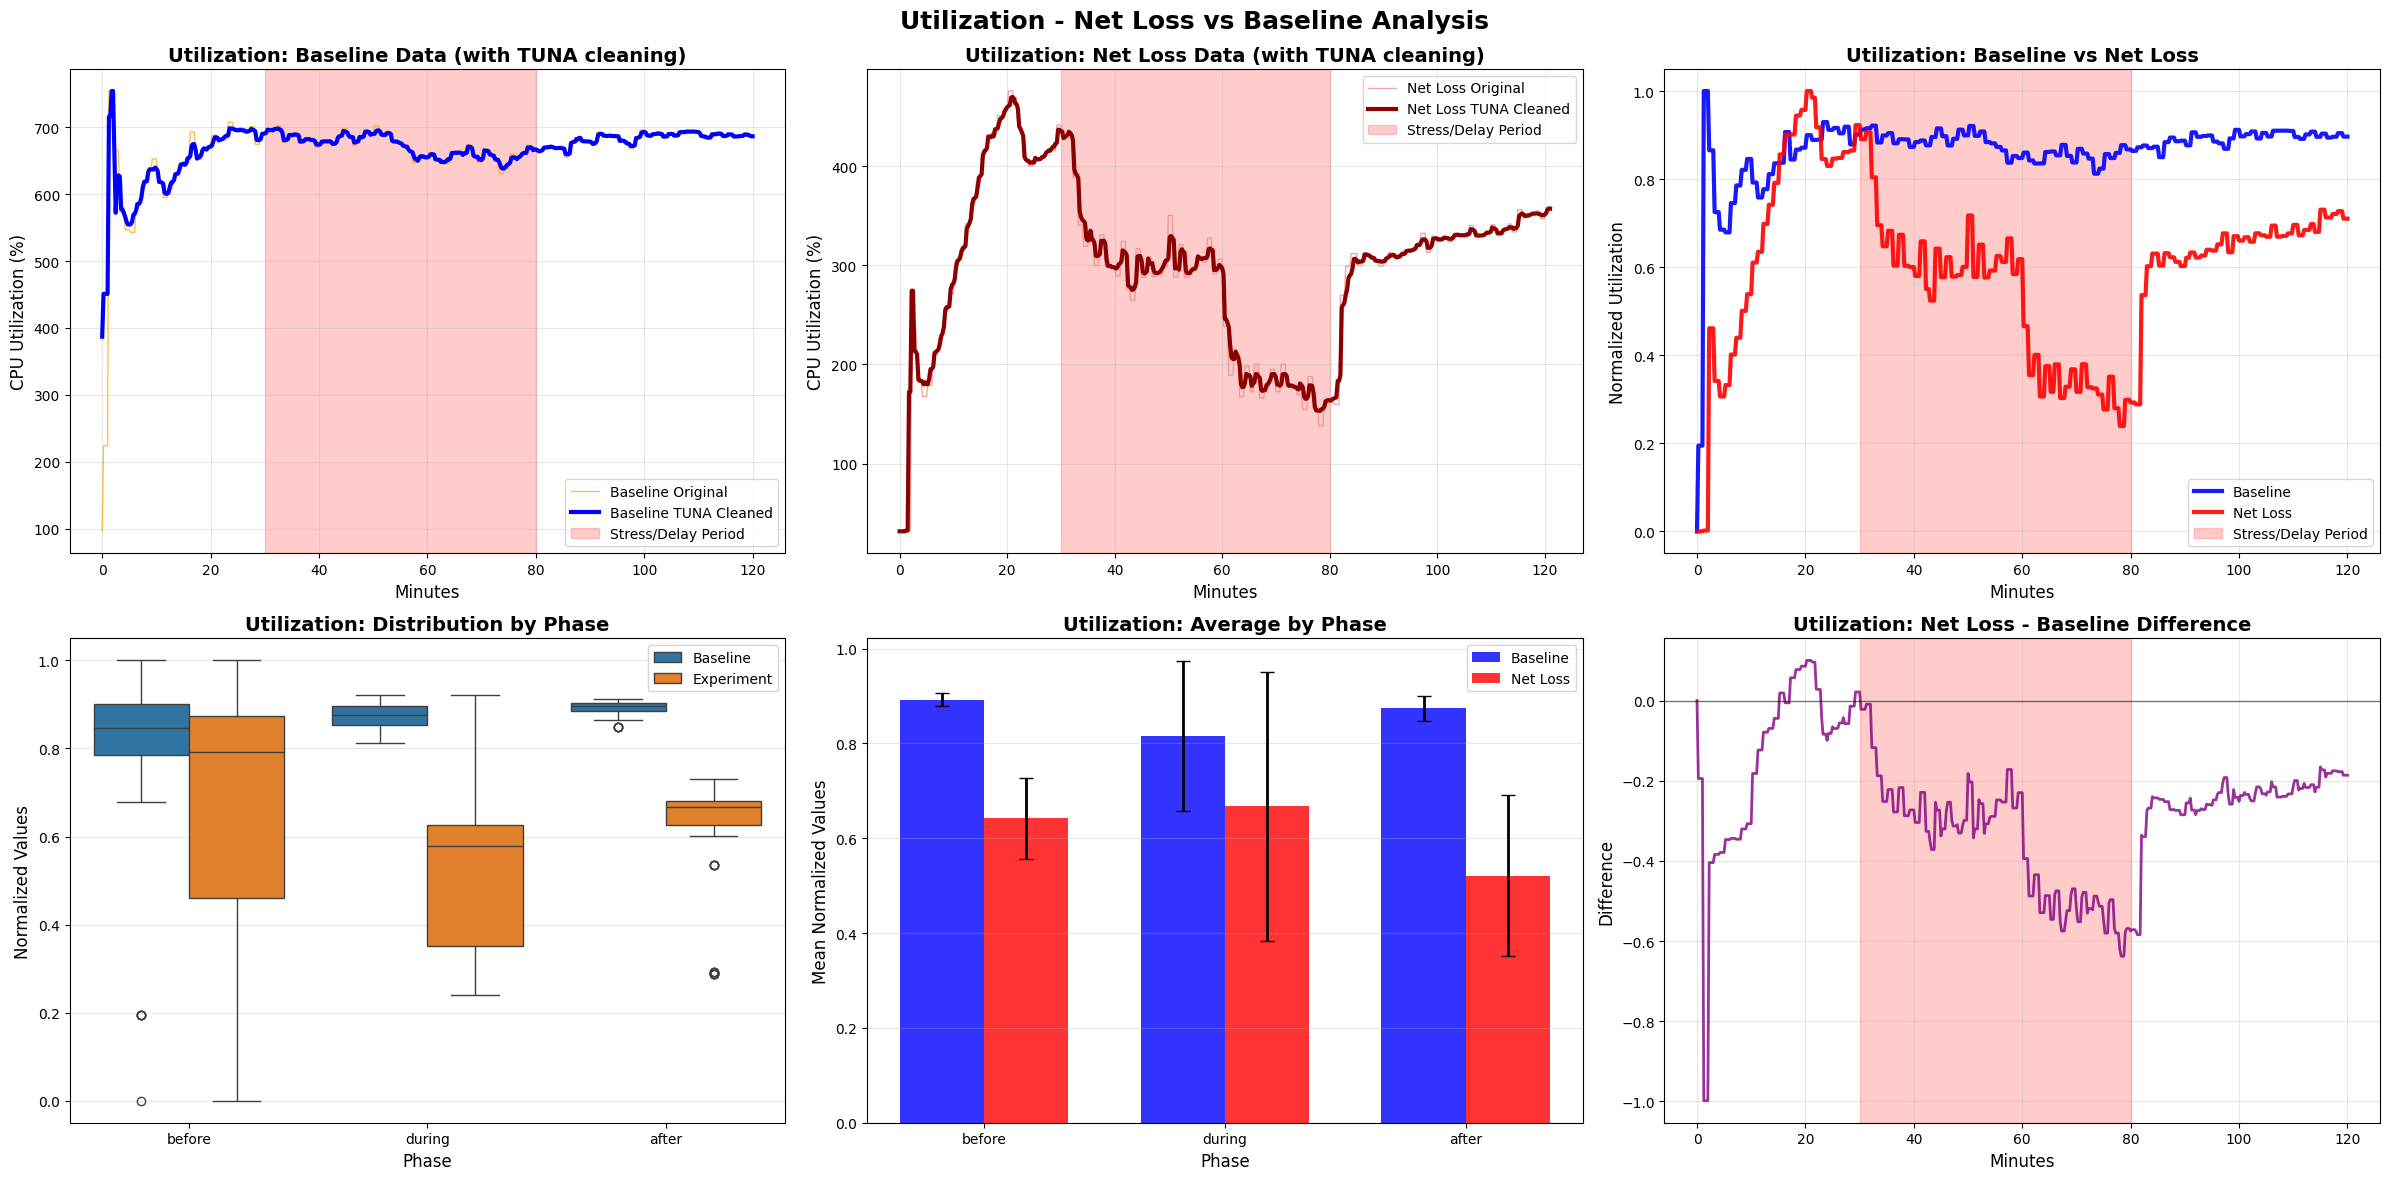


UTILIZATION - NET LOSS VS BASELINE ANALYSIS

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8925  0.0145  0.8499  0.9118
before  0.8153  0.1576  0.0000  1.0000
during  0.8744  0.0265  0.8122  0.9214

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6421  0.0853  0.2882  0.7305
before  0.6673  0.2838  0.0000  1.0000
during  0.5210  0.1703  0.2391  0.9225

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  5.00, p=  0.0000 (SIGNIFICANT)
  DURING  : t= 29.07, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 36.61, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  -18.16% (DECREASE)
  DURING  :  -40.42% (DECREASE)
  AFTER   :  -28.05% (DECREASE)


In [3]:
def calculate_cumulative_cpu(df):
    """Calculate total CPU from all CPU columns"""
    exclude_cols = ['Time', 'Minutes', 'source']
    cpu_cols = [col for col in df.columns if col not in exclude_cols]
    return df[cpu_cols].sum(axis=1).values

def normalize_series(series):
    """Normalize a series to 0-1 range"""
    min_val = series.min()
    max_val = series.max()
    if max_val > min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return pd.Series(np.zeros(len(series)), index=series.index)

def add_phase_column(df, delay_minutes=30, duration_minutes=50):
    """Add phase column based on experiment timeline"""
    df = df.copy()
    df['phase'] = 'before'
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after'
    return df

def get_y_axis_label(metric_name):
    """Get appropriate y-axis label based on metric name"""
    labels = {
        'IOWait': 'CPU IOWait (msec)',
        'IRQ': 'CPU IRQ (msec)',
        'System': 'CPU System (msec)', 
        'User': 'CPU User (msec)',
        'Utilization': 'CPU Utilization (%)'
    }
    return labels.get(metric_name, 'Value')

def analyze_and_plot_metric_comparison(metric_name, experiment_name, experiment_df, baseline_df, 
                                     tuna_results=None, delay_minutes=30, duration_minutes=50):
    """
    Create 6-plot comparison analysis for a specific metric between experiment and baseline
    
    Parameters:
    - metric_name: Name of the metric (e.g., 'IOWait', 'IRQ', 'System', 'User', 'Utilization')
    - experiment_name: Name of the experiment (e.g., 'cpu_stress', 'delay', 'mem_stress', 'net_loss')
    - experiment_df: DataFrame containing experiment data
    - baseline_df: DataFrame containing baseline data
    - tuna_results: Optional TUNA results for cleaned data comparison
    - delay_minutes: When the stress/delay starts (default 30)
    - duration_minutes: How long the stress/delay lasts (default 50)
    """
    
    # Calculate cumulative metrics
    experiment_cumulative = calculate_cumulative_cpu(experiment_df)
    baseline_cumulative = calculate_cumulative_cpu(baseline_df)
    
    # Create series with proper index
    experiment_series = pd.Series(experiment_cumulative, index=experiment_df.index)
    baseline_series = pd.Series(baseline_cumulative, index=baseline_df.index)
    
    # Get TUNA cleaned data if available
    experiment_cleaned = None
    baseline_cleaned = None
    if tuna_results and metric_name in tuna_results:
        if experiment_name in tuna_results[metric_name]:
            experiment_cleaned = pd.Series(tuna_results[metric_name][experiment_name]['cleaned'])
        if 'baseline' in tuna_results[metric_name]:
            baseline_cleaned = pd.Series(tuna_results[metric_name]['baseline']['cleaned'])
    
    # Normalize data
    experiment_norm = normalize_series(experiment_series)
    baseline_norm = normalize_series(baseline_series)
    
    # Create combined dataframe for analysis
    min_length = min(len(experiment_norm), len(baseline_norm), len(experiment_df['Minutes']), len(baseline_df['Minutes']))
    
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm.iloc[:min_length],
        'Experiment': experiment_norm.iloc[:min_length],
        'Minutes': experiment_df['Minutes'].iloc[:min_length],
        'Baseline_Minutes': baseline_df['Minutes'].iloc[:min_length]
    })
    
    df_combined['difference'] = df_combined['Experiment'] - df_combined['Baseline']
    
    # Add phase information
    df_combined['phase'] = 'before'
    df_combined.loc[(df_combined['Minutes'] >= delay_minutes) & 
                   (df_combined['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'
    df_combined.loc[df_combined['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after'
    
    # Statistical analysis by phase
    stats_baseline = df_combined.groupby('phase')['Baseline'].agg(['mean', 'std', 'min', 'max'])
    stats_experiment = df_combined.groupby('phase')['Experiment'].agg(['mean', 'std', 'min', 'max'])
    
    # T-tests for statistical significance
    t_tests = {}
    for phase in ['before', 'during', 'after']:
        data = df_combined[df_combined['phase'] == phase]
        if len(data) > 1:
            t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['Experiment'].dropna())
            t_tests[phase] = {'t': t_stat, 'p': p_value}
        else:
            t_tests[phase] = {'t': 0, 'p': 1}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        experiment_mean = stats_experiment.loc[phase, 'mean']
        if baseline_mean != 0:
            impact[phase] = ((experiment_mean - baseline_mean) / baseline_mean) * 100
        else:
            impact[phase] = 0
    
    # Create the 6-plot visualization
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline with/without outlier cleaning
    plt.subplot(2, 3, 1)
    plt.plot(baseline_df['Minutes'], baseline_series, 
             label='Baseline Original', color='orange', alpha=0.7, linewidth=1)
    
    if baseline_cleaned is not None:
        plt.plot(baseline_df['Minutes'].iloc[:len(baseline_cleaned)], baseline_cleaned, 
                 label='Baseline TUNA Cleaned', linewidth=3, color='blue')
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(baseline_df['Minutes'], baseline_series, 
                 label='Baseline', linewidth=3, color='blue')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f'{metric_name}: Baseline Data{title_suffix}', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(get_y_axis_label(metric_name), fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. Experiment with/without outlier cleaning
    plt.subplot(2, 3, 2)
    plt.plot(experiment_df['Minutes'], experiment_series, 
             label=f'{experiment_name.replace("_", " ").title()} Original', 
             alpha=0.7, color='lightcoral', linewidth=1)
    
    if experiment_cleaned is not None:
        plt.plot(experiment_df['Minutes'].iloc[:len(experiment_cleaned)], experiment_cleaned, 
                 label=f'{experiment_name.replace("_", " ").title()} TUNA Cleaned', 
                 linewidth=3, color='darkred')
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(experiment_df['Minutes'], experiment_series, 
                 label=f'{experiment_name.replace("_", " ").title()}', 
                 linewidth=3, color='darkred')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f'{metric_name}: {experiment_name.replace("_", " ").title()} Data{title_suffix}', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(get_y_axis_label(metric_name), fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison (normalized)
    plt.subplot(2, 3, 3)
    plt.plot(df_combined['Minutes'], df_combined['Baseline'], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(df_combined['Minutes'], df_combined['Experiment'], 
             label=f'{experiment_name.replace("_", " ").title()}', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f"{metric_name}: Baseline vs {experiment_name.replace('_', ' ').title()}", 
              fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {metric_name}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'Experiment', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{metric_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases = ['before', 'during', 'after']
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, stats_baseline['mean'], width, 
                   label='Baseline', alpha=0.8, color='blue')
    bars2 = plt.bar(x + width/2, stats_experiment['mean'], width, 
                   label=f'{experiment_name.replace("_", " ").title()}', alpha=0.8, color='red')
    
    plt.errorbar(x - width/2, stats_baseline['mean'], yerr=stats_baseline['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, stats_experiment['mean'], yerr=stats_experiment['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{metric_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.xticks(x, phases)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{metric_name}: {experiment_name.replace("_", " ").title()} - Baseline Difference', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{metric_name} - {experiment_name.replace("_", " ").title()} vs Baseline Analysis', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    # Print statistical results
    print(f"\n{'='*80}")
    print(f"{metric_name.upper()} - {experiment_name.upper().replace('_', ' ')} VS BASELINE ANALYSIS")
    print(f"{'='*80}")
    
    print(f"\nBASELINE STATISTICS BY PHASE:")
    print(stats_baseline.round(4))
    
    print(f"\n{experiment_name.upper().replace('_', ' ')} STATISTICS BY PHASE:")
    print(stats_experiment.round(4))
    
    print(f"\nSTATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        sig = "SIGNIFICANT" if test['p'] < 0.05 else "NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n{experiment_name.upper().replace('_', ' ')} IMPACT:")
    for phase, change in impact.items():
        direction = "INCREASE" if change > 0 else "DECREASE" if change < 0 else "NO CHANGE"
        print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_experiment': stats_experiment,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined
    }

def run_comprehensive_metric_analysis(all_datasets, tuna_results=None):
    """
    Run comprehensive analysis for all metrics against their baselines
    """
    print(f"\n{'='*80}")
    print(" METRIC VS BASELINE ANALYSIS")
    print(f"{'='*80}")
    
    analysis_results = {}
    
    for metric_name, experiments in all_datasets.items():
        print(f"\n🔍 Analyzing {metric_name}...")
        analysis_results[metric_name] = {}
        
        baseline_df = experiments['baseline']
        
        for experiment_name, experiment_df in experiments.items():
            if experiment_name != 'baseline':
                print(f"\n📊 Comparing {experiment_name} vs baseline for {metric_name}")
                
                result = analyze_and_plot_metric_comparison(
                    metric_name=metric_name,
                    experiment_name=experiment_name,
                    experiment_df=experiment_df,
                    baseline_df=baseline_df,
                    tuna_results=tuna_results
                )
                
                analysis_results[metric_name][experiment_name] = result
    
    return analysis_results


results = run_comprehensive_metric_analysis(all_datasets, tuna_results)

# analyze a specific metric-experiment combination:
# specific_result = analyze_and_plot_metric_comparison(
#     metric_name='IOWait',
#     experiment_name='cpu_stress', 
#     experiment_df=all_datasets['IOWait']['cpu_stress'],
#     baseline_df=all_datasets['IOWait']['baseline'],
#     tuna_results=tuna_results
# )